**Last Update : 22/09/2023**

#**Mengimpor Library Yang dibutuhkan**

In [102]:
# Mengimpor Library Yang Dibutuhkan
!pip install tensorflow_text

import nltk
import pandas as pd
import numpy as np
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_text as tf_text
import gensim
import keras.metrics as metrik

nltk.download("popular")
from google.colab import drive
from gensim.models import Word2Vec
from tensorflow.keras.utils import pad_sequences
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Embedding, Bidirectional, LSTM, Activation
from keras.callbacks import EarlyStopping, TensorBoard
from keras.preprocessing.text import Tokenizer
from keras.optimizers import SGD, Adam
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

#**Memasukkan Data**

In [103]:
# @markdown Ganti Dataset disini.
DATASET = "/content/drive/My Drive/Skripsi/dataset_final.csv" #@param {type:"string"}
drive.mount('/content/drive')

dataset_ulasan = pd.read_csv(DATASET, sep=";")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [104]:
# Ganti -1 menjadi 2
dataset_ulasan = dataset_ulasan.replace([-1], 2)

In [105]:
# Menampilkan Dataset Ulasan
dataset_ulasan

userName  score  \
0        Kusyati Nisa      5   
1       Nurul Latifah      5   
2         Lukman Hadi      1   
3       Felisona Hulu      1   
4          Don faizal      5   
...               ...    ...   
2995           Wa hyu      5   
2996  Pengguna Google      3   
2997  Pengguna Google      3   
2998  Pengguna Google      1   
2999  Pengguna Google      2   

                                                content  Layanan  Fitur  \
0     Mantaf skali mudah juga buat ikut pelatihan pr...        0      0   
1                       keren buat beli kartu prakerjaa        0      0   
2     Lapak saya dibekukan, sudah komplain tidak ada...        2      0   
3     Benar2 mengecewakan.Respon sangat lama.pokok n...        2      0   
4     Ini adalah salah satu tempat terbaik untuk bel...        1      0   
...                                                 ...      ...    ...   
2995  Kenapa selalu muncul iklan, padahal aplikasi s...        0      0   
2996  Tolong dong.. sejak update memori penyimpanan ...        0      0   
2997  Saya senang banget berbelanja di bukalapak, se...        2      2   
2998  Aplikasi tidak berjalan.sudah di re instal tet...        0      2   
2999  Dana Hasil Penjualan Tidak bisa otomatis masuk...        0      2   

      Kebermanfaatan  Bisnis  Non Aspek  
0                  1       0          0  
1                  0       0          1  
2                  0       0          0  
3                  0       0          0  
4                  0       0          0  
...              ...     ...        ...  
2995               0       0          2  
2996               0       0          2  
2997               0       0          0  
2998               0       0          0  
2999               0       2          0  

[3000 rows x 8 columns]

## **Informasi Data**

In [106]:
# Menampilkan Informasi mengenai dataframe
dataset_ulasan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userName        3000 non-null   object
 1   score           3000 non-null   int64 
 2   content         3000 non-null   object
 3   Layanan         3000 non-null   int64 
 4   Fitur           3000 non-null   int64 
 5   Kebermanfaatan  3000 non-null   int64 
 6   Bisnis          3000 non-null   int64 
 7   Non Aspek       3000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 187.6+ KB


Jumlah Sentimen dalam Aspek Layanan"
0    2269
2     444
1     287
Name: Layanan, dtype: int64



<Axes: xlabel='Layanan', ylabel='count'>

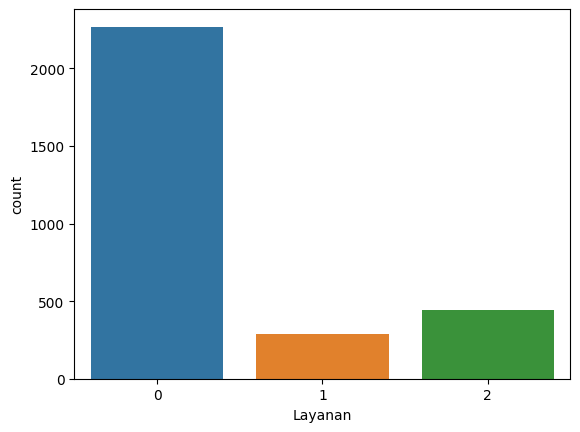

In [107]:
print(f"""Jumlah Sentimen dalam Aspek Layanan"
{dataset_ulasan["Layanan"].value_counts()}
""")
sns.countplot(x="Layanan", data=dataset_ulasan)

Jumlah Sentimen dalam Aspek Fitur"
0    2124
2     509
1     367
Name: Fitur, dtype: int64



<Axes: xlabel='Fitur', ylabel='count'>

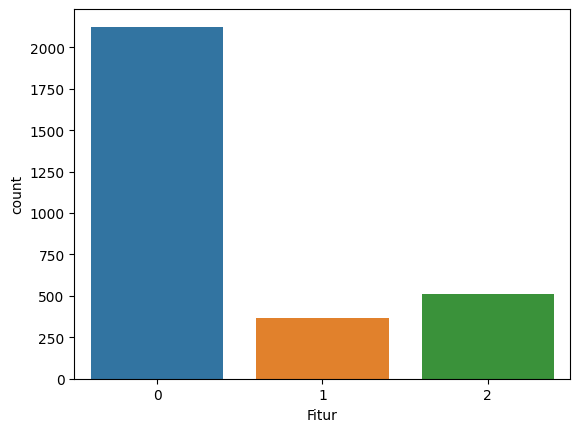

In [108]:
print(f"""Jumlah Sentimen dalam Aspek Fitur"
{dataset_ulasan["Fitur"].value_counts()}
""")
sns.countplot(x="Fitur", data=dataset_ulasan)

Jumlah Sentimen dalam Aspek Kebermanfaatan"
0    2399
1     564
2      37
Name: Kebermanfaatan, dtype: int64



<Axes: xlabel='Kebermanfaatan', ylabel='count'>

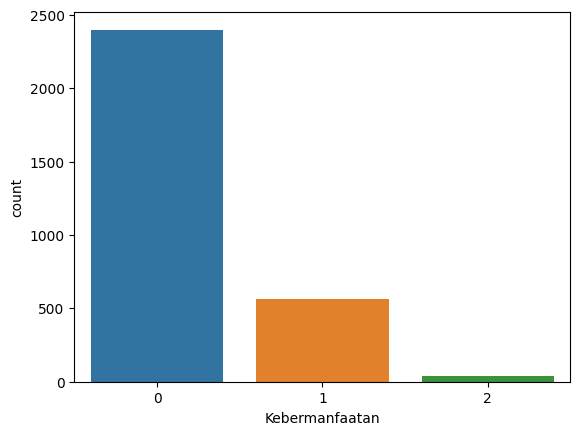

In [109]:
print(f"""Jumlah Sentimen dalam Aspek Kebermanfaatan"
{dataset_ulasan["Kebermanfaatan"].value_counts()}
""")
sns.countplot(x="Kebermanfaatan", data=dataset_ulasan)

Jumlah Sentimen dalam Aspek Bisnis"
0    1967
2     517
1     516
Name: Bisnis, dtype: int64



<Axes: xlabel='Bisnis', ylabel='count'>

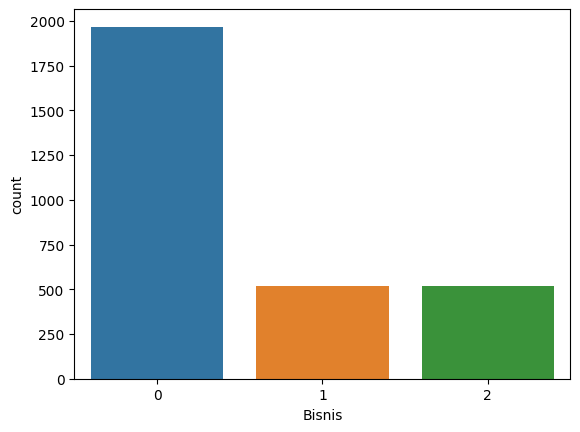

In [110]:
print(f"""Jumlah Sentimen dalam Aspek Bisnis"
{dataset_ulasan["Bisnis"].value_counts()}
""")
sns.countplot(x="Bisnis", data=dataset_ulasan)

Jumlah Sentimen dalam Aspek Non Aspek"
0    2144
2     440
1     416
Name: Non Aspek, dtype: int64



<Axes: xlabel='Non Aspek', ylabel='count'>

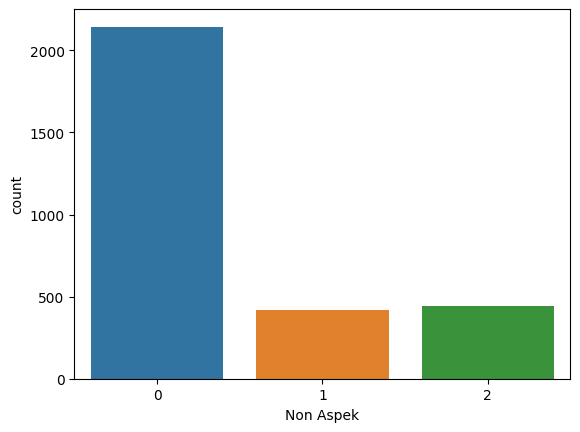

In [111]:
print(f"""Jumlah Sentimen dalam Aspek Non Aspek"
{dataset_ulasan["Non Aspek"].value_counts()}
""")
sns.countplot(x="Non Aspek", data=dataset_ulasan)

In [112]:
# Hanya Menampilkan Kolom Ulasan dan Aspeknya
df_analisis_sentimen = dataset_ulasan.iloc[:, 2:]
df_analisis_sentimen.rename(columns = {'content':'Ulasan'}, inplace = True)

In [113]:
df_analisis_sentimen

Ulasan  Layanan  Fitur  \
0     Mantaf skali mudah juga buat ikut pelatihan pr...        0      0   
1                       keren buat beli kartu prakerjaa        0      0   
2     Lapak saya dibekukan, sudah komplain tidak ada...        2      0   
3     Benar2 mengecewakan.Respon sangat lama.pokok n...        2      0   
4     Ini adalah salah satu tempat terbaik untuk bel...        1      0   
...                                                 ...      ...    ...   
2995  Kenapa selalu muncul iklan, padahal aplikasi s...        0      0   
2996  Tolong dong.. sejak update memori penyimpanan ...        0      0   
2997  Saya senang banget berbelanja di bukalapak, se...        2      2   
2998  Aplikasi tidak berjalan.sudah di re instal tet...        0      2   
2999  Dana Hasil Penjualan Tidak bisa otomatis masuk...        0      2   

      Kebermanfaatan  Bisnis  Non Aspek  
0                  1       0          0  
1                  0       0          1  
2                  0       0          0  
3                  0       0          0  
4                  0       0          0  
...              ...     ...        ...  
2995               0       0          2  
2996               0       0          2  
2997               0       0          0  
2998               0       0          0  
2999               0       2          0  

[3000 rows x 6 columns]

# **Tahapan Preprocessing**

## **Casefolding**

In [114]:
case_folding = df_analisis_sentimen["Ulasan"].str.lower()

df_analisis_sentimen["Ulasan"] = case_folding

In [115]:
# Menampilkan hasil case folding
df_analisis_sentimen

Ulasan  Layanan  Fitur  \
0     mantaf skali mudah juga buat ikut pelatihan pr...        0      0   
1                       keren buat beli kartu prakerjaa        0      0   
2     lapak saya dibekukan, sudah komplain tidak ada...        2      0   
3     benar2 mengecewakan.respon sangat lama.pokok n...        2      0   
4     ini adalah salah satu tempat terbaik untuk bel...        1      0   
...                                                 ...      ...    ...   
2995  kenapa selalu muncul iklan, padahal aplikasi s...        0      0   
2996  tolong dong.. sejak update memori penyimpanan ...        0      0   
2997  saya senang banget berbelanja di bukalapak, se...        2      2   
2998  aplikasi tidak berjalan.sudah di re instal tet...        0      2   
2999  dana hasil penjualan tidak bisa otomatis masuk...        0      2   

      Kebermanfaatan  Bisnis  Non Aspek  
0                  1       0          0  
1                  0       0          1  
2                  0       0          0  
3                  0       0          0  
4                  0       0          0  
...              ...     ...        ...  
2995               0       0          2  
2996               0       0          2  
2997               0       0          0  
2998               0       0          0  
2999               0       2          0  

[3000 rows x 6 columns]

## **Filtering**

In [116]:
hilangkan_tanda_baca = string.punctuation

def filtering(teks):
    """Fungsi ini berguna untuk menyaring atau membuang angka, tanda baca, emoji,
    white space lebih dan sebagai tambahan menghilangkan url dan karakter yang berjumlah satu dalam teks"""

    # Menghilangkan url jika ada
    teks = re.sub(r'http\S+', '', teks)
    teks = re.sub(r'https\S+', '', teks)

    # Menghilangkan spasi dan tanda baca kecuali underscore
    teks = re.sub(r'''
               \W+
               \s*
               ''',
               ' ',
               teks,
               flags=re.VERBOSE)

    # Menghilangkan angka atau digit
    teks = ' '.join(re.sub(r"\d+", "", teks).split())

    # Menghilangkan Unicode, spasi tab, dan, new line / Emoji
    teks = teks.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ")

    # Encoding dan decode ascii (konversi byte)
    teks = teks.encode('ascii', 'replace').decode('ascii')

    # Menghilangkan semua tanda baca
    teks = teks.translate(str.maketrans(' ', ' ', hilangkan_tanda_baca))

    # Menghilangkan satu karakter
    return re.sub(r"\b[a-zA-Z]\b", "", teks)

    # Menghilangkan white space lebih
    teks = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", teks).split())

filtering_ulasan = []

for kalimat in df_analisis_sentimen["Ulasan"]:
  kalimat = filtering(kalimat)
  filtering_ulasan.append(kalimat)

df_analisis_sentimen["Ulasan"] = filtering_ulasan

In [117]:
# Menampilkan Hasil Filtering
df_analisis_sentimen

Ulasan  Layanan  Fitur  \
0     mantaf skali mudah juga buat ikut pelatihan pr...        0      0   
1                       keren buat beli kartu prakerjaa        0      0   
2     lapak saya dibekukan sudah komplain tidak ada ...        2      0   
3     benar mengecewakan respon sangat lama pokok ny...        2      0   
4     ini adalah salah satu tempat terbaik untuk bel...        1      0   
...                                                 ...      ...    ...   
2995  kenapa selalu muncul iklan padahal aplikasi su...        0      0   
2996  tolong dong sejak update memori penyimpanan ja...        0      0   
2997  saya senang banget berbelanja di bukalapak sem...        2      2   
2998  aplikasi tidak berjalan sudah di re instal tet...        0      2   
2999  dana hasil penjualan tidak bisa otomatis masuk...        0      2   

      Kebermanfaatan  Bisnis  Non Aspek  
0                  1       0          0  
1                  0       0          1  
2                  0       0          0  
3                  0       0          0  
4                  0       0          0  
...              ...     ...        ...  
2995               0       0          2  
2996               0       0          2  
2997               0       0          0  
2998               0       0          0  
2999               0       2          0  

[3000 rows x 6 columns]

## **Word Normalization**

#### **Kamus Untuk Word Normalization**

In [118]:
# @markdown Masukkan Lokasi Dataset Kamus Yang Digunakan
dataset_kamus = '/content/drive/My Drive/Skripsi/kamus_normalisasi.tsv'#@param {type:"string"}
kamus_normalisasi = pd.read_csv(dataset_kamus ,sep='\t')
kamus_informal_to_formal = kamus_normalisasi.iloc[:,:2]
kamus_informal_to_formal = kamus_informal_to_formal.drop_duplicates(subset=['informal'])

In [119]:
kamus_informal_to_formal
# kamus_informal_to_formal.info()

informal                             formal
0           0kmh                              0 kmh
1         1007mb                            1007 mb
2         1008mb                            1008 mb
3         1009mb                            1009 mb
4           100k                           100 ribu
...          ...                                ...
17677  mendikbud  menteri pendidikan dan kebudayaan
17678     mendag                menteri perdagangan
17679    menaker               menteri tenaga kerja
17680   memetwit                            mentwit
17681   megangin                           memegang

[16291 rows x 2 columns]

#### **Ubah Kamus Normalisasi menjadi bentuk dictionary**

In [120]:
kamus_normalisasi = {}

# penambahan yang tidak ada di kamus sebelumnya, wahid -> satu
kamus_normalisasi = {"x": "kali", "now": "sekarang", "min": "admin"}

for index, row in kamus_informal_to_formal.iterrows():
    if row[0] not in kamus_normalisasi:
        kamus_normalisasi[row[0]] = row[1]

# Pengecekan kata dalam kamus
# kamus_normalisasi["bls"]
len(kamus_normalisasi)

16294

#### **Konversi String menjadi list kata**

In [121]:
token_ulasan = []

# konversi list string to list of words
for kalimat in df_analisis_sentimen["Ulasan"]:
  token_ulasan.append(kalimat.split())
df_analisis_sentimen["Ulasan"] = token_ulasan

#### **Proses Word Normalization**

In [122]:
def word_normalization(text):
    """Fungsi ini digunakan untuk mengubah kata yang informal atau kata gaul menjadi bentuk formal"""
    return [kamus_normalisasi[word] if word in kamus_normalisasi else word for word in text]


df_analisis_sentimen['Ulasan'] = df_analisis_sentimen['Ulasan'].apply(lambda text: word_normalization(text))

#### **Konversi Ke bentuk String Kembali**

In [123]:
# Menyatukan Kembali
df_analisis_sentimen['Ulasan'] = df_analisis_sentimen['Ulasan'].str.join(" ")

In [124]:
# Menampilkan Hasil Word Normalization
df_analisis_sentimen

Ulasan  Layanan  Fitur  \
0     mantap sekali mudah juga buat ikut pelatihan p...        0      0   
1                       keren buat beli kartu prakerjaa        0      0   
2     lapak saya dibekukan sudah komplain tidak ada ...        2      0   
3     benar mengecewakan respon sangat lama pokok ny...        2      0   
4     ini adalah salah satu tempat terbaik untuk bel...        1      0   
...                                                 ...      ...    ...   
2995  kenapa selalu muncul iklan padahal aplikasi su...        0      0   
2996  tolong dong sejak pembaruan memori penyimpanan...        0      0   
2997  saya senang sangat berbelanja di bukalapak sem...        2      2   
2998  aplikasi tidak berjalan sudah di re install te...        0      2   
2999  dana hasil penjualan tidak bisa otomatis masuk...        0      2   

      Kebermanfaatan  Bisnis  Non Aspek  
0                  1       0          0  
1                  0       0          1  
2                  0       0          0  
3                  0       0          0  
4                  0       0          0  
...              ...     ...        ...  
2995               0       0          2  
2996               0       0          2  
2997               0       0          0  
2998               0       0          0  
2999               0       2          0  

[3000 rows x 6 columns]

## **Convert Negation**

In [125]:
def convert_negation(teks):
    """Fungsi ini menkonversi kata negasi, kondisinya dimana jika terdapat kata negasi maka akan digabungkan dengan kata setelahnya

    Kata Negasi:
    `tidak`, `bukan`, `belum`, `jangan`, `tak`, `kurang`, `dan lainnya`

    Contohnya:
    ----------
    sangat buruk pembayaran tidak terverifikasi sampai saat ini
    -> sangat buruk pembayaran tidak_terverifikasi sampai saat ini
    """

    convert_tidak = teks.replace("tidak ", "tidak_")
    convert_belum = convert_tidak.replace("belum ", "belum_")
    convert_jangan = convert_belum.replace("jangan ", "jangan_")
    convert_tak = convert_jangan.replace("tak ", "tak_")
    convert_kurang = convert_tak.replace("kurang ", "kurang_")
    last_convert = convert_tak.replace("bukan ", "bukan_")

    return last_convert

konversi_negasi_list = []
for kata in df_analisis_sentimen['Ulasan']:
  hasil_konversi = convert_negation(kata)
  konversi_negasi_list.append(hasil_konversi)

df_analisis_sentimen['Ulasan'] = konversi_negasi_list

In [126]:
# Menampilkan Hasil Convert Negation
df_analisis_sentimen

Ulasan  Layanan  Fitur  \
0     mantap sekali mudah juga buat ikut pelatihan p...        0      0   
1                       keren buat beli kartu prakerjaa        0      0   
2     lapak saya dibekukan sudah komplain tidak_ada ...        2      0   
3     benar mengecewakan respon sangat lama pokok ny...        2      0   
4     ini adalah salah satu tempat terbaik untuk bel...        1      0   
...                                                 ...      ...    ...   
2995  kenapa selalu muncul iklan padahal aplikasi su...        0      0   
2996  tolong dong sejak pembaruan memori penyimpanan...        0      0   
2997  saya senang sangat berbelanja di bukalapak sem...        2      2   
2998  aplikasi tidak_berjalan sudah di re install te...        0      2   
2999  dana hasil penjualan tidak_bisa otomatis masuk...        0      2   

      Kebermanfaatan  Bisnis  Non Aspek  
0                  1       0          0  
1                  0       0          1  
2                  0       0          0  
3                  0       0          0  
4                  0       0          0  
...              ...     ...        ...  
2995               0       0          2  
2996               0       0          2  
2997               0       0          0  
2998               0       0          0  
2999               0       2          0  

[3000 rows x 6 columns]

## **Tokenization**

In [127]:
tokenisasi = [word_tokenize(kata) for kata in df_analisis_sentimen['Ulasan']]

df_analisis_sentimen['Ulasan'] = tokenisasi

In [128]:
# Menampilkan Hasil Convert Negation
df_analisis_sentimen

Ulasan  Layanan  Fitur  \
0     [mantap, sekali, mudah, juga, buat, ikut, pela...        0      0   
1                 [keren, buat, beli, kartu, prakerjaa]        0      0   
2     [lapak, saya, dibekukan, sudah, komplain, tida...        2      0   
3     [benar, mengecewakan, respon, sangat, lama, po...        2      0   
4     [ini, adalah, salah, satu, tempat, terbaik, un...        1      0   
...                                                 ...      ...    ...   
2995  [kenapa, selalu, muncul, iklan, padahal, aplik...        0      0   
2996  [tolong, dong, sejak, pembaruan, memori, penyi...        0      0   
2997  [saya, senang, sangat, berbelanja, di, bukalap...        2      2   
2998  [aplikasi, tidak_berjalan, sudah, di, re, inst...        0      2   
2999  [dana, hasil, penjualan, tidak_bisa, otomatis,...        0      2   

      Kebermanfaatan  Bisnis  Non Aspek  
0                  1       0          0  
1                  0       0          1  
2                  0       0          0  
3                  0       0          0  
4                  0       0          0  
...              ...     ...        ...  
2995               0       0          2  
2996               0       0          2  
2997               0       0          0  
2998               0       0          0  
2999               0       2          0  

[3000 rows x 6 columns]

## **Stopword Removal**

#### **Pemanggilan Kamus Stopword List**

In [129]:
STOPWORDS = stopwords.words('indonesian')
# print(STOPWORDS)

# penambahan stopword
STOPWORDS.extend(['kali', 'nya'])
# STOPWORDS.extend(['amp','hahaha','ya','bnr','bener','iya','dikit','sih','nya', 'yg', 'dll','gara', 'dan lain', 'dan lain-lain', 'oh','y','g','yes', 'yang','gak','bgt','ku','buat','karena','karna','ga','udah','udh','pas','kalau','kalo','eh','deh','coba','oke','a','aa','aaa','aaaa','aaaaa','huhuhu','hihihi','hahaha','hehehe','he','heh','hehe','si','ah','aja','ni','ini','xixi','da'])

# Kata yang tidak seharusnya dibuang : membuat, dapat
STOPWORDS.remove("ada")
STOPWORDS.remove("mirip")

stopword_list = set(STOPWORDS)
# stopword_list
len(stopword_list)

757

#### **Proses Stopword**

In [130]:
def stopword_removal(teks):
    return [kata for kata in teks if kata not in stopword_list]

pembuangan_stopword = df_analisis_sentimen['Ulasan'].apply(lambda text: stopword_removal(text))
df_analisis_sentimen['Ulasan'] = pembuangan_stopword

In [131]:
# Menampilkan Hasil Stopword Removal
df_analisis_sentimen

Ulasan  Layanan  Fitur  \
0     [mantap, mudah, pelatihan, prakerja, mudah, su...        0      0   
1                       [keren, beli, kartu, prakerjaa]        0      0   
2     [lapak, dibekukan, komplain, tidak_ada, tangga...        2      0   
3       [mengecewakan, respon, pokok, tidak_rekomended]        2      0   
4     [salah, terbaik, belanja, online, ada, penjual...        1      0   
...                                                 ...      ...    ...   
2995  [muncul, iklan, aplikasi, close, memgganggu, m...        0      0   
2996  [tolong, pembaruan, memori, penyimpanan, tidak...        0      0   
2997  [senang, berbelanja, bukalapak, semja, mudah, ...        2      2   
2998  [aplikasi, tidak_berjalan, re, install, tidak_...        0      2   
2999  [dana, hasil, penjualan, tidak_bisa, otomatis,...        0      2   

      Kebermanfaatan  Bisnis  Non Aspek  
0                  1       0          0  
1                  0       0          1  
2                  0       0          0  
3                  0       0          0  
4                  0       0          0  
...              ...     ...        ...  
2995               0       0          2  
2996               0       0          2  
2997               0       0          0  
2998               0       0          0  
2999               0       2          0  

[3000 rows x 6 columns]

In [132]:
# Menyimpan untuk pelatihan Word2Vec di local
df_analisis_sentimen.to_excel("dataset_preprocessing.xlsx")

# **Word Embedding**


## **Pembuatan Kamus Vocabulary**

#### **Konversi menjadi Token dan Penambahan token UNKNOWN**

In [133]:
gabungan_token = []

for kalimat in df_analisis_sentimen['Ulasan']:
  for kata in kalimat:
    gabungan_token.append(kata)

# Penambahan Token UNKNOWN
# gabungan_token.append("UNKNOWN")
gabungan_token

['mantap',
 'mudah',
 'pelatihan',
 'prakerja',
 'mudah',
 'sungguh',
 'bermanfaat',
 'keren',
 'beli',
 'kartu',
 'prakerjaa',
 'lapak',
 'dibekukan',
 'komplain',
 'tidak_ada',
 'tanggapan',
 'ditutup',
 'sistem',
 'tidak_jelas',
 'mengecewakan',
 'respon',
 'pokok',
 'tidak_rekomended',
 'salah',
 'terbaik',
 'belanja',
 'online',
 'ada',
 'penjual',
 'pembeli',
 'bukalapak',
 'proactive',
 'pengambil',
 'solusi',
 'terbaik',
 'membantu',
 'berbelanja',
 'dagangan',
 'variatif',
 'appk',
 'buka',
 'lapak',
 'susah',
 'pembayaran',
 'belum_terverifikasi',
 'barang',
 'pesanan',
 'kadarluarsa',
 'mohon',
 'kembalikan',
 'saldo',
 'buka',
 'aplikasi',
 'bantuan',
 'mutar',
 'mutar',
 'bingung',
 'aplikasi',
 'pembayaran',
 'mbaking',
 'baca',
 'status',
 'pembayaran',
 'angsuran',
 'proses',
 'aja',
 'tanggal',
 'mei',
 'tutup',
 'aja',
 'aplikasinya',
 'limit',
 'paylater',
 'nay',
 'tidak_naik',
 'jarang',
 'telat',
 'bayar',
 'tolong',
 'tingatkan',
 'shopee',
 'bagus',
 'riwayat',


#### **Menghitung Frekuensi Kata dalam Vocabulary**

In [134]:
dist_freq = FreqDist()
print(f"Jumlah Seluruh Token Gabungan: {len(gabungan_token)}")
print(f"""Token Gabungan:
{gabungan_token}""")

for word in gabungan_token:
     dist_freq[word]+=1

df_jumlah_kata = pd.Series(data=dist_freq)

df_frekuensi_per_token = pd.DataFrame(data=df_jumlah_kata, columns=["Jumlah Token"])
df_frekuensi_per_token.index.name = "Token Unik"
df_frekuensi_per_token

Jumlah Seluruh Token Gabungan: 43846
Token Gabungan:
['mantap', 'mudah', 'pelatihan', 'prakerja', 'mudah', 'sungguh', 'bermanfaat', 'keren', 'beli', 'kartu', 'prakerjaa', 'lapak', 'dibekukan', 'komplain', 'tidak_ada', 'tanggapan', 'ditutup', 'sistem', 'tidak_jelas', 'mengecewakan', 'respon', 'pokok', 'tidak_rekomended', 'salah', 'terbaik', 'belanja', 'online', 'ada', 'penjual', 'pembeli', 'bukalapak', 'proactive', 'pengambil', 'solusi', 'terbaik', 'membantu', 'berbelanja', 'dagangan', 'variatif', 'appk', 'buka', 'lapak', 'susah', 'pembayaran', 'belum_terverifikasi', 'barang', 'pesanan', 'kadarluarsa', 'mohon', 'kembalikan', 'saldo', 'buka', 'aplikasi', 'bantuan', 'mutar', 'mutar', 'bingung', 'aplikasi', 'pembayaran', 'mbaking', 'baca', 'status', 'pembayaran', 'angsuran', 'proses', 'aja', 'tanggal', 'mei', 'tutup', 'aja', 'aplikasinya', 'limit', 'paylater', 'nay', 'tidak_naik', 'jarang', 'telat', 'bayar', 'tolong', 'tingatkan', 'shopee', 'bagus', 'riwayat', 'paylater', 'bintang', 'belum

Jumlah Token
Token Unik                   
mantap                    202
mudah                     435
pelatihan                 115
prakerja                  124
sungguh                    17
...                       ...
tidak_klik                  1
aplod                       1
ketidaknyamanan             1
keruntuhannya               1
berkunjung                  1

[5939 rows x 1 columns]

### **Membangun Kamus Vocabulary bentuk Dictionary**

In [135]:
index, kamus_vocabulary = 0, {}  # dimulai dari indeks ke-1
jumlah_kata_sama = 0

for token in gabungan_token:
    if token not in kamus_vocabulary:
      kamus_vocabulary[token] = index
      index += 1

    elif token in kamus_vocabulary:
      jumlah_kata_sama += 1

# Inverse Kamus
kamus_vocabulary = {index: token for token, index in kamus_vocabulary.items()}

print('Jumlah Kata yang sama =', jumlah_kata_sama)

jumlah_corpus = len(kamus_vocabulary)
print(f"Jumlah Corpus = {jumlah_corpus}")

df_kamus_vocabulary = pd.DataFrame.from_dict(kamus_vocabulary, orient='index')
df_kamus_vocabulary.index.name = "Indeks ke-"
df_kamus_vocabulary.columns = ['Vocabulary']
df_kamus_vocabulary

Jumlah Kata yang sama = 37907
Jumlah Corpus = 5939


Vocabulary
Indeks ke-                 
0                    mantap
1                     mudah
2                 pelatihan
3                  prakerja
4                   sungguh
...                     ...
5934             tidak_klik
5935                  aplod
5936        ketidaknyamanan
5937          keruntuhannya
5938             berkunjung

[5939 rows x 1 columns]

## **Word2Vec (Continuous Bag of Words)**

In [136]:
kalimat = df_analisis_sentimen['Ulasan'].tolist()

# Penambahan Token UNKNOWN
kalimat.append(["UNKNOWN"])

print(f"Jumlah Kalimat = {len(kalimat)}")
print(kalimat[1])

Jumlah Kalimat = 3001
['keren', 'beli', 'kartu', 'prakerjaa']


#### **Pelatihan Word2Vec CBOW**

In [137]:
# Jalankan Sekali Saja untuk training
# @markdown Atur Parameter untuk Metode Word2Vec.
dimensi_vektor = 300 # @param {type:"integer"}
ukuran_window = 10 # @param {type:"integer"}
jumlah_minimal_kata = 1 # @param {type:"integer"}
jumlah_workers = 4 # @param {type:"integer"}
epoch_w2v = 200 # @param {type:"integer"}
metode = 'CBOW' # @param ["CBOW", "Skip Gram"]
# ukuran_alpha = 0.1 # @param {type:"number"}
hitung_loss = True # @param {type:"boolean"}

if metode == 'CBOW':
  word2vec_metode = 0
elif metode == 'Skip Gram':
  word2vec_metode = 1

model_CBOW = Word2Vec(kalimat,
                vector_size=dimensi_vektor, # dimensi vektor
                window=ukuran_window, # window size
                min_count=jumlah_minimal_kata,
                workers=jumlah_workers,
                epochs=epoch_w2v, #epoch
                sg=word2vec_metode, # skip gram / cbow
                # alpha=ukuran_alpha,
                compute_loss=hitung_loss,)

# Mendapatkan Nilai Loss
training_loss = model_CBOW.get_latest_training_loss()
print(f"Loss Training: {training_loss}")

Loss Training: 2207181.75


### **Menyimpan Model Pelatihan Word2Vec CBOW**

In [138]:
words = list(model_CBOW.wv.key_to_index)
print('Vocabulary size: %d' % len(words))

# save model in ASCII (word2vec) format
filename = 'ulasan_embedding_word2vec.txt'
model_CBOW.wv.save_word2vec_format(filename, binary=False)
model_CBOW.save("cbow_train_300d.w2v")


Vocabulary size: 5940


### **Load Model Pelatihan Word2Vec CBOW**

In [139]:
txt_file_directory = '/content/drive/My Drive/Skripsi/ulasan_embedding_word2vec.txt' # @param {type:"string"}
model_w2v_directory = '/content/drive/My Drive/Skripsi/cbow_train_300d.w2v' # @param {type:"string"}

In [140]:
# BUKA LAGI
embeddings_index_baru = {}

f = open(txt_file_directory)

for line in f:
    print(line)
    values = line.split()
    word = values[0] # Kata dimulai dari indeks ke-0
    coefs = np.asarray(values[1:]) # Nilai Embedding Values dari indeks ke
    embeddings_index_baru[word] = coefs
f.close()

5940 300

bukalapak -0.004640321 0.15048511 0.23823024 0.044813063 0.5602582 -0.03209918 -0.55979127 0.36760175 -1.0590051 0.4576922 0.99796444 -0.25727457 0.20119213 -0.5505467 0.42696926 -0.5426276 -0.16548344 -0.5231878 0.4645426 0.22361667 -0.20228043 1.0357717 1.4910784 -0.0271137 -0.9861504 -0.46393758 0.8411741 -0.44092888 0.9988043 -1.2779207 -0.028052188 0.25879738 0.71179724 0.18324354 0.5282117 0.13986525 0.49033406 -0.088596776 0.14822906 -0.9878844 -0.019301511 -0.4933712 0.53878725 0.20806299 -0.10562254 -0.5222647 -0.8404622 -0.2782051 -0.3553377 0.28940964 -0.7306811 -0.4597567 -0.24729662 -0.4644471 0.23674962 -0.10031847 1.1400281 0.4604664 -0.4516099 0.0745486 0.10581001 -0.111335695 0.4691949 1.2942982 -0.9844389 0.5366672 -0.64194065 0.13583548 -0.17800793 0.54765433 -0.7635522 0.025326042 -0.6143001 -0.2830763 0.48752582 -0.23574582 0.50886005 0.23267555 -0.48300755 1.2784371 -0.7407116 0.98483574 -0.8129404 0.033924 -0.21524818 0.70392543 0.1523086 0.36466473 0.6

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



keberangkatan -0.010513247 -0.21713161 -0.286676 -0.17659122 0.3055717 -0.3094456 -0.102768876 0.15467876 0.08082771 0.4261946 -0.1059006 0.0028946023 0.009707266 0.0593806 0.24353345 -0.25312528 -0.5273599 0.19126233 0.0037529676 -0.2704026 0.3162657 -0.015726222 0.2807859 0.16687408 0.303154 -0.61248785 -0.4695879 -0.10157262 0.12251671 -0.3084703 -0.15989189 -0.5145821 0.43065754 -0.09553282 -0.3367806 -0.06304853 -0.06991308 -0.26077443 0.05680574 0.53947186 0.356202 0.39964613 0.35063738 -0.0323493 0.18814778 -0.050465155 -0.57044196 -0.11214718 -0.0064652036 -0.19571963 0.30089194 0.26199862 0.17986406 0.16764455 -0.38841075 0.47250512 -0.08638511 0.056990515 0.59865975 0.009408641 -0.08493411 -0.060191322 -0.15857208 0.6094849 -0.1173124 0.77231306 -0.2607733 0.26341388 -0.50269437 0.03714326 -0.41745648 0.39745796 0.30022928 -0.41874692 -0.63186914 0.049639232 -0.15454887 0.25143138 0.3981193 0.3851483 -0.7413751 -0.5157906 -0.09831487 0.105209485 0.054138783 0.14909264 -0.0060

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [141]:
# Load Model Dari Google Drive
train_cbow = Word2Vec.load(model_w2v_directory)
w2v_cbow = train_cbow.wv

### **Vocabulary Model CBOW**

In [142]:
print(f"Panjang Model Word2Vec / Vocabulary = {len(w2v_cbow.key_to_index )}")
w2v_cbow.index_to_key

Panjang Model Word2Vec / Vocabulary = 5940


['bukalapak',
 'aplikasi',
 'barang',
 'ada',
 'kasih',
 'belanja',
 'buka',
 'terima',
 'tidak_bisa',
 'bagus',
 'mudah',
 'beli',
 'cepat',
 'transaksi',
 'tidak_ada',
 'aja',
 'iya',
 'kirim',
 'lapak',
 'membantu',
 'tolong',
 'fitur',
 'pelapak',
 'ongkos',
 'pembayaran',
 'mantap',
 'dana',
 'online',
 'pengiriman',
 'komplain',
 'semoga',
 'produk',
 'bayar',
 'layanan',
 'paylater',
 'harga',
 'akun',
 'toko',
 'kecewa',
 'saldo',
 'pelanggan',
 'pesanan',
 'pakai',
 'memakai',
 'mohon',
 'chat',
 'pembaruan',
 'rumit',
 'proses',
 'aplikasinya',
 'masuk',
 'promo',
 'sistem',
 'lambat',
 'susah',
 'respon',
 'sukses',
 'prakerja',
 'handphone',
 'pengguna',
 'biaya',
 'uang',
 'sih',
 'pembeli',
 'penjual',
 'gratis',
 'ribu',
 'pelatihan',
 'sebelah',
 'bintang',
 'pelayanan',
 'suka',
 'perbaiki',
 'lancar',
 'menu',
 'sesuai',
 'kupon',
 'admin',
 'coba',
 'aman',
 'pulsa',
 'bantuan',
 'pembelian',
 'langsung',
 'kurir',
 'seller',
 'murah',
 'kartu',
 'berat',
 'no',
 'ju

### **Vektor Keseluruhan CBOW**

In [143]:
w2v_cbow.vectors

array([[-4.6403208e-03,  1.5048511e-01,  2.3823024e-01, ...,
        -1.0656617e+00, -7.9047847e-01, -1.7114172e+00],
       [ 5.4438751e-02, -2.4973528e-01, -3.1594685e-01, ...,
         5.8058512e-01,  6.0749972e-01, -1.2679831e+00],
       [ 2.8709435e-01, -7.8719938e-01, -1.2820753e+00, ...,
        -4.3628702e-01,  4.1864845e-01, -2.6731567e-02],
       ...,
       [ 1.0840919e-02,  2.0281079e-01,  1.0048220e-01, ...,
        -4.9099120e-01,  4.2273468e-01, -7.5401977e-02],
       [ 1.0198505e-01,  5.5835679e-02,  9.7309060e-02, ...,
        -3.7515059e-01,  2.6115313e-01, -1.4418820e-01],
       [-6.4828049e-04, -4.3998120e-04, -1.2444637e-03, ...,
        -1.3866068e-03,  5.1374210e-04,  1.5245579e-03]], dtype=float32)

### **Mencoba Memeriksa CBOW**

In [144]:
# Mendapatkan Vektor dari kata yang diinginkan
word_test = "kemasannya" # @param {type:"string"}

try:
    vector = w2v_cbow[word_test]
except KeyError:
    print("Kata tersebut tidak ada di dalam vocabulary")
vector

array([-0.04085079,  0.3103148 , -0.3045122 , -0.33603615, -0.47182113,
        0.25665134,  0.08968403, -0.01308915,  0.195093  ,  0.10762504,
       -0.3231208 , -0.10186902,  0.09361099, -0.07036422, -0.05122733,
        0.19003755,  0.28603438,  0.22383879, -0.03236346,  0.10575237,
       -0.14298388, -0.0882687 , -0.34395272, -0.12158232, -0.18487488,
       -0.25721234, -0.10507261,  0.33524686, -0.06140133, -0.09741078,
       -0.09227172, -0.17649484,  0.06221347,  0.25902563, -0.06213234,
       -0.15971653, -0.1072951 , -0.21707119,  0.03906948,  0.34219772,
        0.2568091 , -0.01631885,  0.02942455,  0.16146205,  0.26643834,
       -0.18510845,  0.06180655,  0.28846148, -0.02600271,  0.0330771 ,
       -0.05407923,  0.17118554, -0.18310705,  0.24601294,  0.04901719,
       -0.12418497,  0.00925269,  0.27739513, -0.13815677,  0.43878287,
       -0.01301368, -0.2574111 ,  0.06508932,  0.25674415,  0.0363188 ,
        0.25148636,  0.29132327,  0.03812614,  0.33080363,  0.20

In [145]:
# Prediksi Output Word / Target Kata
kata_konteks_tes = "pengiriman" # @param {type:"string"}
model_CBOW.predict_output_word(context_words_list=[kata_konteks_tes])

[('histori', 0.2774641),
 ('kurir', 0.10333605),
 ('status', 0.085847706),
 ('jasa', 0.0841083),
 ('pick', 0.052570622),
 ('via', 0.04583879),
 ('batas', 0.043149073),
 ('secepat', 0.0304008),
 ('cepat', 0.026594507),
 ('estimasi', 0.024726294)]

In [146]:
kata_semantik = "pelanggan" # @param {type:"string"}

try:
  tes_konteks_semantik = w2v_cbow.similar_by_word(kata_semantik)
  print(tes_konteks_semantik)
except KeyError:
  print("Kata tidak ada dalam vocabulary")

[('melayani', 0.39436808228492737), ('dihadapi', 0.3861214518547058), ('melompong', 0.3744870126247406), ('belum_siap', 0.35619646310806274), ('berputar', 0.35072967410087585), ('pmberitahuan', 0.3490959107875824), ('kmplin', 0.34684592485427856), ('diulang', 0.3367478549480438), ('tindak', 0.33482229709625244), ('semago', 0.333240807056427)]


### **Mendapatkan Nilai Embedding dari Model CBOW**

In [147]:
def vectorisasi(tokenize_data):
  vectorized = []
  for kalimat in tokenize_data:
    vektor_kalimat = []
    for kata in kalimat:
      if kata in w2v_cbow.key_to_index:
        vektor_kalimat.append(w2v_cbow[kata])
      else:
        vektor_kalimat.append(w2v_cbow["UNKNOWN"])
    vectorized.append(vektor_kalimat)
  return vectorized

def padding(vector):
  padded = []
  for i, v in enumerate(vector):
    vektor = []
    if len(v) < batas_panjang_kalimat:
      pad_count = batas_panjang_kalimat - len(v)
      pad = np.zeros((pad_count, 300))
      vektor = np.append(v, pad, axis=0)
    else:
      vektor = v[:batas_panjang_kalimat]
    padded.append(vektor)
  return padded

## **Pembagian Data Latih dan Data Uji**

In [148]:
X = df_analisis_sentimen['Ulasan']
# split_data_
jumlah_data_latih = 2250 # @param {type:"integer"}
X_latih = X.iloc[:jumlah_data_latih]
X_uji = X.iloc[jumlah_data_latih:]

In [149]:
# Aspek Layanan
y_latih_layanan = pd.get_dummies(df_analisis_sentimen["Layanan"]).iloc[:jumlah_data_latih]
y_uji_layanan = pd.get_dummies(df_analisis_sentimen["Layanan"]).iloc[jumlah_data_latih:]

# Aspek Fitur
y_latih_fitur = pd.get_dummies(df_analisis_sentimen["Fitur"]).iloc[:jumlah_data_latih]
y_uji_fitur = pd.get_dummies(df_analisis_sentimen["Fitur"]).iloc[jumlah_data_latih:]

# Aspek Kebermanfaatan
y_latih_kebermanfaatan = pd.get_dummies(df_analisis_sentimen["Kebermanfaatan"]).iloc[:jumlah_data_latih]
y_uji_kebermanfaatan = pd.get_dummies(df_analisis_sentimen["Kebermanfaatan"]).iloc[jumlah_data_latih:]

# Aspek Bisnis
y_latih_bisnis = pd.get_dummies(df_analisis_sentimen["Bisnis"]).iloc[:jumlah_data_latih]
y_uji_bisnis = pd.get_dummies(df_analisis_sentimen["Bisnis"]).iloc[jumlah_data_latih:]

# Aspek Non Aspek
y_latih_non_aspek = pd.get_dummies(df_analisis_sentimen["Non Aspek"]).iloc[:jumlah_data_latih]
y_uji_non_aspek = pd.get_dummies(df_analisis_sentimen["Non Aspek"]).iloc[jumlah_data_latih:]

print("jumlah pelatihan: ", X_latih.shape[0])
print("jumlah uji: ", X_uji.shape[0])

df_latih = df_analisis_sentimen.iloc[:jumlah_data_latih]
aspek_label = ['Layanan', 'Fitur', 'Kebermanfaatan', 'Bisnis', 'Non Aspek']
y_latih = df_latih[aspek_label].values

df_latih['doc_len'] = df_latih['Ulasan'].apply(lambda words: len(words))

jumlah pelatihan:  2250
jumlah uji:  750


<ipython-input-149-825c0e46d0e0>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_latih['doc_len'] = df_latih['Ulasan'].apply(lambda words: len(words))


**One Hot Encoding Sequence**

In [150]:
MAKS_JUMLAH_KATA = 100000 # @param {type:"integer"}
batas_panjang_kalimat = 60 # @param {type:"integer"}
dimensi_embedding = 300 # @param {type:"integer"}

In [151]:
tokenizer_keras = Tokenizer(num_words=MAKS_JUMLAH_KATA, char_level=False)
tokenizer_keras.fit_on_texts(X_latih.append(X_uji).values)
word_seq_train = tokenizer_keras.texts_to_sequences(X_latih.values) # teks ke sekuens dalam bentuk integer
word_seq_test = tokenizer_keras.texts_to_sequences(X_uji.values) # teks ke sekuens dalam bentuk integer
word_index = tokenizer_keras.word_index
print("ukuran vocab: ", len(word_index))

jumlah_kata = len(word_index)+1

# pembuatan embedding
embedding_matrix = np.zeros((jumlah_kata, dimensi_embedding))
for word, i in word_index.items():
    embedding_vector = embeddings_index_baru.get(word)
    if embedding_vector is not None:
# words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

# review pad = wordseqtrain + word seq test
X_train_onehot = pad_sequences(word_seq_train, maxlen=batas_panjang_kalimat)
X_test_onehot = pad_sequences(word_seq_test, maxlen=batas_panjang_kalimat)

<ipython-input-151-9a6bfbfbdf3a>:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tokenizer_keras.fit_on_texts(X_latih.append(X_uji).values)


ukuran vocab:  5939


**CBOW Sequence**

In [152]:
X_train_vec = vectorisasi(X_latih)
X_test_vec = vectorisasi(X_uji)
X_train_CBOW = np.array(padding(X_train_vec))
X_test_CBOW = np.array(padding(X_test_vec))

In [153]:
X_train_CBOW.shape

(2250, 60, 300)

In [154]:
X_latih[0]

['mantap', 'mudah', 'pelatihan', 'prakerja', 'mudah', 'sungguh', 'bermanfaat']

In [155]:
print(f"""Total Data Dalam Aspek Layanan
{y_latih_layanan.value_counts()}
{y_uji_layanan.value_counts()}

Total Data dalam Aspek Fitur
{y_latih_fitur.value_counts()}
{y_uji_fitur.value_counts()}

Total Data dalam Aspek Kebermanfaatan
{y_latih_kebermanfaatan.value_counts()}
{y_uji_kebermanfaatan.value_counts()}

Total Data dalam Aspek Bisnis
{y_latih_bisnis.value_counts()}
{y_uji_bisnis.value_counts()}

Total Data dalam Aspek Non Aspek
{y_latih_non_aspek.value_counts()}
{y_uji_non_aspek.value_counts()}

Keterangan :
0 = Non Sentimen
1 = Positif
2 = Negatif
""")

Total Data Dalam Aspek Layanan
0  1  2
1  0  0    1697
0  0  1     313
   1  0     240
dtype: int64
0  1  2
1  0  0    572
0  0  1    131
   1  0     47
dtype: int64

Total Data dalam Aspek Fitur
0  1  2
1  0  0    1648
0  0  1     311
   1  0     291
dtype: int64
0  1  2
1  0  0    476
0  0  1    198
   1  0     76
dtype: int64

Total Data dalam Aspek Kebermanfaatan
0  1  2
1  0  0    1773
0  1  0     453
   0  1      24
dtype: int64
0  1  2
1  0  0    626
0  1  0    111
   0  1     13
dtype: int64

Total Data dalam Aspek Bisnis
0  1  2
1  0  0    1422
0  1  0     458
   0  1     370
dtype: int64
0  1  2
1  0  0    545
0  0  1    147
   1  0     58
dtype: int64

Total Data dalam Aspek Non Aspek
0  1  2
1  0  0    1680
0  1  0     326
   0  1     244
dtype: int64
0  1  2
1  0  0    464
0  0  1    196
   1  0     90
dtype: int64

Keterangan :
0 = Non Sentimen
1 = Positif
2 = Negatif



## **Bi-LSTM**

### **BiLSTM & One Hot Encoding**

In [156]:
# Parameter
# @markdown Parameter Yang digunakan (Ubah Jika Perlu).
hidden = 128 # @param [32, 64, 100, 128, 200] {type:"raw"}
minibatch = 1024 # @param [32, 64, 256, 512, 1024] {type:"raw"}
epoch = 60 # @param {type:"slider", min:10, max:200, step:10}
learning_rate = 0.2 # @param [0.001, 0.005, 0.01, 0.05, 0.2] {type:"raw"}

#### **Layanan**

**Training Bi-LSTM**

In [157]:
# ASPEK LAYANAN
model_bilstm_layanan = Sequential()
model_bilstm_layanan.add(Embedding(jumlah_kata, #jumlah vocabulary
                             dimensi_embedding, # Dimensi dari dense embedding / output dim
                             input_length=batas_panjang_kalimat)) # panjang input
model_bilstm_layanan.add(Bidirectional(LSTM(hidden)))
model_bilstm_layanan.add(Dense(3, activation='softmax'))
model_bilstm_layanan.compile(loss='categorical_crossentropy',
                     optimizer=SGD(learning_rate=learning_rate),
                     metrics=['accuracy', metrik.Precision(), metrik.Recall()]
                     )

history_layanan = model_bilstm_layanan.fit(X_train_onehot, y_latih_layanan, batch_size=minibatch,
           epochs=epoch,
           validation_data=(X_test_onehot, y_uji_layanan))

# print(history_layanan.history['loss'])
# print(history_layanan.history['accuracy'])

print(model_bilstm_layanan.summary())

Epoch 1/60
3/3 [==============================] - 15s 1s/step - loss: 0.9636 - accuracy: 0.7373 - precision: 0.7921 - recall: 0.0711 - val_loss: 0.7416 - val_accuracy: 0.7627 - val_precision: 0.7627 - val_recall: 0.7627
Epoch 2/60
3/3 [==============================] - 1s 301ms/step - loss: 0.7384 - accuracy: 0.7542 - precision: 0.7542 - recall: 0.7542 - val_loss: 0.7165 - val_accuracy: 0.7627 - val_precision: 0.7627 - val_recall: 0.7627
Epoch 3/60
3/3 [==============================] - 1s 312ms/step - loss: 0.7258 - accuracy: 0.7542 - precision: 0.7542 - recall: 0.7542 - val_loss: 0.7089 - val_accuracy: 0.7627 - val_precision: 0.7627 - val_recall: 0.7627
Epoch 4/60
3/3 [==============================] - 0s 179ms/step - loss: 0.7229 - accuracy: 0.7542 - precision: 0.7542 - recall: 0.7542 - val_loss: 0.7039 - val_accuracy: 0.7627 - val_precision: 0.7627 - val_recall: 0.7627
Epoch 5/60
3/3 [==============================] - 1s 283ms/step - loss: 0.7212 - accuracy: 0.7542 - precision: 0.7

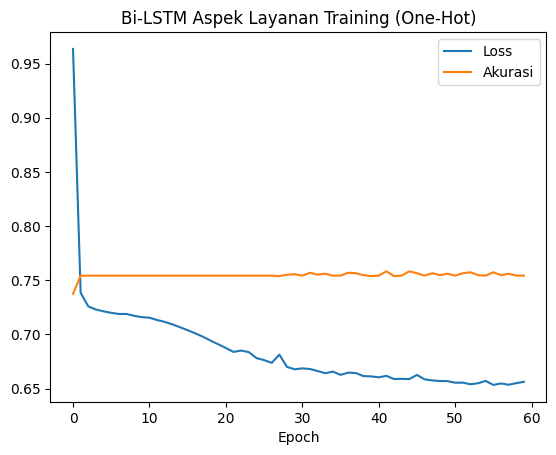

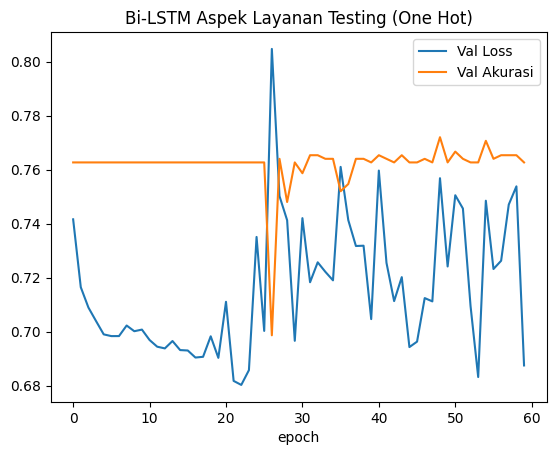

In [158]:
# Plot Training
plt.plot(history_layanan.history['loss'])
plt.plot(history_layanan.history['accuracy'])
plt.title('Bi-LSTM Aspek Layanan Training (One-Hot)')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Akurasi'], loc='upper right')
plt.show()

# Plot Testing
plt.plot(history_layanan.history['val_loss'])
plt.plot(history_layanan.history['val_accuracy'])
plt.title('Bi-LSTM Aspek Layanan Testing (One Hot)')
plt.xlabel('epoch')
plt.legend(['Val Loss', 'Val Akurasi'], loc='upper right')
plt.show()

**Prediksi Klasifikasi Bi-LSTM**

In [159]:
test_prediksi_layanan = model_bilstm_layanan.predict(X_test_onehot)
test_valid_layanan = model_bilstm_layanan.predict(X_train_onehot)

print('evaluation')
evaluation_layanan = model_bilstm_layanan.evaluate(X_test_onehot, y_uji_layanan, batch_size=minibatch)
# print('Loss:', evaluation_layanan[0], 'Accuracy:', evaluation_layanan[1])
# evaluation_layanan
y_aktual_train = np.argmax(y_latih_layanan.to_numpy(), axis=1)
y_aktual_test = np.argmax(y_uji_layanan.to_numpy(), axis=1)
y_pred_train = np.argmax(test_valid_layanan, axis=1)
y_pred_test = np.argmax(test_prediksi_layanan, axis=1)

# print("Confusion Matrix Train\n",pd.DataFrame(confusion_matrix(y_aktual_train,
#                        y_pred_train,
#                        labels=[0,1,2]), index = ["Non (Aktual)", "Pos (Aktual)", "Neg (Aktual)"],
#                        columns = ["Non (Prediksi)", "Pos (Prediksi)", "Neg (Prediksi)"])
#                        )
print("\n")
print("Confusion Matrix\n", pd.DataFrame(confusion_matrix(y_aktual_test,
                       y_pred_test,
                       labels=[0,1,2]), index = ["Non (Aktual)", "Pos (Aktual)", "Neg (Aktual)"],
                       columns = ["Non (Prediksi)", "Pos (Prediksi)", "Neg (Prediksi)"])
                       )

# print(test_prediksi_layanan[40])
# for i in test_prediksi_layanan:
#   print(i)
# for i in test_prediksi_layanan:
#   if np.argmax(i) == 0:
#     print("PREDIKSI : BUKAN SENTIMEN")
#   elif np.argmax(i) == 1:
#     print("PREDIKSI : POSITIF")
#   elif np.argmax(i) == 2:
#     print("PREDIKSI : NEGATIF")

# print(accuracy_score(y_aktual_test, y_pred_test))
# print(f"Laporan Klasifikasi Training:\n{classification_report(y_aktual_train, y_pred_train)}")
print(f"\nLaporan Klasifikasi Testing:\n{classification_report(y_aktual_test, y_pred_test)}")

71/71 [==============================] - 0s 5ms/step
evaluation
1/1 [==============================] - 0s 47ms/step - loss: 0.6875 - accuracy: 0.7627 - precision: 0.7627 - recall: 0.7627


Confusion Matrix
               Non (Prediksi)  Pos (Prediksi)  Neg (Prediksi)
Non (Aktual)             572               0               0
Pos (Aktual)              47               0               0
Neg (Aktual)             131               0               0

Laporan Klasifikasi Testing:
              precision    recall  f1-score   support

           0       0.76      1.00      0.87       572
           1       0.00      0.00      0.00        47
           2       0.00      0.00      0.00       131

    accuracy                           0.76       750
   macro avg       0.25      0.33      0.29       750
weighted avg       0.58      0.76      0.66       750



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [160]:
# hasil_prediksi_layanan_train = []
# hasil_prediksi_layanan_test = []

# for i in test_valid_layanan:
#   if np.argmax(i) == 0:
#     prediksi = "BUKAN SENTIMEN"
#     hasil_prediksi_layanan_train.append(prediksi)
#   elif np.argmax(i) == 1:
#     prediksi = "POSITIF"
#     hasil_prediksi_layanan_train.append(prediksi)
#   elif np.argmax(i) == 2:
#     prediksi = "NEGATIF"
#     hasil_prediksi_layanan_train.append(prediksi)

# for i in test_prediksi_layanan:
#   if np.argmax(i) == 0:
#     prediksi = "BUKAN SENTIMEN"
#     hasil_prediksi_layanan_test.append(prediksi)
#   elif np.argmax(i) == 1:
#     prediksi = "POSITIF"
#     hasil_prediksi_layanan_test.append(prediksi)
#   elif np.argmax(i) == 2:
#     prediksi = "NEGATIF"
#     hasil_prediksi_layanan_test.append(prediksi)

# hasil_prediksi_seluruh = hasil_prediksi_layanan_train + hasil_prediksi_layanan_test

# df_layanan = dataset_ulasan.iloc[:, 2:4]
# df_layanan.rename(columns = {'content':'Ulasan'}, inplace = True)
# # df_layanandf_layanan.drop(columns=['Fitur', 'Kebermanfaatan', 'Bisnis', 'Non Aspek'], axis=1)
# df_layanan = df_layanan.replace([0, 1, 2], ["BUKAN SENTIMEN", "POSITIF", "NEGATIF"])
# len(hasil_prediksi_seluruh)

In [161]:
# df_layanan["Prediksi"] = hasil_prediksi_seluruh
# df_layanan

#### **Fitur**

**Training Klasifikasi Bi-LSTM**

In [162]:
 # ASPEK Fitur
model_bilstm_fitur = Sequential()
model_bilstm_fitur.add(Embedding(jumlah_kata, #jumlah vocabulary
                             dimensi_embedding, # Dimensi dari dense embedding / output dim
                             input_length=batas_panjang_kalimat)) # panjang input
model_bilstm_fitur.add(Bidirectional(LSTM(hidden)))
model_bilstm_fitur.add(Dense(3, activation='softmax'))
model_bilstm_fitur.compile(loss='categorical_crossentropy',
                     optimizer=SGD(learning_rate=learning_rate),
                     metrics=['accuracy', metrik.Precision(), metrik.Recall()]
                     )

history_fitur = model_bilstm_fitur.fit(X_train_onehot, y_latih_fitur, batch_size=minibatch,
           epochs=epoch,
           validation_data=(X_test_onehot, y_uji_fitur))

# print(history_fitur.history['loss'])
# print(history_fitur.history['accuracy'])
# print(history_fitur.history['val_loss'])
# print(history_fitur.history['val_accuracy'])

print(model_bilstm_fitur.summary())

Epoch 1/60
3/3 [==============================] - 4s 601ms/step - loss: 0.9841 - accuracy: 0.6347 - precision_1: 0.7277 - recall_1: 0.0653 - val_loss: 0.9144 - val_accuracy: 0.6347 - val_precision_1: 0.6347 - val_recall_1: 0.6347
Epoch 2/60
3/3 [==============================] - 0s 154ms/step - loss: 0.7785 - accuracy: 0.7324 - precision_1: 0.7324 - recall_1: 0.7324 - val_loss: 0.9266 - val_accuracy: 0.6347 - val_precision_1: 0.6347 - val_recall_1: 0.6347
Epoch 3/60
3/3 [==============================] - 0s 126ms/step - loss: 0.7649 - accuracy: 0.7324 - precision_1: 0.7324 - recall_1: 0.7324 - val_loss: 0.9218 - val_accuracy: 0.6347 - val_precision_1: 0.6347 - val_recall_1: 0.6347
Epoch 4/60
3/3 [==============================] - 0s 147ms/step - loss: 0.7643 - accuracy: 0.7324 - precision_1: 0.7324 - recall_1: 0.7324 - val_loss: 0.9179 - val_accuracy: 0.6347 - val_precision_1: 0.6347 - val_recall_1: 0.6347
Epoch 5/60
3/3 [==============================] - 0s 152ms/step - loss: 0.7640 -

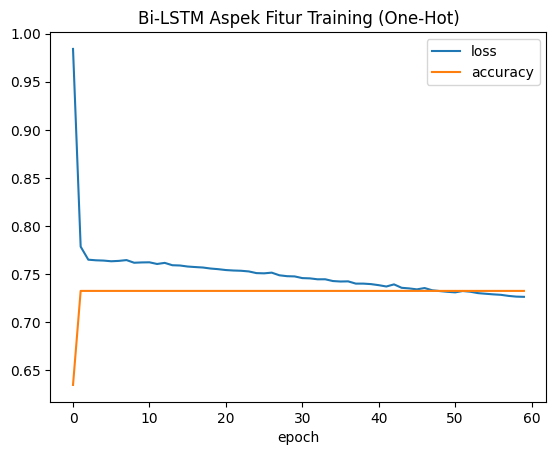

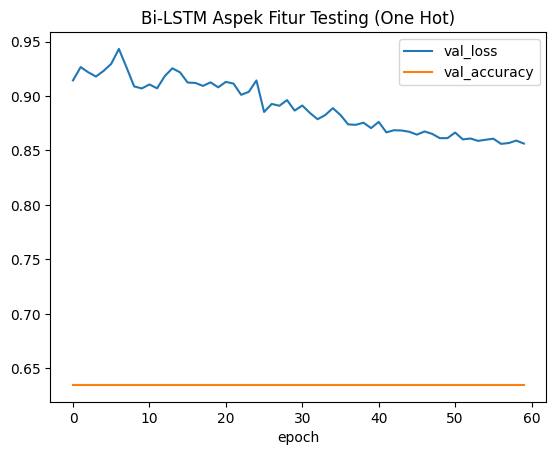

In [163]:
# Plot Training
plt.plot(history_fitur.history['loss'])
plt.plot(history_fitur.history['accuracy'])
plt.title('Bi-LSTM Aspek Fitur Training (One-Hot)')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.show()

# Plot Testing
plt.plot(history_fitur.history['val_loss'])
plt.plot(history_fitur.history['val_accuracy'])
plt.title('Bi-LSTM Aspek Fitur Testing (One Hot)')
plt.xlabel('epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='upper right')
plt.show()

**Prediksi Klasifikasi Bi-LSTM**

In [164]:
test_prediksi_fitur = model_bilstm_fitur.predict(X_test_onehot)
test_valid_fitur = model_bilstm_fitur.predict(X_train_onehot)

print('evaluation')
evaluation_fitur = model_bilstm_fitur.evaluate(X_test_onehot, y_uji_fitur, batch_size=minibatch)

y_aktual_train_fitur = np.argmax(y_latih_fitur.to_numpy(), axis=1)
y_aktual_test_fitur = np.argmax(y_uji_fitur.to_numpy(), axis=1)
y_pred_train_fitur = np.argmax(test_valid_fitur, axis=1)
y_pred_test_fitur = np.argmax(test_prediksi_fitur, axis=1)

print("\n")
print("Confusion Matrix Test\n", pd.DataFrame(confusion_matrix(y_aktual_test_fitur,
                       y_pred_test_fitur,
                       labels=[0,1,2]), index = ["Non (Aktual)", "Pos (Aktual)", "Neg (Aktual)"],
                       columns = ["Non (Prediksi)", "Pos (Prediksi)", "Neg (Prediksi)"])
                       )

# print(test_prediksi_fitur[40])
# for i in test_prediksi_fitur:
#   print(i)
# for i in test_prediksi_fitur:
#   if np.argmax(i) == 0:
#     print("PREDIKSI : BUKAN SENTIMEN")
#   elif np.argmax(i) == 1:
#     print("PREDIKSI : POSITIF")
#   elif np.argmax(i) == 2:
#     print("PREDIKSI : NEGATIF")
# np.argmax(test_prediksi_fitur[98])

print(f"\nLaporan Klasifikasi Testing:\n{classification_report(y_aktual_test_fitur, y_pred_test_fitur)}")

71/71 [==============================] - 0s 5ms/step
evaluation
1/1 [==============================] - 0s 48ms/step - loss: 0.8564 - accuracy: 0.6347 - precision_1: 0.6347 - recall_1: 0.6347


Confusion Matrix Test
               Non (Prediksi)  Pos (Prediksi)  Neg (Prediksi)
Non (Aktual)             476               0               0
Pos (Aktual)              76               0               0
Neg (Aktual)             198               0               0

Laporan Klasifikasi Testing:
              precision    recall  f1-score   support

           0       0.63      1.00      0.78       476
           1       0.00      0.00      0.00        76
           2       0.00      0.00      0.00       198

    accuracy                           0.63       750
   macro avg       0.21      0.33      0.26       750
weighted avg       0.40      0.63      0.49       750



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### **Kebermanfaatan**

**Training Klasifikasi Bi-LSTM**

In [165]:
# ASPEK KEBERMANFAATAN
model_bilstm_kebermanfaatan = Sequential()
model_bilstm_kebermanfaatan.add(Embedding(jumlah_kata, #jumlah vocabulary
                             dimensi_embedding, # Dimensi dari dense embedding / output dim
                             input_length=batas_panjang_kalimat)) # panjang input
model_bilstm_kebermanfaatan.add(Bidirectional(LSTM(hidden)))
model_bilstm_kebermanfaatan.add(Dense(3, activation='softmax'))
model_bilstm_kebermanfaatan.compile(loss='categorical_crossentropy',
                     optimizer=SGD(learning_rate=learning_rate),
                     metrics=['accuracy', metrik.Precision(), metrik.Recall()]
                     )

history_kebermanfaatan = model_bilstm_kebermanfaatan.fit(X_train_onehot, y_latih_kebermanfaatan, batch_size=minibatch,
           epochs=epoch,
           validation_data=[X_test_onehot, y_uji_kebermanfaatan])

print(model_bilstm_kebermanfaatan.summary())

Epoch 1/60
3/3 [==============================] - 6s 787ms/step - loss: 0.9374 - accuracy: 0.7876 - precision_2: 0.8168 - recall_2: 0.0733 - val_loss: 0.5973 - val_accuracy: 0.8347 - val_precision_2: 0.8347 - val_recall_2: 0.8347
Epoch 2/60
3/3 [==============================] - 0s 142ms/step - loss: 0.6362 - accuracy: 0.7880 - precision_2: 0.7880 - recall_2: 0.7880 - val_loss: 0.5441 - val_accuracy: 0.8347 - val_precision_2: 0.8347 - val_recall_2: 0.8347
Epoch 3/60
3/3 [==============================] - 0s 133ms/step - loss: 0.5940 - accuracy: 0.7880 - precision_2: 0.7880 - recall_2: 0.7880 - val_loss: 0.5213 - val_accuracy: 0.8347 - val_precision_2: 0.8347 - val_recall_2: 0.8347
Epoch 4/60
3/3 [==============================] - 0s 146ms/step - loss: 0.5759 - accuracy: 0.7880 - precision_2: 0.7880 - recall_2: 0.7880 - val_loss: 0.5102 - val_accuracy: 0.8347 - val_precision_2: 0.8347 - val_recall_2: 0.8347
Epoch 5/60
3/3 [==============================] - 0s 108ms/step - loss: 0.5686 -

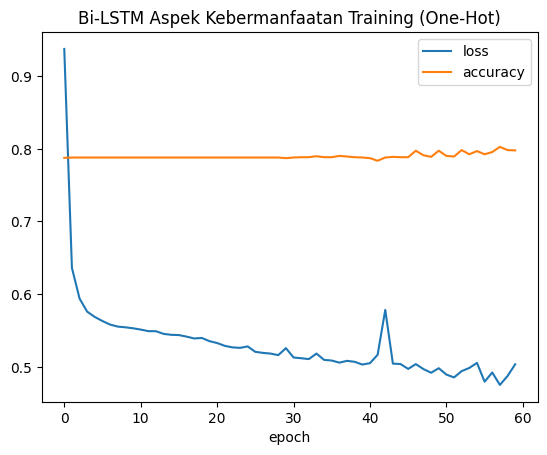

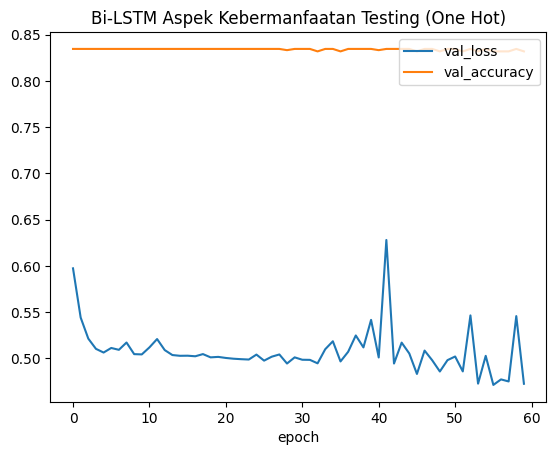

In [166]:
# Plot Training
plt.plot(history_kebermanfaatan.history['loss'])
plt.plot(history_kebermanfaatan.history['accuracy'])
plt.title('Bi-LSTM Aspek Kebermanfaatan Training (One-Hot)')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.show()

# Plot Testing
plt.plot(history_kebermanfaatan.history['val_loss'])
plt.plot(history_kebermanfaatan.history['val_accuracy'])
plt.title('Bi-LSTM Aspek Kebermanfaatan Testing (One Hot)')
plt.xlabel('epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='upper right')
plt.show()

**Prediksi Klasifikasi Bi-LSTM**

In [167]:
test_prediksi_kebermanfaatan = model_bilstm_kebermanfaatan.predict(X_test_onehot)
test_valid_kebermanfaatan = model_bilstm_kebermanfaatan.predict(X_train_onehot)

print('evaluation')
evaluation_kebermanfaatan = model_bilstm_kebermanfaatan.evaluate(X_test_onehot, y_uji_kebermanfaatan, batch_size=minibatch)
# print('Loss:', evaluation_kebermanfaatan[0], 'Accuracy:', evaluation_kebermanfaatan[1])
# evaluation_kebermanfaatan
y_aktual_train_manfaat = np.argmax(y_latih_kebermanfaatan.to_numpy(), axis=1)
y_aktual_test_manfaat = np.argmax(y_uji_kebermanfaatan.to_numpy(), axis=1)
y_pred_train_manfaat = np.argmax(test_valid_kebermanfaatan, axis=1)
y_pred_test_manfaat = np.argmax(test_prediksi_kebermanfaatan, axis=1)

print("\n")
print("Confusion Matrix Test\n", pd.DataFrame(confusion_matrix(y_aktual_test_manfaat,
                       y_pred_test_manfaat,
                       labels=[0,1,2]), index = ["Non (Aktual)", "Pos (Aktual)", "Neg (Aktual)"],
                       columns = ["Non (Prediksi)", "Pos (Prediksi)", "Neg (Prediksi)"])
                       )

# print(test_prediksi_kebermanfaatan[40])
# for i in test_prediksi_kebermanfaatan:
#   print(i)
# for i in test_prediksi_kebermanfaatan:
#   if np.argmax(i) == 0:
#     print("PREDIKSI : BUKAN SENTIMEN")
#   elif np.argmax(i) == 1:
#     print("PREDIKSI : POSITIF")
#   elif np.argmax(i) == 2:
#     print("PREDIKSI : NEGATIF")
# np.argmax(test_prediksi_kebermanfaatan[98])

print(f"\nLaporan Klasifikasi Testing:\n{classification_report(y_aktual_test_manfaat, y_pred_test_manfaat)}")

71/71 [==============================] - 0s 4ms/step
evaluation
1/1 [==============================] - 0s 47ms/step - loss: 0.4725 - accuracy: 0.8320 - precision_2: 0.8320 - recall_2: 0.8320


Confusion Matrix Test
               Non (Prediksi)  Pos (Prediksi)  Neg (Prediksi)
Non (Aktual)             623               3               0
Pos (Aktual)             110               1               0
Neg (Aktual)              13               0               0

Laporan Klasifikasi Testing:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       626
           1       0.25      0.01      0.02       111
           2       0.00      0.00      0.00        13

    accuracy                           0.83       750
   macro avg       0.36      0.33      0.31       750
weighted avg       0.73      0.83      0.76       750



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### **Bisnis**

**Training Klasifikasi Bi-LSTM**

In [168]:
# ASPEK BISNIS
model_bilstm_bisnis = Sequential()
model_bilstm_bisnis.add(Embedding(jumlah_kata, #jumlah vocabulary
                             dimensi_embedding, # Dimensi dari dense embedding / output dim
                             input_length=batas_panjang_kalimat)) # panjang input
model_bilstm_bisnis.add(Bidirectional(LSTM(hidden)))
model_bilstm_bisnis.add(Dense(3, activation='softmax'))
model_bilstm_bisnis.compile(loss='categorical_crossentropy',
                     optimizer=SGD(learning_rate=learning_rate),
                     metrics=['accuracy', metrik.Precision(), metrik.Recall()]
                     )

history_bisnis = model_bilstm_bisnis.fit(X_train_onehot, y_latih_bisnis, batch_size=minibatch,
           epochs=epoch,
           validation_data=[X_test_onehot, y_uji_bisnis])

print(model_bilstm_bisnis.summary())

Epoch 1/60
3/3 [==============================] - 5s 543ms/step - loss: 1.0427 - accuracy: 0.4231 - precision_3: 0.7143 - recall_3: 0.0022 - val_loss: 0.8553 - val_accuracy: 0.7267 - val_precision_3: 0.7267 - val_recall_3: 0.7267
Epoch 2/60
3/3 [==============================] - 0s 185ms/step - loss: 0.9180 - accuracy: 0.6320 - precision_3: 0.6320 - recall_3: 0.6320 - val_loss: 0.8257 - val_accuracy: 0.7267 - val_precision_3: 0.7267 - val_recall_3: 0.7267
Epoch 3/60
3/3 [==============================] - 1s 192ms/step - loss: 0.9080 - accuracy: 0.6320 - precision_3: 0.6320 - recall_3: 0.6320 - val_loss: 0.8021 - val_accuracy: 0.7267 - val_precision_3: 0.7267 - val_recall_3: 0.7267
Epoch 4/60
3/3 [==============================] - 0s 115ms/step - loss: 0.9058 - accuracy: 0.6320 - precision_3: 0.6320 - recall_3: 0.6320 - val_loss: 0.8043 - val_accuracy: 0.7267 - val_precision_3: 0.7267 - val_recall_3: 0.7267
Epoch 5/60
3/3 [==============================] - 0s 102ms/step - loss: 0.9039 -

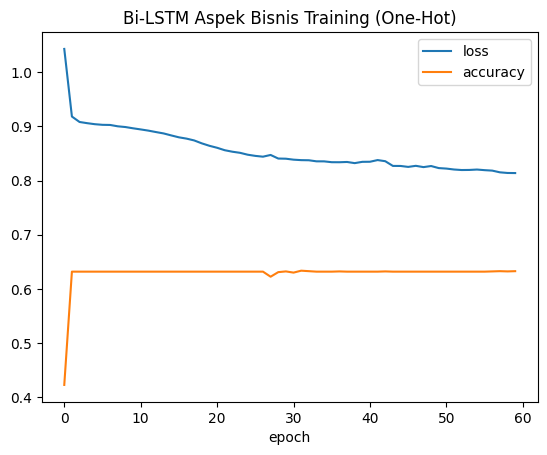

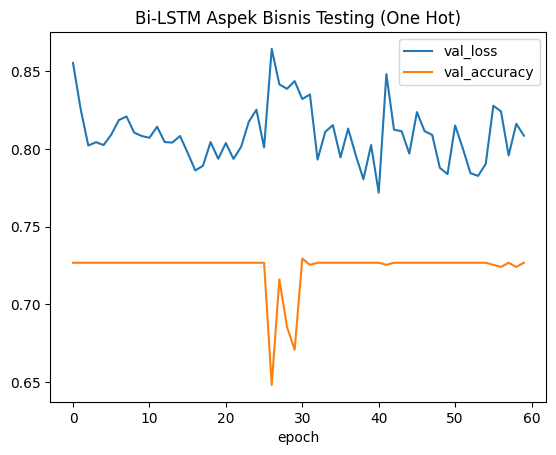

In [169]:
# Plot Training
plt.plot(history_bisnis.history['loss'])
plt.plot(history_bisnis.history['accuracy'])
plt.title('Bi-LSTM Aspek Bisnis Training (One-Hot)')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.show()

# Plot Testing
plt.plot(history_bisnis.history['val_loss'])
plt.plot(history_bisnis.history['val_accuracy'])
plt.title('Bi-LSTM Aspek Bisnis Testing (One Hot)')
plt.xlabel('epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='upper right')
plt.show()

**Prediksi Klasifikasi Bi-LSTM**

In [170]:
test_prediksi_bisnis = model_bilstm_bisnis.predict(X_test_onehot)
test_valid_bisnis = model_bilstm_bisnis.predict(X_train_onehot)

print('evaluation')
evaluation_bisnis = model_bilstm_bisnis.evaluate(X_test_onehot, y_uji_bisnis, batch_size=minibatch)

y_aktual_train_bisnis = np.argmax(y_latih_bisnis.to_numpy(), axis=1)
y_aktual_test_bisnis = np.argmax(y_uji_bisnis.to_numpy(), axis=1)
y_pred_train_bisnis = np.argmax(test_valid_bisnis, axis=1)
y_pred_test_bisnis = np.argmax(test_prediksi_bisnis, axis=1)

print("\n")
print("Confusion Matrix Test\n", pd.DataFrame(confusion_matrix(y_aktual_test_bisnis,
                       y_pred_test_bisnis,
                       labels=[0,1,2]), index = ["Non (Aktual)", "Pos (Aktual)", "Neg (Aktual)"],
                       columns = ["Non (Prediksi)", "Pos (Prediksi)", "Neg (Prediksi)"])
                       )

# print(test_prediksi[40])
# for i in test_prediksi_bisnis:
#   print(i)
# for i in test_prediksi_bisnis:
#   if np.argmax(i) == 0:
#     print("PREDIKSI : BUKAN SENTIMEN")
#   elif np.argmax(i) == 1:
#     print("PREDIKSI : POSITIF")
#   elif np.argmax(i) == 2:
#     print("PREDIKSI : NEGATIF")
# np.argmax(test_prediksi_bisnis[98])

print(f"\nLaporan Klasifikasi Testing:\n{classification_report(y_aktual_test_bisnis, y_pred_test_bisnis)}")

71/71 [==============================] - 0s 5ms/step
evaluation
1/1 [==============================] - 0s 60ms/step - loss: 0.8085 - accuracy: 0.7267 - precision_3: 0.7343 - recall_3: 0.6707


Confusion Matrix Test
               Non (Prediksi)  Pos (Prediksi)  Neg (Prediksi)
Non (Aktual)             545               0               0
Pos (Aktual)              58               0               0
Neg (Aktual)             147               0               0

Laporan Klasifikasi Testing:
              precision    recall  f1-score   support

           0       0.73      1.00      0.84       545
           1       0.00      0.00      0.00        58
           2       0.00      0.00      0.00       147

    accuracy                           0.73       750
   macro avg       0.24      0.33      0.28       750
weighted avg       0.53      0.73      0.61       750



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### **Non Aspek**

**Training Klasifikasi Bi-LSTM**

In [171]:
# ASPEK Non Aspek
model_bilstm_non_aspek = Sequential()
model_bilstm_non_aspek.add(Embedding(jumlah_kata, #jumlah vocabulary
                             dimensi_embedding, # Dimensi dari dense embedding / output dim
                             input_length=batas_panjang_kalimat)) # panjang input
model_bilstm_non_aspek.add(Bidirectional(LSTM(hidden)))
model_bilstm_non_aspek.add(Dense(3, activation='softmax'))
model_bilstm_non_aspek.compile(loss='categorical_crossentropy',
                     optimizer=SGD(learning_rate=learning_rate),
                     metrics=['accuracy', metrik.Precision(), metrik.Recall()]
                     )

history_non_aspek = model_bilstm_non_aspek.fit(X_train_onehot, y_latih_non_aspek, batch_size=minibatch,
           epochs=epoch,
           validation_data=[X_test_onehot, y_uji_non_aspek])

print(model_bilstm_non_aspek.summary())

Epoch 1/60
3/3 [==============================] - 5s 515ms/step - loss: 0.9911 - accuracy: 0.4631 - precision_4: 0.7525 - recall_4: 0.0676 - val_loss: 0.9246 - val_accuracy: 0.6187 - val_precision_4: 0.6187 - val_recall_4: 0.6187
Epoch 2/60
3/3 [==============================] - 0s 126ms/step - loss: 0.7598 - accuracy: 0.7467 - precision_4: 0.7467 - recall_4: 0.7467 - val_loss: 0.9644 - val_accuracy: 0.6187 - val_precision_4: 0.6187 - val_recall_4: 0.6187
Epoch 3/60
3/3 [==============================] - 0s 99ms/step - loss: 0.7403 - accuracy: 0.7467 - precision_4: 0.7467 - recall_4: 0.7467 - val_loss: 0.9694 - val_accuracy: 0.6187 - val_precision_4: 0.6187 - val_recall_4: 0.6187
Epoch 4/60
3/3 [==============================] - 0s 125ms/step - loss: 0.7396 - accuracy: 0.7467 - precision_4: 0.7467 - recall_4: 0.7467 - val_loss: 0.9671 - val_accuracy: 0.6187 - val_precision_4: 0.6187 - val_recall_4: 0.6187
Epoch 5/60
3/3 [==============================] - 0s 102ms/step - loss: 0.7393 - 

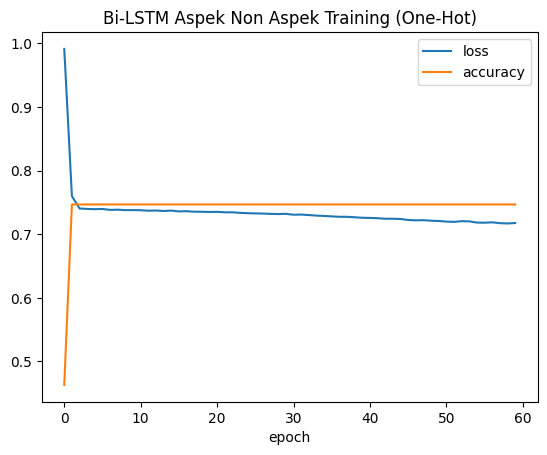

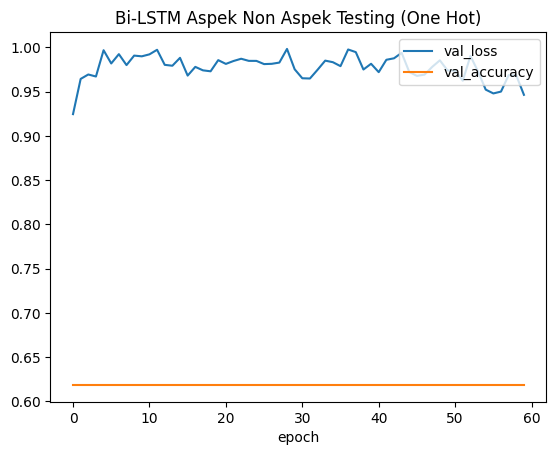

In [172]:
# Plot Training
plt.plot(history_non_aspek.history['loss'])
plt.plot(history_non_aspek.history['accuracy'])
plt.title('Bi-LSTM Aspek Non Aspek Training (One-Hot)')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.show()

# Plot Testing
plt.plot(history_non_aspek.history['val_loss'])
plt.plot(history_non_aspek.history['val_accuracy'])
plt.title('Bi-LSTM Aspek Non Aspek Testing (One Hot)')
plt.xlabel('epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='upper right')
plt.show()

**Prediksi Klasifikasi Bi-LSTM**

In [173]:
test_prediksi_non_aspek = model_bilstm_non_aspek.predict(X_test_onehot)
test_valid_non_aspek = model_bilstm_non_aspek.predict(X_train_onehot)

print('evaluation')
evaluation_non_aspek = model_bilstm_non_aspek.evaluate(X_test_onehot, y_uji_non_aspek, batch_size=minibatch)
y_aktual_train_non_aspek = np.argmax(y_latih_non_aspek.to_numpy(), axis=1)
y_aktual_test_non_aspek = np.argmax(y_uji_non_aspek.to_numpy(), axis=1)
y_pred_train_non_aspek = np.argmax(test_valid_non_aspek, axis=1)
y_pred_test_non_aspek = np.argmax(test_prediksi_non_aspek, axis=1)

print("\n")
print("Confusion Matrix Test\n", pd.DataFrame(confusion_matrix(y_aktual_test_non_aspek,
                       y_pred_test_non_aspek,
                       labels=[0,1,2]), index = ["Non (Aktual)", "Pos (Aktual)", "Neg (Aktual)"],
                       columns = ["Non (Prediksi)", "Pos (Prediksi)", "Neg (Prediksi)"])
                       )

# print(test_prediksi_non_aspek[40])
# for i in test_prediksi_non_aspek:
#   print(i)
# for i in test_prediksi_non_aspek:
#   if np.argmax(i) == 0:
#     print("PREDIKSI : BUKAN SENTIMEN")
#   elif np.argmax(i) == 1:
#     print("PREDIKSI : POSITIF")
#   elif np.argmax(i) == 2:
#     print("PREDIKSI : NEGATIF")
# np.argmax(test_prediksi_non_aspek[98])

print(f"Laporan Klasifikasi Testing:\n{classification_report(y_aktual_test_non_aspek, y_pred_test_non_aspek)}")

71/71 [==============================] - 0s 5ms/step
evaluation
1/1 [==============================] - 0s 49ms/step - loss: 0.9464 - accuracy: 0.6187 - precision_4: 0.6187 - recall_4: 0.6187


Confusion Matrix Test
               Non (Prediksi)  Pos (Prediksi)  Neg (Prediksi)
Non (Aktual)             464               0               0
Pos (Aktual)              90               0               0
Neg (Aktual)             196               0               0
Laporan Klasifikasi Testing:
              precision    recall  f1-score   support

           0       0.62      1.00      0.76       464
           1       0.00      0.00      0.00        90
           2       0.00      0.00      0.00       196

    accuracy                           0.62       750
   macro avg       0.21      0.33      0.25       750
weighted avg       0.38      0.62      0.47       750



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Mencoba Prediksi dengan kalimat

In [174]:
# # Testing kalimat lain
# # input("masukkan")
# test_sentimen = "suka sama layananannya gak jelas bangett boss asli dah lah cape"
# # nanti tambahin preprocessing
# token_sentimen_tes = tokenizer_keras.texts_to_sequences([test_sentimen])
# pad_sentimen_tes = pad_sequences(token_sentimen_tes, maxlen=batas_panjang_kalimat)

# # Prediksi
# sentimen_prediksi_test = model_bilstm_layanan.predict(pad_sentimen_tes)
# if np.argmax(sentimen_prediksi_test) == 0:
#   print("PREDIKSI : BUKAN SENTIMEN")
# elif np.argmax(sentimen_prediksi_test) == 1:
#   print("PREDIKSI : POSITIF")
# elif np.argmax(sentimen_prediksi_test) == 2:
#   print("PREDIKSI : NEGATIF")

# sentimen_prediksi_test

### **BiLSTM & Word2Vec CBOW**

#### **Layanan**

In [175]:
model_bilstm_layanan_cbow = Sequential()
model_bilstm_layanan_cbow.add(Bidirectional(LSTM(hidden, input_shape=(jumlah_kata,dimensi_embedding))), )
model_bilstm_layanan_cbow.add(Dense(3, activation='softmax'))
model_bilstm_layanan_cbow.compile(loss='categorical_crossentropy',
                     optimizer=SGD(learning_rate=learning_rate),
                     metrics=['accuracy']
                     )

history_layanan_cbow = model_bilstm_layanan_cbow.fit(X_train_CBOW,
                                               y_latih_layanan, batch_size=minibatch,
                                               epochs=epoch,
                                               validation_data=(X_test_CBOW, y_uji_layanan))

print(model_bilstm_layanan_cbow.summary())

Epoch 1/60
3/3 [==============================] - 5s 555ms/step - loss: 0.9797 - accuracy: 0.5191 - val_loss: 0.7584 - val_accuracy: 0.7600
Epoch 2/60
3/3 [==============================] - 0s 141ms/step - loss: 0.7080 - accuracy: 0.7533 - val_loss: 0.6900 - val_accuracy: 0.7613
Epoch 3/60
3/3 [==============================] - 0s 137ms/step - loss: 0.6541 - accuracy: 0.7604 - val_loss: 0.6613 - val_accuracy: 0.7653
Epoch 4/60
3/3 [==============================] - 0s 115ms/step - loss: 0.6211 - accuracy: 0.7671 - val_loss: 0.6395 - val_accuracy: 0.7680
Epoch 5/60
3/3 [==============================] - 0s 153ms/step - loss: 0.5951 - accuracy: 0.7760 - val_loss: 0.6227 - val_accuracy: 0.7693
Epoch 6/60
3/3 [==============================] - 0s 124ms/step - loss: 0.5716 - accuracy: 0.7800 - val_loss: 0.6124 - val_accuracy: 0.7747
Epoch 7/60
3/3 [==============================] - 0s 121ms/step - loss: 0.5539 - accuracy: 0.7867 - val_loss: 0.6039 - val_accuracy: 0.7680
Epoch 8/60
3/3 [====

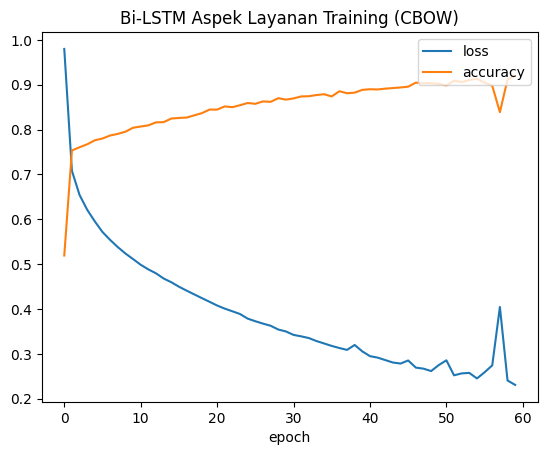

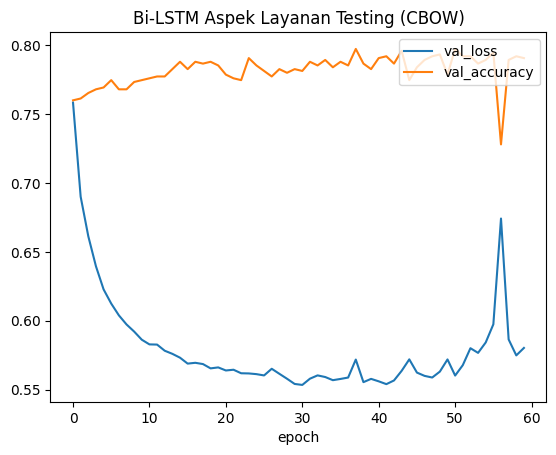

In [176]:
# Plot Training
plt.plot(history_layanan_cbow.history['loss'])
plt.plot(history_layanan_cbow.history['accuracy'])
plt.title('Bi-LSTM Aspek Layanan Training (CBOW)')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.show()

# Plot Testing
plt.plot(history_layanan_cbow.history['val_loss'])
plt.plot(history_layanan_cbow.history['val_accuracy'])
plt.title('Bi-LSTM Aspek Layanan Testing (CBOW)')
plt.xlabel('epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='upper right')
plt.show()

In [177]:
test_prediksi_layanan_cbow = model_bilstm_layanan_cbow.predict(X_test_CBOW)
test_valid_layanan_cbow = model_bilstm_layanan_cbow.predict(X_train_CBOW)

print('evaluation')
evaluation_layanan_cbow = model_bilstm_layanan_cbow.evaluate(X_test_CBOW, y_uji_layanan, batch_size=minibatch)

y_aktual_train_layanan_cbow = np.argmax(y_latih_layanan.to_numpy(), axis=1)
y_aktual_test_layanan_cbow = np.argmax(y_uji_layanan.to_numpy(), axis=1)
y_pred_train_layanan_cbow = np.argmax(test_valid_layanan_cbow, axis=1)
y_pred_test_layanan_cbow = np.argmax(test_prediksi_layanan_cbow, axis=1)

print("\n")
print("Confusion Matrix Test\n", pd.DataFrame(confusion_matrix(y_aktual_test_layanan_cbow,
                       y_pred_test_layanan_cbow,
                       labels=[0,1,2]), index = ["Non (Aktual)", "Pos (Aktual)", "Neg (Aktual)"],
                       columns = ["Non (Prediksi)", "Pos (Prediksi)", "Neg (Prediksi)"])
                       )

# print(test_prediksi[40])
# for i in test_prediksi_layanan_cbow:
#   print(i)
# for i in test_prediksi_layanan_cbow:
#   if np.argmax(i) == 0:
#     print("PREDIKSI : BUKAN SENTIMEN")
#   elif np.argmax(i) == 1:
#     print("PREDIKSI : POSITIF")
#   elif np.argmax(i) == 2:
#     print("PREDIKSI : NEGATIF")
# np.argmax(test_prediksi_layanan_cbow[98])

print(f"\nLaporan Klasifikasi Testing:\n{classification_report(y_aktual_test_layanan_cbow, y_pred_test_layanan_cbow)}")


71/71 [==============================] - 0s 7ms/step
evaluation
1/1 [==============================] - 0s 87ms/step - loss: 0.5802 - accuracy: 0.7907


Confusion Matrix Test
               Non (Prediksi)  Pos (Prediksi)  Neg (Prediksi)
Non (Aktual)             533               5              34
Pos (Aktual)              33              11               3
Neg (Aktual)              78               4              49

Laporan Klasifikasi Testing:
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       572
           1       0.55      0.23      0.33        47
           2       0.57      0.37      0.45       131

    accuracy                           0.79       750
   macro avg       0.65      0.51      0.55       750
weighted avg       0.77      0.79      0.77       750



#### **Fitur**

In [178]:
model_bilstm_fitur_cbow = Sequential()
model_bilstm_fitur_cbow.add(Bidirectional(LSTM(hidden, input_shape=(jumlah_kata,dimensi_embedding))))
model_bilstm_fitur_cbow.add(Dense(3, activation='softmax'))
model_bilstm_fitur_cbow.compile(loss='categorical_crossentropy',
                     optimizer=SGD(learning_rate=learning_rate),
                     metrics=['accuracy']
                     )

history_fitur_cbow = model_bilstm_fitur_cbow.fit(X_train_CBOW,
                                               y_latih_fitur, batch_size=minibatch,
                                               epochs=epoch,
                                               validation_data=[X_test_CBOW, y_uji_fitur])

print(model_bilstm_fitur_cbow.summary())

Epoch 1/60
3/3 [==============================] - 6s 884ms/step - loss: 0.9714 - accuracy: 0.5596 - val_loss: 0.8953 - val_accuracy: 0.6267
Epoch 2/60
3/3 [==============================] - 0s 129ms/step - loss: 0.7294 - accuracy: 0.7316 - val_loss: 0.8627 - val_accuracy: 0.6280
Epoch 3/60
3/3 [==============================] - 0s 128ms/step - loss: 0.6713 - accuracy: 0.7338 - val_loss: 0.8438 - val_accuracy: 0.6280
Epoch 4/60
3/3 [==============================] - 0s 113ms/step - loss: 0.6346 - accuracy: 0.7369 - val_loss: 0.8296 - val_accuracy: 0.6293
Epoch 5/60
3/3 [==============================] - 0s 98ms/step - loss: 0.6063 - accuracy: 0.7493 - val_loss: 0.8174 - val_accuracy: 0.6280
Epoch 6/60
3/3 [==============================] - 0s 138ms/step - loss: 0.5834 - accuracy: 0.7596 - val_loss: 0.8050 - val_accuracy: 0.6467
Epoch 7/60
3/3 [==============================] - 0s 163ms/step - loss: 0.5632 - accuracy: 0.7729 - val_loss: 0.7991 - val_accuracy: 0.6520
Epoch 8/60
3/3 [=====

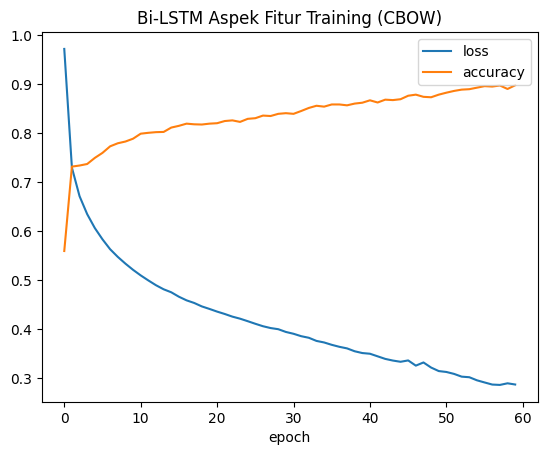

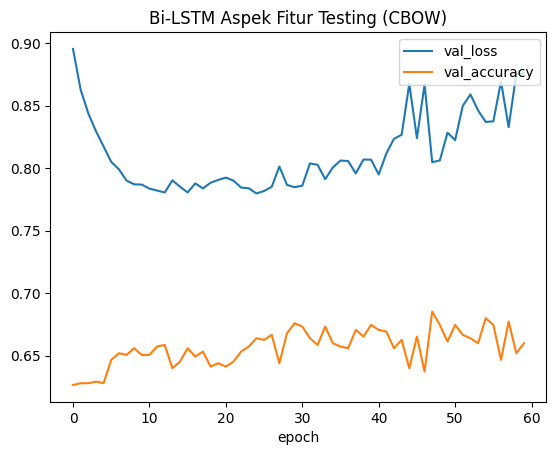

In [179]:
# Plot Training
plt.plot(history_fitur_cbow.history['loss'])
plt.plot(history_fitur_cbow.history['accuracy'])
plt.title('Bi-LSTM Aspek Fitur Training (CBOW)')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.show()

# Plot Testing
plt.plot(history_fitur_cbow.history['val_loss'])
plt.plot(history_fitur_cbow.history['val_accuracy'])
plt.title('Bi-LSTM Aspek Fitur Testing (CBOW)')
plt.xlabel('epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='upper right')
plt.show()

In [180]:
test_prediksi_fitur_cbow = model_bilstm_fitur_cbow.predict(X_test_CBOW)
test_valid_fitur_cbow = model_bilstm_fitur_cbow.predict(X_train_CBOW)

print('evaluation')
evaluation_fitur_cbow = model_bilstm_fitur_cbow.evaluate(X_test_CBOW, y_uji_fitur, batch_size=minibatch)
# print('Loss:', evaluation_fitur_cbow[0], 'Accuracy:', evaluation_fitur_cbow[1])
# evaluation_fitur_cbow
y_aktual_train_fitur_cbow = np.argmax(y_latih_fitur.to_numpy(), axis=1)
y_aktual_test_fitur_cbow = np.argmax(y_uji_fitur.to_numpy(), axis=1)
y_pred_train_fitur_cbow = np.argmax(test_valid_fitur_cbow, axis=1)
y_pred_test_fitur_cbow = np.argmax(test_prediksi_fitur_cbow, axis=1)

print("\n")
print("Confusion Matrix Test\n", pd.DataFrame(confusion_matrix(y_aktual_test_fitur_cbow,
                       y_pred_test_fitur_cbow,
                       labels=[0,1,2]), index = ["Non (Aktual)", "Pos (Aktual)", "Neg (Aktual)"],
                       columns = ["Non (Prediksi)", "Pos (Prediksi)", "Neg (Prediksi)"])
                       )

# print(test_prediksi_fitur_cbow[40])
# for i in test_prediksi_fitur_cbow:
#   print(i)
# for i in test_prediksi_fitur_cbow:
#   if np.argmax(i) == 0:
#     print("PREDIKSI : BUKAN SENTIMEN")
#   elif np.argmax(i) == 1:
#     print("PREDIKSI : POSITIF")
#   elif np.argmax(i) == 2:
#     print("PREDIKSI : NEGATIF")
# np.argmax(test_prediksi_fitur_cbow[98])

print(f"Laporan Klasifikasi Testing:\n{classification_report(y_aktual_test_fitur_cbow, y_pred_test_fitur_cbow)}")


71/71 [==============================] - 0s 7ms/step
evaluation
1/1 [==============================] - 0s 96ms/step - loss: 0.8758 - accuracy: 0.6600


Confusion Matrix Test
               Non (Prediksi)  Pos (Prediksi)  Neg (Prediksi)
Non (Aktual)             332              35             109
Pos (Aktual)              29              38               9
Neg (Aktual)              62              11             125
Laporan Klasifikasi Testing:
              precision    recall  f1-score   support

           0       0.78      0.70      0.74       476
           1       0.45      0.50      0.48        76
           2       0.51      0.63      0.57       198

    accuracy                           0.66       750
   macro avg       0.58      0.61      0.59       750
weighted avg       0.68      0.66      0.67       750



#### **Kebermanfaatan**

In [181]:
model_bilstm_kebermanfaatan_cbow = Sequential()
model_bilstm_kebermanfaatan_cbow.add(Bidirectional(LSTM(hidden, input_shape=(jumlah_kata,dimensi_embedding))))
model_bilstm_kebermanfaatan_cbow.add(Dense(3, activation='softmax'))
model_bilstm_kebermanfaatan_cbow.compile(loss='categorical_crossentropy',
                     optimizer=SGD(learning_rate=learning_rate),
                     metrics=['accuracy'])

history_kebermanfaatan_cbow = model_bilstm_kebermanfaatan_cbow.fit(X_train_CBOW,
                                               y_latih_kebermanfaatan, batch_size=minibatch,
                                               epochs=epoch,
                                               validation_data=[X_test_CBOW, y_uji_kebermanfaatan])

print(model_bilstm_kebermanfaatan_cbow.summary())

Epoch 1/60
3/3 [==============================] - 5s 535ms/step - loss: 0.9162 - accuracy: 0.6124 - val_loss: 0.5574 - val_accuracy: 0.8573
Epoch 2/60
3/3 [==============================] - 0s 110ms/step - loss: 0.5438 - accuracy: 0.8227 - val_loss: 0.4339 - val_accuracy: 0.8733
Epoch 3/60
3/3 [==============================] - 0s 97ms/step - loss: 0.4384 - accuracy: 0.8556 - val_loss: 0.3739 - val_accuracy: 0.8840
Epoch 4/60
3/3 [==============================] - 0s 116ms/step - loss: 0.3827 - accuracy: 0.8676 - val_loss: 0.3419 - val_accuracy: 0.8947
Epoch 5/60
3/3 [==============================] - 0s 98ms/step - loss: 0.3497 - accuracy: 0.8813 - val_loss: 0.3220 - val_accuracy: 0.9053
Epoch 6/60
3/3 [==============================] - 0s 134ms/step - loss: 0.3277 - accuracy: 0.8911 - val_loss: 0.3110 - val_accuracy: 0.9053
Epoch 7/60
3/3 [==============================] - 0s 141ms/step - loss: 0.3115 - accuracy: 0.8898 - val_loss: 0.2996 - val_accuracy: 0.9093
Epoch 8/60
3/3 [======

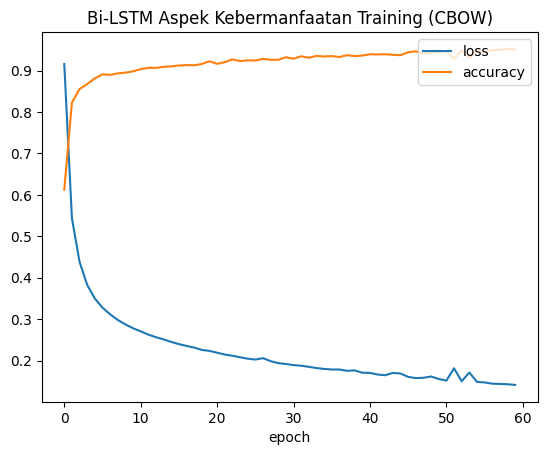

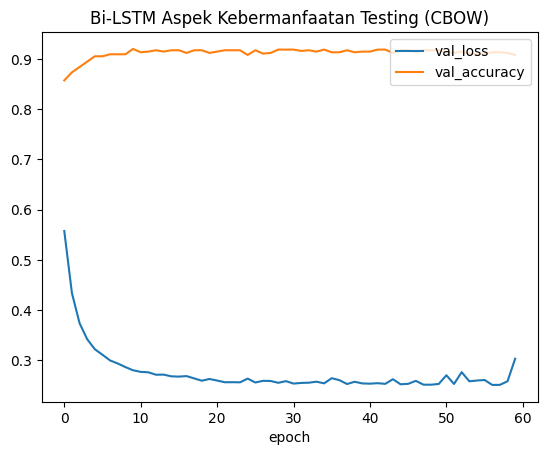

In [182]:
# Plot Training
plt.plot(history_kebermanfaatan_cbow.history['loss'])
plt.plot(history_kebermanfaatan_cbow.history['accuracy'])
plt.title('Bi-LSTM Aspek Kebermanfaatan Training (CBOW)')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.show()

# Plot Testing
plt.plot(history_kebermanfaatan_cbow.history['val_loss'])
plt.plot(history_kebermanfaatan_cbow.history['val_accuracy'])
plt.title('Bi-LSTM Aspek Kebermanfaatan Testing (CBOW)')
plt.xlabel('epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='upper right')
plt.show()

In [183]:
test_prediksi_manfaat_cbow = model_bilstm_kebermanfaatan_cbow.predict(X_test_CBOW)
test_valid_manfaat_cbow = model_bilstm_kebermanfaatan_cbow.predict(X_train_CBOW)

print('evaluation')
evaluation_manfaat_cbow = model_bilstm_kebermanfaatan_cbow.evaluate(X_test_CBOW, y_uji_kebermanfaatan, batch_size=minibatch)
# print('Loss:', evaluation_manfaat_cbow[0], 'Accuracy:', evaluation_manfaat_cbow[1])
# evaluation_manfaat_cbow
y_aktual_train_manfaat_cbow = np.argmax(y_latih_kebermanfaatan.to_numpy(), axis=1)
y_aktual_test_manfaat_cbow = np.argmax(y_uji_kebermanfaatan.to_numpy(), axis=1)
y_pred_train_manfaat_cbow = np.argmax(test_valid_manfaat_cbow, axis=1)
y_pred_test_manfaat_cbow = np.argmax(test_prediksi_manfaat_cbow, axis=1)

print("\n")
print("Confusion Matrix Test\n", pd.DataFrame(confusion_matrix(y_aktual_test_manfaat_cbow,
                       y_pred_test_manfaat_cbow,
                       labels=[0,1,2]), index = ["Non (Aktual)", "Pos (Aktual)", "Neg (Aktual)"],
                       columns = ["Non (Prediksi)", "Pos (Prediksi)", "Neg (Prediksi)"])
                       )

# print(test_prediksi_manfaat_cbow[40])
# for i in test_prediksi_manfaat_cbow:
#   print(i)
# for i in test_prediksi_manfaat_cbow:
#   if np.argmax(i) == 0:
#     print("PREDIKSI : BUKAN SENTIMEN")
#   elif np.argmax(i) == 1:
#     print("PREDIKSI : POSITIF")
#   elif np.argmax(i) == 2:
#     print("PREDIKSI : NEGATIF")
# np.argmax(test_prediksi_manfaat_cbow[98])

print(f"Laporan Klasifikasi Testing:\n{classification_report(y_aktual_test_manfaat_cbow, y_pred_test_manfaat_cbow)}")

71/71 [==============================] - 0s 6ms/step
evaluation
1/1 [==============================] - 0s 87ms/step - loss: 0.3031 - accuracy: 0.9080


Confusion Matrix Test
               Non (Prediksi)  Pos (Prediksi)  Neg (Prediksi)
Non (Aktual)             618               8               0
Pos (Aktual)              48              63               0
Neg (Aktual)              13               0               0
Laporan Klasifikasi Testing:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       626
           1       0.89      0.57      0.69       111
           2       0.00      0.00      0.00        13

    accuracy                           0.91       750
   macro avg       0.60      0.52      0.55       750
weighted avg       0.89      0.91      0.89       750



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### **Bisnis**

In [184]:
model_bilstm_bisnis_cbow = Sequential()
model_bilstm_bisnis_cbow.add(Bidirectional(LSTM(hidden, input_shape=(jumlah_kata,dimensi_embedding))))
model_bilstm_bisnis_cbow.add(Dense(3, activation='softmax'))
model_bilstm_bisnis_cbow.compile(loss='categorical_crossentropy',
                     optimizer=SGD(learning_rate=learning_rate),
                     metrics=['accuracy']
                     )

history_bisnis_cbow = model_bilstm_bisnis_cbow.fit(X_train_CBOW,
                                               y_latih_bisnis, batch_size=minibatch,
                                               epochs=epoch,
                                               validation_data=[X_test_CBOW, y_uji_bisnis])

print(model_bilstm_bisnis_cbow.summary())

Epoch 1/60
3/3 [==============================] - 8s 2s/step - loss: 1.0146 - accuracy: 0.5013 - val_loss: 0.8010 - val_accuracy: 0.7347
Epoch 2/60
3/3 [==============================] - 1s 253ms/step - loss: 0.8340 - accuracy: 0.6444 - val_loss: 0.7288 - val_accuracy: 0.7347
Epoch 3/60
3/3 [==============================] - 1s 320ms/step - loss: 0.7644 - accuracy: 0.6676 - val_loss: 0.6913 - val_accuracy: 0.7453
Epoch 4/60
3/3 [==============================] - 0s 167ms/step - loss: 0.7131 - accuracy: 0.6982 - val_loss: 0.6613 - val_accuracy: 0.7533
Epoch 5/60
3/3 [==============================] - 0s 138ms/step - loss: 0.6743 - accuracy: 0.7244 - val_loss: 0.6376 - val_accuracy: 0.7547
Epoch 6/60
3/3 [==============================] - 0s 174ms/step - loss: 0.6427 - accuracy: 0.7427 - val_loss: 0.6233 - val_accuracy: 0.7600
Epoch 7/60
3/3 [==============================] - 0s 170ms/step - loss: 0.6170 - accuracy: 0.7498 - val_loss: 0.6152 - val_accuracy: 0.7600
Epoch 8/60
3/3 [=======

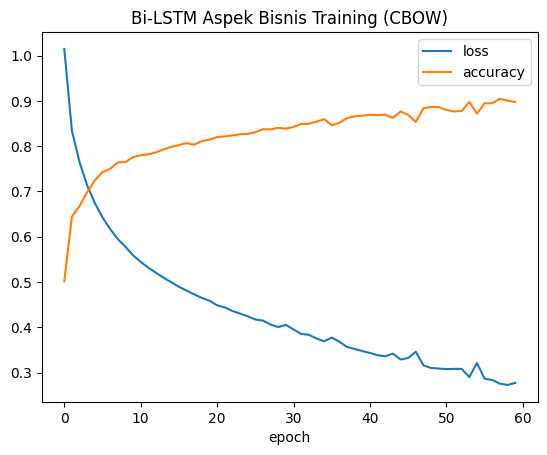

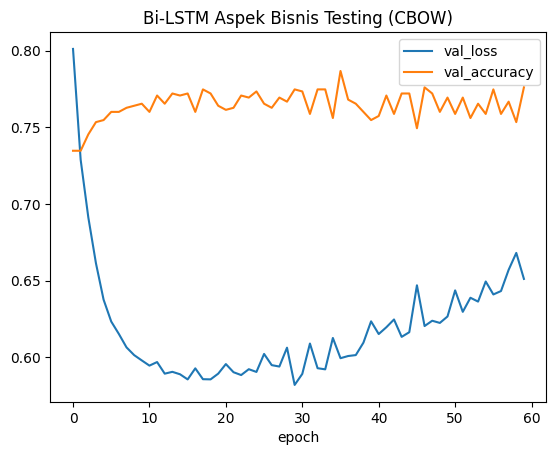

In [185]:
# Plot Training
plt.plot(history_bisnis_cbow.history['loss'])
plt.plot(history_bisnis_cbow.history['accuracy'])
plt.title('Bi-LSTM Aspek Bisnis Training (CBOW)')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.show()

# Plot Testing
plt.plot(history_bisnis_cbow.history['val_loss'])
plt.plot(history_bisnis_cbow.history['val_accuracy'])
plt.title('Bi-LSTM Aspek Bisnis Testing (CBOW)')
plt.xlabel('epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='upper right')
plt.show()

In [186]:
test_prediksi_bisnis_cbow = model_bilstm_bisnis_cbow.predict(X_test_CBOW)
test_valid_bisnis_cbow = model_bilstm_bisnis_cbow.predict(X_train_CBOW)

print('evaluation')
evaluation_bisnis_cbow = model_bilstm_bisnis_cbow.evaluate(X_test_CBOW, y_uji_bisnis, batch_size=minibatch)
y_aktual_train_bisnis_cbow = np.argmax(y_latih_bisnis.to_numpy(), axis=1)
y_aktual_test_bisnis_cbow = np.argmax(y_uji_bisnis.to_numpy(), axis=1)
y_pred_train_bisnis_cbow = np.argmax(test_valid_bisnis_cbow, axis=1)
y_pred_test_bisnis_cbow = np.argmax(test_prediksi_bisnis_cbow, axis=1)

print("\n")
print("Confusion Matrix Test\n", pd.DataFrame(confusion_matrix(y_aktual_test_bisnis_cbow,
                       y_pred_test_bisnis_cbow,
                       labels=[0,1,2]), index = ["Non (Aktual)", "Pos (Aktual)", "Neg (Aktual)"],
                       columns = ["Non (Prediksi)", "Pos (Prediksi)", "Neg (Prediksi)"])
                       )

# print(test_prediksi_bisnis_cbow[40])
# for i in test_prediksi_bisnis_cbow:
#   print(i)
# for i in test_prediksi_bisnis_cbow:
#   if np.argmax(i) == 0:
#     print("PREDIKSI : BUKAN SENTIMEN")
#   elif np.argmax(i) == 1:
#     print("PREDIKSI : POSITIF")
#   elif np.argmax(i) == 2:
#     print("PREDIKSI : NEGATIF")
# np.argmax(test_prediksi_bisnis_cbow[98])

print(f"\nLaporan Klasifikasi Testing:\n{classification_report(y_aktual_test_bisnis_cbow, y_pred_test_bisnis_cbow)}")

71/71 [==============================] - 0s 5ms/step
evaluation
1/1 [==============================] - 0s 192ms/step - loss: 0.6511 - accuracy: 0.7760


Confusion Matrix Test
               Non (Prediksi)  Pos (Prediksi)  Neg (Prediksi)
Non (Aktual)             489              12              44
Pos (Aktual)              28              27               3
Neg (Aktual)              73               8              66

Laporan Klasifikasi Testing:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       545
           1       0.57      0.47      0.51        58
           2       0.58      0.45      0.51       147

    accuracy                           0.78       750
   macro avg       0.66      0.60      0.63       750
weighted avg       0.76      0.78      0.77       750



#### Non Aspek

In [187]:
model_bilstm_nonaspek_cbow = Sequential()
model_bilstm_nonaspek_cbow.add(Bidirectional(LSTM(hidden, input_shape=(jumlah_kata,dimensi_embedding))))
model_bilstm_nonaspek_cbow.add(Dense(3, activation='softmax'))
model_bilstm_nonaspek_cbow.compile(loss='categorical_crossentropy',
                     optimizer=SGD(learning_rate=learning_rate),
                     metrics=['accuracy']
                     )

history_nonaspek_cbow = model_bilstm_nonaspek_cbow.fit(X_train_CBOW,
                                               y_latih_non_aspek, batch_size=minibatch,
                                               epochs=epoch,
                                               validation_data=[X_test_CBOW, y_uji_non_aspek])

print(model_bilstm_nonaspek_cbow.summary())

Epoch 1/60
3/3 [==============================] - 14s 556ms/step - loss: 0.9557 - accuracy: 0.5898 - val_loss: 0.9038 - val_accuracy: 0.6227
Epoch 2/60
3/3 [==============================] - 0s 159ms/step - loss: 0.7230 - accuracy: 0.7471 - val_loss: 0.9016 - val_accuracy: 0.6227
Epoch 3/60
3/3 [==============================] - 0s 174ms/step - loss: 0.6821 - accuracy: 0.7480 - val_loss: 0.8897 - val_accuracy: 0.6253
Epoch 4/60
3/3 [==============================] - 1s 278ms/step - loss: 0.6621 - accuracy: 0.7489 - val_loss: 0.8805 - val_accuracy: 0.6293
Epoch 5/60
3/3 [==============================] - 0s 174ms/step - loss: 0.6475 - accuracy: 0.7480 - val_loss: 0.8798 - val_accuracy: 0.6320
Epoch 6/60
3/3 [==============================] - 0s 153ms/step - loss: 0.6340 - accuracy: 0.7484 - val_loss: 0.8750 - val_accuracy: 0.6320
Epoch 7/60
3/3 [==============================] - 0s 158ms/step - loss: 0.6238 - accuracy: 0.7507 - val_loss: 0.8702 - val_accuracy: 0.6333
Epoch 8/60
3/3 [===

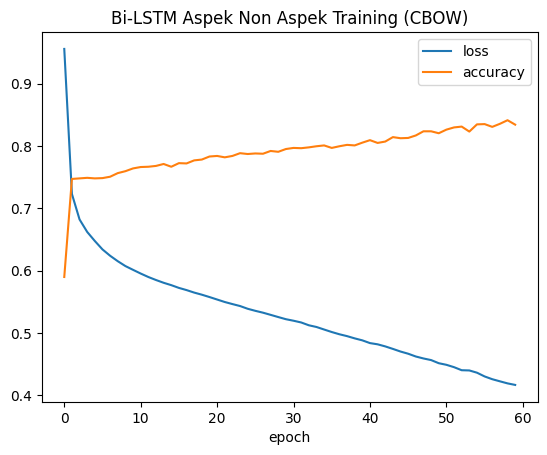

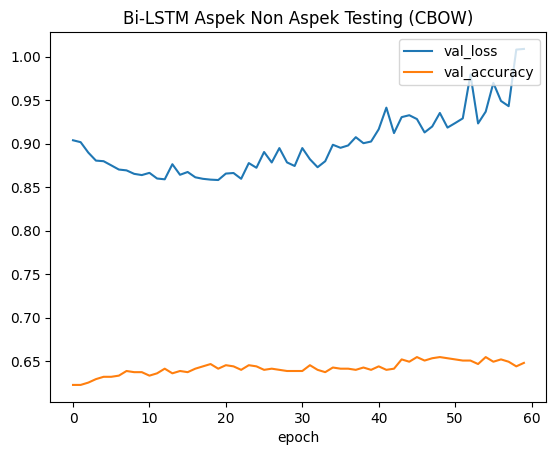

In [188]:
# Plot Training
plt.plot(history_nonaspek_cbow.history['loss'])
plt.plot(history_nonaspek_cbow.history['accuracy'])
plt.title('Bi-LSTM Aspek Non Aspek Training (CBOW)')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.show()

# Plot Testing
plt.plot(history_nonaspek_cbow.history['val_loss'])
plt.plot(history_nonaspek_cbow.history['val_accuracy'])
plt.title('Bi-LSTM Aspek Non Aspek Testing (CBOW)')
plt.xlabel('epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='upper right')
plt.show()

In [88]:
test_prediksi_nonaspek_cbow = model_bilstm_nonaspek_cbow.predict(X_test_CBOW)
test_valid_nonaspek_cbow = model_bilstm_nonaspek_cbow.predict(X_train_CBOW)

print('evaluation')
evaluation_nonaspek_cbow = model_bilstm_nonaspek_cbow.evaluate(X_test_CBOW, y_uji_non_aspek, batch_size=minibatch)

# evaluation_nonaspek_cbow
y_aktual_train_nonaspek_cbow = np.argmax(y_latih_non_aspek.to_numpy(), axis=1)
y_aktual_test_nonaspek_cbow = np.argmax(y_uji_non_aspek.to_numpy(), axis=1)
y_pred_train_nonaspek_cbow = np.argmax(test_valid_nonaspek_cbow, axis=1)
y_pred_test_nonaspek_cbow = np.argmax(test_prediksi_nonaspek_cbow, axis=1)

print("\n")
print("Confusion Matrix Test\n", pd.DataFrame(confusion_matrix(y_aktual_test_nonaspek_cbow,
                       y_pred_test_nonaspek_cbow,
                       labels=[0,1,2]), index = ["Non (Aktual)", "Pos (Aktual)", "Neg (Aktual)"],
                       columns = ["Non (Prediksi)", "Pos (Prediksi)", "Neg (Prediksi)"])
                       )

# print(test_prediksi_nonaspek_cbow[40])
# for i in test_prediksi_nonaspek_cbow:
#   print(i)
# for i in test_prediksi_nonaspek_cbow:
#   if np.argmax(i) == 0:
#     print("PREDIKSI : BUKAN SENTIMEN")
#   elif np.argmax(i) == 1:
#     print("PREDIKSI : POSITIF")
#   elif np.argmax(i) == 2:
#     print("PREDIKSI : NEGATIF")
# np.argmax(test_prediksi_nonaspek_cbow[98])

print(f"\nLaporan Klasifikasi Testing:\n{classification_report(y_aktual_test_nonaspek_cbow, y_pred_test_nonaspek_cbow)}")


71/71 [==============================] - 0s 6ms/step
evaluation
1/1 [==============================] - 0s 89ms/step - loss: 1.0160 - accuracy: 0.6453


Confusion Matrix Test
               Non (Prediksi)  Pos (Prediksi)  Neg (Prediksi)
Non (Aktual)             439               4              21
Pos (Aktual)              87               2               1
Neg (Aktual)             150               3              43

Laporan Klasifikasi Testing:
              precision    recall  f1-score   support

           0       0.65      0.95      0.77       464
           1       0.22      0.02      0.04        90
           2       0.66      0.22      0.33       196

    accuracy                           0.65       750
   macro avg       0.51      0.40      0.38       750
weighted avg       0.60      0.65      0.57       750



## **BiLSTM & Word2Vec dengan Data Seimbang**

**Pembagian data Training dan Testing**

In [191]:
# Nilai X Dengan Balance Data
X_baru = df_analisis_sentimen['Ulasan']
word_seq_all = word_seq_train + word_seq_test
X_balanced = pad_sequences(word_seq_all, maxlen=batas_panjang_kalimat)

# Nilai Y dengan Balance Data
Y_layanan_balanced = df_analisis_sentimen["Layanan"].loc[df_analisis_sentimen.index]
Y_fitur_balanced = df_analisis_sentimen["Fitur"].loc[df_analisis_sentimen.index]
Y_kebermanfaatan_balanced = df_analisis_sentimen["Kebermanfaatan"].loc[df_analisis_sentimen.index]
Y_bisnis_balanced = df_analisis_sentimen["Bisnis"].loc[df_analisis_sentimen.index]
Y_non_aspek_balanced = df_analisis_sentimen["Non Aspek"].loc[df_analisis_sentimen.index]

# @markdown Biarkan Default, Ubah Jika Diperlukan Saja.
random_state_num = 42 #@param {type:"integer"}
rasio_pengujian = 0.25 #@param {type:"number"}
undersampling_strategy = "auto" # @param ["auto", "majority", "not minority", "not majority", "all"]
oversampling_strategy = "auto" # @param ["auto", "minority", "not minority", "not majority", "all"]

### **BiLSTM & Word2Vec dengan Random Over Sampling (ROS)**

In [199]:
# Implementasi dengan ROS
ros = RandomOverSampler(random_state=random_state_num, sampling_strategy=oversampling_strategy)

# Resample X dan Y dengan Data Seimbang
X_layanan_ros, resample_y_layanan_ros = ros.fit_resample(X_balanced,Y_layanan_balanced)
X_fitur_ros, resample_y_fitur_ros = ros.fit_resample(X_balanced,Y_fitur_balanced)
X_manfaat_ros, resample_y_manfaat_ros = ros.fit_resample(X_balanced,Y_kebermanfaatan_balanced)
X_bisnis_ros, resample_y_bisnis_ros = ros.fit_resample(X_balanced,Y_bisnis_balanced)
X_non_aspek_ros, resample_y_non_aspek_ros = ros.fit_resample(X_balanced,Y_non_aspek_balanced)

Y_layanan_ros = pd.get_dummies(resample_y_layanan_ros)
Y_fitur_ros = pd.get_dummies(resample_y_fitur_ros)
Y_kebermanfaatan_ros = pd.get_dummies(resample_y_manfaat_ros)
Y_bisnis_ros = pd.get_dummies(resample_y_bisnis_ros)
Y_non_aspek_ros = pd.get_dummies(resample_y_non_aspek_ros)

# Split data test dan training
X_train_layanan_ros, X_test_layanan_ros, y_train_layanan_ros, y_test_layanan_ros = train_test_split(X_layanan_ros, Y_layanan_ros, test_size=rasio_pengujian, stratify=Y_layanan_ros, random_state=random_state_num)
X_train_fitur_ros, X_test_fitur_ros, y_train_fitur_ros, y_test_fitur_ros = train_test_split(X_fitur_ros, Y_fitur_ros, test_size=rasio_pengujian, stratify=Y_fitur_ros, random_state=random_state_num)
X_train_manfaat_ros, X_test_manfaat_ros, y_train_manfaat_ros, y_test_manfaat_ros = train_test_split(X_manfaat_ros, Y_kebermanfaatan_ros, test_size=rasio_pengujian, stratify=Y_kebermanfaatan_ros, random_state=random_state_num)
X_train_bisnis_ros, X_test_bisnis_ros, y_train_bisnis_ros, y_test_bisnis_ros = train_test_split(X_bisnis_ros, Y_bisnis_ros, test_size=rasio_pengujian, stratify=Y_bisnis_ros, random_state=random_state_num)
X_train_nonaspek_ros, X_test_nonaspek_ros, y_train_nonaspek_ros, y_test_nonaspek_ros = train_test_split(X_non_aspek_ros, Y_non_aspek_ros, test_size=rasio_pengujian, stratify=Y_non_aspek_ros, random_state=random_state_num)

#### **Layanan**

In [200]:
bilstm_layanan_ros = Sequential()
bilstm_layanan_ros.add(Embedding(jumlah_kata, #jumlah vocabulary
                             dimensi_embedding, # Dimensi dari dense embedding / output dim
                             input_length=batas_panjang_kalimat, # panjang input
                             weights=[embedding_matrix],
                             trainable=False))
bilstm_layanan_ros.add(Bidirectional(LSTM(hidden)))
bilstm_layanan_ros.add(Dense(3, activation='softmax'))
bilstm_layanan_ros.compile(loss='categorical_crossentropy',
                     optimizer=SGD(learning_rate=learning_rate),
                     metrics=['accuracy']
                     )

history_layanan_ros = bilstm_layanan_ros.fit(X_train_layanan_ros, y_train_layanan_ros, batch_size=minibatch,
           epochs=epoch,
           validation_data=(X_test_layanan_ros, y_test_layanan_ros))

print(bilstm_layanan_ros.summary())

Epoch 1/60
5/5 [==============================] - 4s 297ms/step - loss: 0.9825 - accuracy: 0.5162 - val_loss: 0.8779 - val_accuracy: 0.5981
Epoch 2/60
5/5 [==============================] - 0s 86ms/step - loss: 0.8401 - accuracy: 0.6167 - val_loss: 0.8065 - val_accuracy: 0.6345
Epoch 3/60
5/5 [==============================] - 0s 79ms/step - loss: 0.7788 - accuracy: 0.6427 - val_loss: 0.7650 - val_accuracy: 0.6522
Epoch 4/60
5/5 [==============================] - 0s 82ms/step - loss: 0.7368 - accuracy: 0.6705 - val_loss: 0.7305 - val_accuracy: 0.6698
Epoch 5/60
5/5 [==============================] - 0s 77ms/step - loss: 0.7030 - accuracy: 0.6921 - val_loss: 0.7016 - val_accuracy: 0.6792
Epoch 6/60
5/5 [==============================] - 0s 82ms/step - loss: 0.6728 - accuracy: 0.7062 - val_loss: 0.6756 - val_accuracy: 0.6974
Epoch 7/60
5/5 [==============================] - 0s 84ms/step - loss: 0.6455 - accuracy: 0.7222 - val_loss: 0.6515 - val_accuracy: 0.7062
Epoch 8/60
5/5 [==========

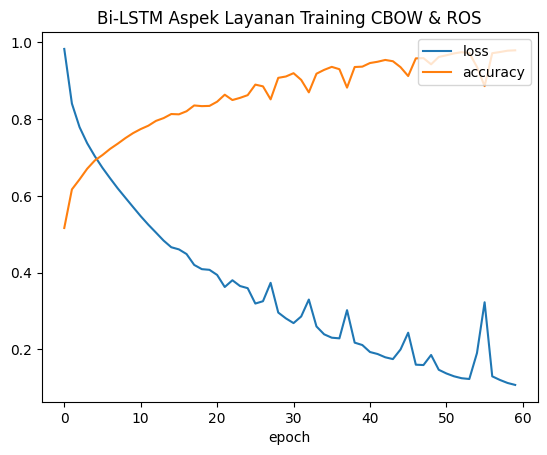

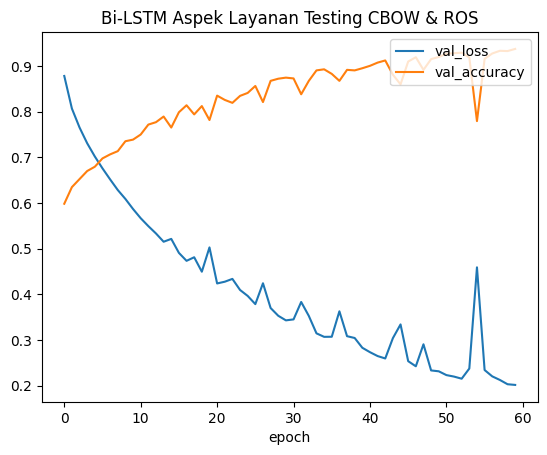

In [201]:
# Plot Training
plt.plot(history_layanan_ros.history['loss'])
plt.plot(history_layanan_ros.history['accuracy'])
plt.title('Bi-LSTM Aspek Layanan Training CBOW & ROS')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.show()

# Plot Testing
plt.plot(history_layanan_ros.history['val_loss'])
plt.plot(history_layanan_ros.history['val_accuracy'])
plt.title('Bi-LSTM Aspek Layanan Testing CBOW & ROS')
plt.xlabel('epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='upper right')
plt.show()

In [202]:
test_pred_layanan_ros = bilstm_layanan_ros.predict(X_test_layanan_ros)
test_val_layanan_ros = bilstm_layanan_ros.predict(X_train_layanan_ros)

print('evaluation')
evaluation_layanan_ros = bilstm_layanan_ros.evaluate(X_test_layanan_ros, y_test_layanan_ros, batch_size=minibatch)
y_aktual_train_layanan_ros = np.argmax(y_train_layanan_ros.to_numpy(), axis=1)
y_aktual_test_layanan_ros = np.argmax(y_test_layanan_ros.to_numpy(), axis=1)
y_pred_train_layanan_ros = np.argmax(test_val_layanan_ros, axis=1)
y_pred_test_layanan_ros = np.argmax(test_pred_layanan_ros, axis=1)

print("\n")
print("Confusion Matrix Test\n", pd.DataFrame(confusion_matrix(y_aktual_test_layanan_ros,
                       y_pred_test_layanan_ros,
                       labels=[0,1,2]), index = ["Non (Aktual)", "Pos (Aktual)", "Neg (Aktual)"],
                       columns = ["Non (Prediksi)", "Pos (Prediksi)", "Neg (Prediksi)"])
                       )

# print(test_prediksi[40])
# for i in test_prediksi_layanan_ros:
#   print(i)
# for i in test_prediksi_layanan_ros:
#   if np.argmax(i) == 0:
#     print("PREDIKSI : BUKAN SENTIMEN")
#   elif np.argmax(i) == 1:
#     print("PREDIKSI : POSITIF")
#   elif np.argmax(i) == 2:
#     print("PREDIKSI : NEGATIF")
# np.argmax(test_prediksi_layanan_ros[98])

print(f"\nLaporan Klasifikasi Testing:\n{classification_report(y_aktual_test_layanan_ros, y_pred_test_layanan_ros)}")

160/160 [==============================] - 1s 4ms/step
evaluation
2/2 [==============================] - 0s 21ms/step - loss: 0.2014 - accuracy: 0.9371


Confusion Matrix Test
               Non (Prediksi)  Pos (Prediksi)  Neg (Prediksi)
Non (Aktual)             488              30              50
Pos (Aktual)               6             561               0
Neg (Aktual)              19               2             546

Laporan Klasifikasi Testing:
              precision    recall  f1-score   support

           0       0.95      0.86      0.90       568
           1       0.95      0.99      0.97       567
           2       0.92      0.96      0.94       567

    accuracy                           0.94      1702
   macro avg       0.94      0.94      0.94      1702
weighted avg       0.94      0.94      0.94      1702



#### **Fitur**

In [203]:
bilstm_fitur_ros = Sequential()
bilstm_fitur_ros.add(Embedding(jumlah_kata, #jumlah vocabulary
                             dimensi_embedding, # Dimensi dari dense embedding / output dim
                             input_length=batas_panjang_kalimat, # panjang input
                             weights=[embedding_matrix],
                             trainable=False))
bilstm_fitur_ros.add(Bidirectional(LSTM(hidden)))
bilstm_fitur_ros.add(Dense(3, activation='softmax'))
bilstm_fitur_ros.compile(loss='categorical_crossentropy',
                     optimizer=SGD(learning_rate=learning_rate),
                     metrics=['accuracy']
                     )

history_fitur_ros = bilstm_fitur_ros.fit(X_train_fitur_ros, y_train_fitur_ros, batch_size=minibatch,
           epochs=epoch,
           validation_data=(X_test_fitur_ros, y_test_fitur_ros))

print(bilstm_fitur_ros.summary())

Epoch 1/60
5/5 [==============================] - 11s 425ms/step - loss: 1.0459 - accuracy: 0.4528 - val_loss: 0.9626 - val_accuracy: 0.5512
Epoch 2/60
5/5 [==============================] - 0s 85ms/step - loss: 0.9337 - accuracy: 0.5685 - val_loss: 0.9030 - val_accuracy: 0.5807
Epoch 3/60
5/5 [==============================] - 0s 84ms/step - loss: 0.8842 - accuracy: 0.5941 - val_loss: 0.8698 - val_accuracy: 0.5907
Epoch 4/60
5/5 [==============================] - 0s 83ms/step - loss: 0.8525 - accuracy: 0.6100 - val_loss: 0.8445 - val_accuracy: 0.5945
Epoch 5/60
5/5 [==============================] - 0s 92ms/step - loss: 0.8265 - accuracy: 0.6177 - val_loss: 0.8240 - val_accuracy: 0.6121
Epoch 6/60
5/5 [==============================] - 0s 85ms/step - loss: 0.8037 - accuracy: 0.6330 - val_loss: 0.8052 - val_accuracy: 0.6164
Epoch 7/60
5/5 [==============================] - 0s 80ms/step - loss: 0.7827 - accuracy: 0.6445 - val_loss: 0.7876 - val_accuracy: 0.6309
Epoch 8/60
5/5 [=========

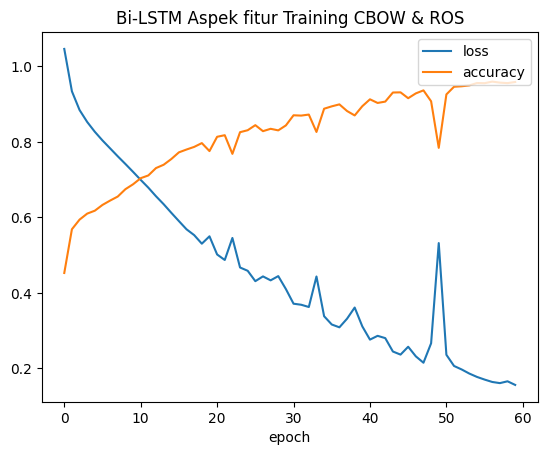

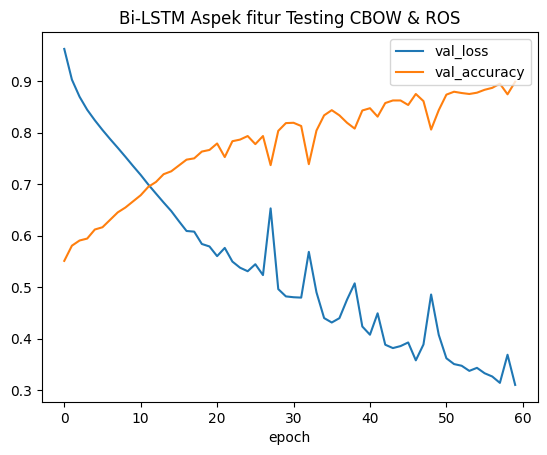

In [204]:
# Plot Training
plt.plot(history_fitur_ros.history['loss'])
plt.plot(history_fitur_ros.history['accuracy'])
plt.title('Bi-LSTM Aspek fitur Training CBOW & ROS')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.show()

# Plot Testing
plt.plot(history_fitur_ros.history['val_loss'])
plt.plot(history_fitur_ros.history['val_accuracy'])
plt.title('Bi-LSTM Aspek fitur Testing CBOW & ROS')
plt.xlabel('epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='upper right')
plt.show()

In [205]:
test_pred_fitur_ros = bilstm_fitur_ros.predict(X_test_fitur_ros)
test_val_fitur_ros = bilstm_fitur_ros.predict(X_train_fitur_ros)

print('evaluation')
evaluation_fitur_ros = bilstm_fitur_ros.evaluate(X_test_fitur_ros, y_test_fitur_ros, batch_size=minibatch)

y_aktual_train_fitur_ros = np.argmax(y_train_fitur_ros.to_numpy(), axis=1)
y_aktual_test_fitur_ros = np.argmax(y_test_fitur_ros.to_numpy(), axis=1)
y_pred_train_fitur_ros = np.argmax(test_val_fitur_ros, axis=1)
y_pred_test_fitur_ros = np.argmax(test_pred_fitur_ros, axis=1)

print("\n")
print("Confusion Matrix Test\n", pd.DataFrame(confusion_matrix(y_aktual_test_fitur_ros,
                       y_pred_test_fitur_ros,
                       labels=[0,1,2]), index = ["Non (Aktual)", "Pos (Aktual)", "Neg (Aktual)"],
                       columns = ["Non (Prediksi)", "Pos (Prediksi)", "Neg (Prediksi)"])
                       )

# print(test_prediksi[40])
# for i in test_prediksi_fitur_ros:
#   print(i)
# for i in test_prediksi_fitur_ros:
#   if np.argmax(i) == 0:
#     print("PREDIKSI : BUKAN SENTIMEN")
#   elif np.argmax(i) == 1:
#     print("PREDIKSI : POSITIF")
#   elif np.argmax(i) == 2:
#     print("PREDIKSI : NEGATIF")
# np.argmax(test_prediksi_fitur_ros[98])

print(f"\nLaporan Klasifikasi Testing:\n{classification_report(y_aktual_test_fitur_ros, y_pred_test_fitur_ros)}")

150/150 [==============================] - 1s 6ms/step
evaluation
2/2 [==============================] - 0s 23ms/step - loss: 0.3104 - accuracy: 0.8989


Confusion Matrix Test
               Non (Prediksi)  Pos (Prediksi)  Neg (Prediksi)
Non (Aktual)             414              39              78
Pos (Aktual)              21             509               1
Neg (Aktual)              21               1             509

Laporan Klasifikasi Testing:
              precision    recall  f1-score   support

           0       0.91      0.78      0.84       531
           1       0.93      0.96      0.94       531
           2       0.87      0.96      0.91       531

    accuracy                           0.90      1593
   macro avg       0.90      0.90      0.90      1593
weighted avg       0.90      0.90      0.90      1593



#### **Kebermanfaatan**

In [206]:
bilstm_manfaat_ros = Sequential()
bilstm_manfaat_ros.add(Embedding(jumlah_kata, #jumlah vocabulary
                             dimensi_embedding, # Dimensi dari dense embedding / output dim
                             input_length=batas_panjang_kalimat, # panjang input
                             weights=[embedding_matrix],
                             trainable=False))
bilstm_manfaat_ros.add(Bidirectional(LSTM(hidden)))
bilstm_manfaat_ros.add(Dense(3, activation='softmax'))
bilstm_manfaat_ros.compile(loss='categorical_crossentropy',
                     optimizer=SGD(learning_rate=learning_rate),
                     metrics=['accuracy']
                     )

history_manfaat_ros = bilstm_manfaat_ros.fit(X_train_manfaat_ros, y_train_manfaat_ros, batch_size=minibatch,
           epochs=epoch,
           validation_data=(X_test_manfaat_ros, y_test_manfaat_ros))

print(bilstm_manfaat_ros.summary())

Epoch 1/60
6/6 [==============================] - 8s 305ms/step - loss: 0.9496 - accuracy: 0.5781 - val_loss: 0.7747 - val_accuracy: 0.6806
Epoch 2/60
6/6 [==============================] - 0s 75ms/step - loss: 0.7153 - accuracy: 0.7223 - val_loss: 0.6427 - val_accuracy: 0.7533
Epoch 3/60
6/6 [==============================] - 0s 71ms/step - loss: 0.6004 - accuracy: 0.7728 - val_loss: 0.5572 - val_accuracy: 0.7906
Epoch 4/60
6/6 [==============================] - 0s 72ms/step - loss: 0.5191 - accuracy: 0.8216 - val_loss: 0.4957 - val_accuracy: 0.8150
Epoch 5/60
6/6 [==============================] - 0s 74ms/step - loss: 0.4566 - accuracy: 0.8477 - val_loss: 0.4482 - val_accuracy: 0.8267
Epoch 6/60
6/6 [==============================] - 0s 75ms/step - loss: 0.4074 - accuracy: 0.8592 - val_loss: 0.4103 - val_accuracy: 0.8383
Epoch 7/60
6/6 [==============================] - 0s 73ms/step - loss: 0.3685 - accuracy: 0.8701 - val_loss: 0.3810 - val_accuracy: 0.8450
Epoch 8/60
6/6 [==========

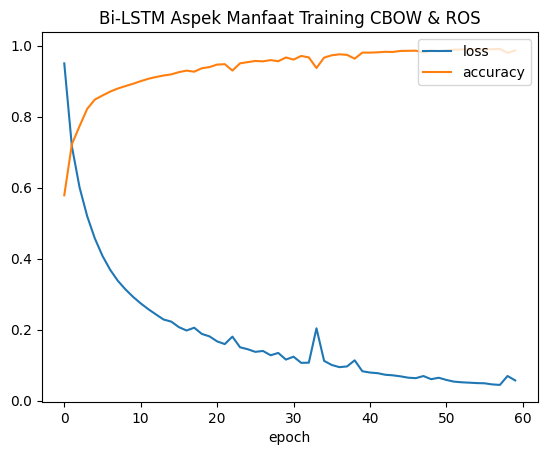

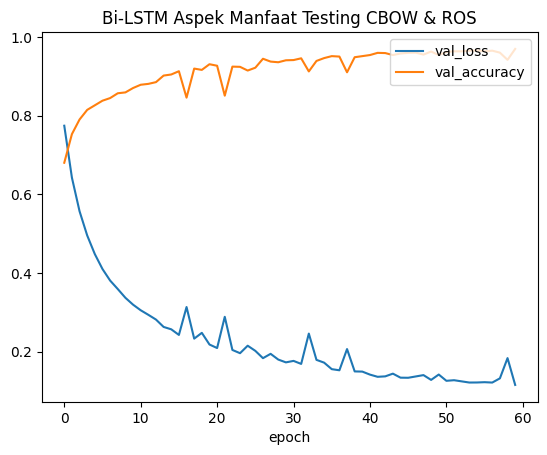

In [207]:
# Plot Training
plt.plot(history_manfaat_ros.history['loss'])
plt.plot(history_manfaat_ros.history['accuracy'])
plt.title('Bi-LSTM Aspek Manfaat Training CBOW & ROS')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.show()

# Plot Testing
plt.plot(history_manfaat_ros.history['val_loss'])
plt.plot(history_manfaat_ros.history['val_accuracy'])
plt.title('Bi-LSTM Aspek Manfaat Testing CBOW & ROS')
plt.xlabel('epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='upper right')
plt.show()

In [208]:
test_pred_manfaat_ros = bilstm_manfaat_ros.predict(X_test_manfaat_ros)
test_val_manfaat_ros = bilstm_manfaat_ros.predict(X_train_manfaat_ros)

print('evaluation')
evaluation_manfaat_cbow = bilstm_manfaat_ros.evaluate(X_test_manfaat_ros, y_test_manfaat_ros, batch_size=minibatch)
y_aktual_train_manfaat_ros = np.argmax(y_train_manfaat_ros.to_numpy(), axis=1)
y_aktual_test_manfaat_ros = np.argmax(y_test_manfaat_ros.to_numpy(), axis=1)
y_pred_train_manfaat_ros = np.argmax(test_val_manfaat_ros, axis=1)
y_pred_test_manfaat_ros = np.argmax(test_pred_manfaat_ros, axis=1)

print("\n")
print("Confusion Matrix Test\n", pd.DataFrame(confusion_matrix(y_aktual_test_manfaat_ros,
                       y_pred_test_manfaat_ros,
                       labels=[0,1,2]), index = ["Non (Aktual)", "Pos (Aktual)", "Neg (Aktual)"],
                       columns = ["Non (Prediksi)", "Pos (Prediksi)", "Neg (Prediksi)"])
                       )

# print(test_prediksi[40])
# for i in test_pred_manfaat_ros:
#   print(i)
# for i in test_pred_manfaat_ros:
#   if np.argmax(i) == 0:
#     print("PREDIKSI : BUKAN SENTIMEN")
#   elif np.argmax(i) == 1:
#     print("PREDIKSI : POSITIF")
#   elif np.argmax(i) == 2:
#     print("PREDIKSI : NEGATIF")
# np.argmax(test_pred_manfaat_ros[98])

print(f"\nLaporan Klasifikasi Testing:\n{classification_report(y_aktual_test_manfaat_ros, y_pred_test_manfaat_ros)}")

169/169 [==============================] - 1s 4ms/step
evaluation
2/2 [==============================] - 0s 23ms/step - loss: 0.1156 - accuracy: 0.9700


Confusion Matrix Test
               Non (Prediksi)  Pos (Prediksi)  Neg (Prediksi)
Non (Aktual)             556              34              10
Pos (Aktual)              10             590               0
Neg (Aktual)               0               0             600

Laporan Klasifikasi Testing:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95       600
           1       0.95      0.98      0.96       600
           2       0.98      1.00      0.99       600

    accuracy                           0.97      1800
   macro avg       0.97      0.97      0.97      1800
weighted avg       0.97      0.97      0.97      1800



#### **Bisnis**

In [209]:
bilstm_bisnis_ros = Sequential()
bilstm_bisnis_ros.add(Embedding(jumlah_kata, #jumlah vocabulary
                             dimensi_embedding, # Dimensi dari dense embedding / output dim
                             input_length=batas_panjang_kalimat, # panjang input
                             weights=[embedding_matrix],
                             trainable=False))
bilstm_bisnis_ros.add(Bidirectional(LSTM(hidden)))
bilstm_bisnis_ros.add(Dense(3, activation='softmax'))
bilstm_bisnis_ros.compile(loss='categorical_crossentropy',
                     optimizer=SGD(learning_rate=learning_rate),
                     metrics=['accuracy']
                     )

history_bisnis_ros = bilstm_bisnis_ros.fit(X_train_bisnis_ros, y_train_bisnis_ros, batch_size=minibatch,
           epochs=epoch,
           validation_data=(X_test_bisnis_ros, y_test_bisnis_ros))

print(bilstm_bisnis_ros.summary())

Epoch 1/60
5/5 [==============================] - 4s 261ms/step - loss: 1.0411 - accuracy: 0.4606 - val_loss: 0.9358 - val_accuracy: 0.5576
Epoch 2/60
5/5 [==============================] - 0s 69ms/step - loss: 0.8807 - accuracy: 0.6041 - val_loss: 0.8610 - val_accuracy: 0.5976
Epoch 3/60
5/5 [==============================] - 0s 72ms/step - loss: 0.8074 - accuracy: 0.6441 - val_loss: 0.8137 - val_accuracy: 0.6165
Epoch 4/60
5/5 [==============================] - 0s 68ms/step - loss: 0.7570 - accuracy: 0.6703 - val_loss: 0.7806 - val_accuracy: 0.6409
Epoch 5/60
5/5 [==============================] - 0s 68ms/step - loss: 0.7185 - accuracy: 0.6888 - val_loss: 0.7549 - val_accuracy: 0.6558
Epoch 6/60
5/5 [==============================] - 0s 69ms/step - loss: 0.6860 - accuracy: 0.7085 - val_loss: 0.7307 - val_accuracy: 0.6673
Epoch 7/60
5/5 [==============================] - 0s 76ms/step - loss: 0.6574 - accuracy: 0.7173 - val_loss: 0.7090 - val_accuracy: 0.6816
Epoch 8/60
5/5 [==========

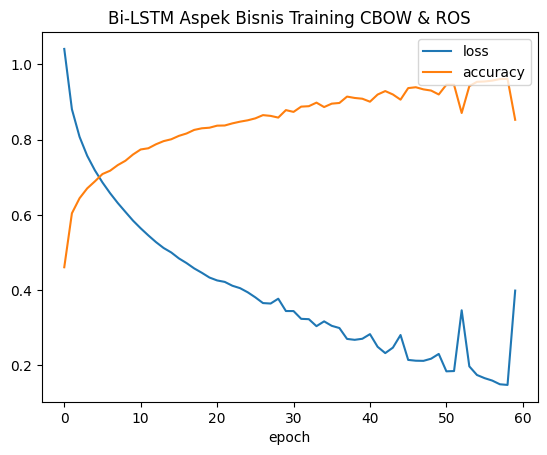

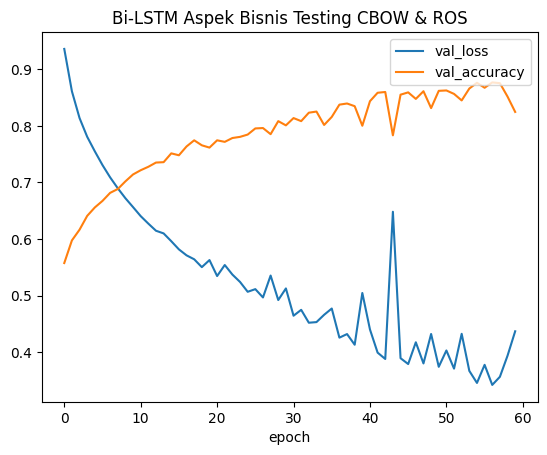

In [210]:
# Plot Training
plt.plot(history_bisnis_ros.history['loss'])
plt.plot(history_bisnis_ros.history['accuracy'])
plt.title('Bi-LSTM Aspek Bisnis Training CBOW & ROS')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.show()

# Plot Testing
plt.plot(history_bisnis_ros.history['val_loss'])
plt.plot(history_bisnis_ros.history['val_accuracy'])
plt.title('Bi-LSTM Aspek Bisnis Testing CBOW & ROS')
plt.xlabel('epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='upper right')
plt.show()

In [211]:
test_pred_bisnis_ros = bilstm_bisnis_ros.predict(X_test_bisnis_ros)
test_val_bisnis_ros = bilstm_bisnis_ros.predict(X_train_bisnis_ros)

print('evaluation')
evaluation_bisnis_ros = bilstm_bisnis_ros.evaluate(X_test_bisnis_ros, y_test_bisnis_ros, batch_size=minibatch)
y_aktual_train_bisnis_ros = np.argmax(y_train_bisnis_ros.to_numpy(), axis=1)
y_aktual_test_bisnis_ros = np.argmax(y_test_bisnis_ros.to_numpy(), axis=1)
y_pred_train_bisnis_ros = np.argmax(test_val_bisnis_ros, axis=1)
y_pred_test_bisnis_ros = np.argmax(test_pred_bisnis_ros, axis=1)

print("\n")
print("Confusion Matrix Test\n", pd.DataFrame(confusion_matrix(y_aktual_test_bisnis_ros,
                       y_pred_test_bisnis_ros,
                       labels=[0,1,2]), index = ["Non (Aktual)", "Pos (Aktual)", "Neg (Aktual)"],
                       columns = ["Non (Prediksi)", "Pos (Prediksi)", "Neg (Prediksi)"])
                       )

# print(test_prediksi[40])
# for i in test_prediksi_bisnis_ros:
#   print(i)
# for i in test_prediksi_bisnis_ros:
#   if np.argmax(i) == 0:
#     print("PREDIKSI : BUKAN SENTIMEN")
#   elif np.argmax(i) == 1:
#     print("PREDIKSI : POSITIF")
#   elif np.argmax(i) == 2:
#     print("PREDIKSI : NEGATIF")
# np.argmax(test_prediksi_bisnis_ros[98])

print(f"Laporan Klasifikasi Testing:\n{classification_report(y_aktual_test_bisnis_ros, y_pred_test_bisnis_ros)}")

139/139 [==============================] - 1s 4ms/step
evaluation
2/2 [==============================] - 0s 21ms/step - loss: 0.4370 - accuracy: 0.8245


Confusion Matrix Test
               Non (Prediksi)  Pos (Prediksi)  Neg (Prediksi)
Non (Aktual)             398              20              74
Pos (Aktual)             130             358               4
Neg (Aktual)              29               2             461
Laporan Klasifikasi Testing:
              precision    recall  f1-score   support

           0       0.71      0.81      0.76       492
           1       0.94      0.73      0.82       492
           2       0.86      0.94      0.89       492

    accuracy                           0.82      1476
   macro avg       0.84      0.82      0.82      1476
weighted avg       0.84      0.82      0.82      1476



#### **Non Aspek**

In [212]:
bilstm_non_aspek_ros = Sequential()
bilstm_non_aspek_ros.add(Embedding(jumlah_kata, #jumlah vocabulary
                             dimensi_embedding, # Dimensi dari dense embedding / output dim
                             input_length=batas_panjang_kalimat, # panjang input
                             weights=[embedding_matrix],
                             trainable=False))
bilstm_non_aspek_ros.add(Bidirectional(LSTM(hidden)))
bilstm_non_aspek_ros.add(Dense(3, activation='softmax'))
bilstm_non_aspek_ros.compile(loss='categorical_crossentropy',
                     optimizer=SGD(learning_rate=learning_rate),
                     metrics=['accuracy']
                     )

history_non_aspek_ros = bilstm_non_aspek_ros.fit(X_train_nonaspek_ros, y_train_nonaspek_ros, batch_size=minibatch,
           epochs=epoch,
           validation_data=(X_test_nonaspek_ros, y_test_nonaspek_ros))

print(bilstm_non_aspek_ros.summary())

Epoch 1/60
5/5 [==============================] - 6s 366ms/step - loss: 1.0804 - accuracy: 0.3841 - val_loss: 1.0047 - val_accuracy: 0.4956
Epoch 2/60
5/5 [==============================] - 0s 81ms/step - loss: 0.9778 - accuracy: 0.5226 - val_loss: 0.9545 - val_accuracy: 0.5336
Epoch 3/60
5/5 [==============================] - 0s 86ms/step - loss: 0.9333 - accuracy: 0.5537 - val_loss: 0.9271 - val_accuracy: 0.5466
Epoch 4/60
5/5 [==============================] - 0s 89ms/step - loss: 0.9050 - accuracy: 0.5690 - val_loss: 0.9069 - val_accuracy: 0.5591
Epoch 5/60
5/5 [==============================] - 0s 88ms/step - loss: 0.8831 - accuracy: 0.5846 - val_loss: 0.8899 - val_accuracy: 0.5634
Epoch 6/60
5/5 [==============================] - 0s 78ms/step - loss: 0.8638 - accuracy: 0.5968 - val_loss: 0.8746 - val_accuracy: 0.5771
Epoch 7/60
5/5 [==============================] - 0s 75ms/step - loss: 0.8462 - accuracy: 0.6097 - val_loss: 0.8603 - val_accuracy: 0.5877
Epoch 8/60
5/5 [==========

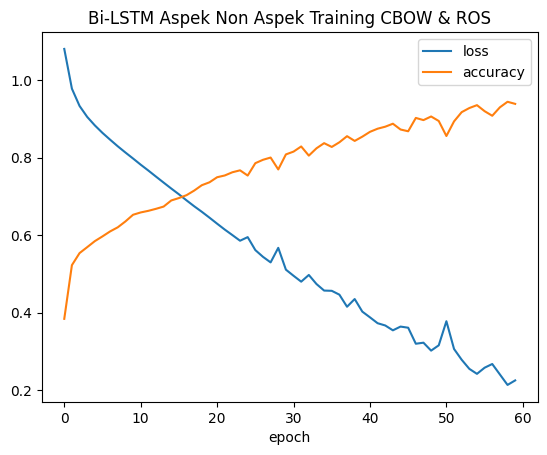

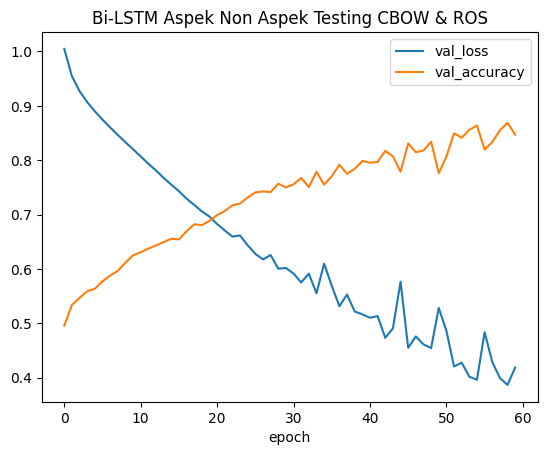

In [213]:
# Plot Training
plt.plot(history_non_aspek_ros.history['loss'])
plt.plot(history_non_aspek_ros.history['accuracy'])
plt.title('Bi-LSTM Aspek Non Aspek Training CBOW & ROS')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.show()

# Plot Testing
plt.plot(history_non_aspek_ros.history['val_loss'])
plt.plot(history_non_aspek_ros.history['val_accuracy'])
plt.title('Bi-LSTM Aspek Non Aspek Testing CBOW & ROS')
plt.xlabel('epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='upper right')
plt.show()

In [214]:
test_pred_nonaspek_ros = bilstm_non_aspek_ros.predict(X_test_nonaspek_ros)
test_val_nonaspek_ros = bilstm_non_aspek_ros.predict(X_train_nonaspek_ros)

print('evaluation')
evaluation_nonaspek_ros = bilstm_non_aspek_ros.evaluate(X_test_nonaspek_ros, y_test_nonaspek_ros, batch_size=minibatch)
y_aktual_train_nonaspek_ros = np.argmax(y_train_nonaspek_ros.to_numpy(), axis=1)
y_aktual_test_nonaspek_ros = np.argmax(y_test_nonaspek_ros.to_numpy(), axis=1)
y_pred_train_nonaspek_ros = np.argmax(test_val_nonaspek_ros, axis=1)
y_pred_test_nonaspek_ros = np.argmax(test_pred_nonaspek_ros, axis=1)

print("\n")
print("Confusion Matrix Test\n", pd.DataFrame(confusion_matrix(y_aktual_test_nonaspek_ros,
                       y_pred_test_nonaspek_ros,
                       labels=[0,1,2]), index = ["Non (Aktual)", "Pos (Aktual)", "Neg (Aktual)"],
                       columns = ["Non (Prediksi)", "Pos (Prediksi)", "Neg (Prediksi)"])
                       )

# print(test_prediksi[40])
# for i in test_prediksi_layanan_ros:
#   print(i)
# for i in test_prediksi_layanan_ros:
#   if np.argmax(i) == 0:
#     print("PREDIKSI : BUKAN SENTIMEN")
#   elif np.argmax(i) == 1:
#     print("PREDIKSI : POSITIF")
#   elif np.argmax(i) == 2:
#     print("PREDIKSI : NEGATIF")
# np.argmax(test_prediksi_layanan_ros[98])

print(f"\nLaporan Klasifikasi Testing:\n{classification_report(y_aktual_test_nonaspek_ros, y_pred_test_nonaspek_ros)}")

151/151 [==============================] - 1s 5ms/step
evaluation
2/2 [==============================] - 0s 29ms/step - loss: 0.4185 - accuracy: 0.8470


Confusion Matrix Test
               Non (Prediksi)  Pos (Prediksi)  Neg (Prediksi)
Non (Aktual)             322             168              46
Pos (Aktual)              12             523               1
Neg (Aktual)              10               9             517

Laporan Klasifikasi Testing:
              precision    recall  f1-score   support

           0       0.94      0.60      0.73       536
           1       0.75      0.98      0.85       536
           2       0.92      0.96      0.94       536

    accuracy                           0.85      1608
   macro avg       0.87      0.85      0.84      1608
weighted avg       0.87      0.85      0.84      1608



### **BiLSTM & Word2Vec dengan Random Under Sampling (RUS)**

In [215]:
# Implementasi dengan RUS
rus = RandomUnderSampler(random_state=random_state_num, sampling_strategy=undersampling_strategy)

# Resample X dan Y dengan Data Seimbang
X_layanan_rus, resample_y_layanan_rus = rus.fit_resample(X_balanced,Y_layanan_balanced)
X_fitur_rus, resample_y_fitur_rus = rus.fit_resample(X_balanced,Y_fitur_balanced)
X_manfaat_rus, resample_y_manfaat_rus = rus.fit_resample(X_balanced,Y_kebermanfaatan_balanced)
X_bisnis_rus, resample_y_bisnis_rus = rus.fit_resample(X_balanced,Y_bisnis_balanced)
X_non_aspek_rus, resample_y_non_aspek_rus = rus.fit_resample(X_balanced,Y_non_aspek_balanced)

Y_layanan_rus = pd.get_dummies(resample_y_layanan_rus)
Y_fitur_rus = pd.get_dummies(resample_y_fitur_rus)
Y_kebermanfaatan_rus = pd.get_dummies(resample_y_manfaat_rus)
Y_bisnis_rus = pd.get_dummies(resample_y_bisnis_rus)
Y_non_aspek_rus = pd.get_dummies(resample_y_non_aspek_rus)

# Split data test dan training
X_train_layanan_rus, X_test_layanan_rus, y_train_layanan_rus, y_test_layanan_rus = train_test_split(X_layanan_rus, Y_layanan_rus, test_size=rasio_pengujian, stratify=Y_layanan_rus, random_state=random_state_num)
X_train_fitur_rus, X_test_fitur_rus, y_train_fitur_rus, y_test_fitur_rus = train_test_split(X_fitur_rus, Y_fitur_rus, test_size=rasio_pengujian, stratify=Y_fitur_rus, random_state=random_state_num)
X_train_manfaat_rus, X_test_manfaat_rus, y_train_manfaat_rus, y_test_manfaat_rus = train_test_split(X_manfaat_rus, Y_kebermanfaatan_rus, test_size=rasio_pengujian, stratify=Y_kebermanfaatan_rus, random_state=random_state_num)
X_train_bisnis_rus, X_test_bisnis_rus, y_train_bisnis_rus, y_test_bisnis_rus = train_test_split(X_bisnis_rus, Y_bisnis_rus, test_size=rasio_pengujian, stratify=Y_bisnis_rus, random_state=random_state_num)
X_train_nonaspek_rus, X_test_nonaspek_rus, y_train_nonaspek_rus, y_test_nonaspek_rus = train_test_split(X_non_aspek_rus, Y_non_aspek_rus, test_size=rasio_pengujian, stratify=Y_non_aspek_rus, random_state=random_state_num)

#### **Layanan**

In [216]:
bilstm_layanan_rus = Sequential()
bilstm_layanan_rus.add(Embedding(jumlah_kata, #jumlah vocabulary
                             dimensi_embedding, # Dimensi dari dense embedding / output dim
                             input_length=batas_panjang_kalimat, # panjang input
                             weights=[embedding_matrix],
                             trainable=False))
bilstm_layanan_rus.add(Bidirectional(LSTM(hidden)))
bilstm_layanan_rus.add(Dense(3, activation='softmax'))
bilstm_layanan_rus.compile(loss='categorical_crossentropy',
                     optimizer=SGD(learning_rate=learning_rate),
                     metrics=['accuracy']
                     )

history_layanan_rus = bilstm_layanan_rus.fit(X_train_layanan_rus, y_train_layanan_rus, batch_size=minibatch,
           epochs=epoch,
           validation_data=(X_test_layanan_rus, y_test_layanan_rus))

print(bilstm_layanan_rus.summary())

Epoch 1/60
1/1 [==============================] - 4s 4s/step - loss: 1.1240 - accuracy: 0.3240 - val_loss: 1.0552 - val_accuracy: 0.4398
Epoch 2/60
1/1 [==============================] - 0s 113ms/step - loss: 1.0549 - accuracy: 0.4527 - val_loss: 1.0101 - val_accuracy: 0.5139
Epoch 3/60
1/1 [==============================] - 0s 102ms/step - loss: 1.0030 - accuracy: 0.5163 - val_loss: 0.9752 - val_accuracy: 0.5509
Epoch 4/60
1/1 [==============================] - 0s 104ms/step - loss: 0.9620 - accuracy: 0.5736 - val_loss: 0.9474 - val_accuracy: 0.5741
Epoch 5/60
1/1 [==============================] - 0s 103ms/step - loss: 0.9285 - accuracy: 0.5891 - val_loss: 0.9247 - val_accuracy: 0.5787
Epoch 6/60
1/1 [==============================] - 0s 103ms/step - loss: 0.9003 - accuracy: 0.6062 - val_loss: 0.9057 - val_accuracy: 0.5880
Epoch 7/60
1/1 [==============================] - 0s 140ms/step - loss: 0.8760 - accuracy: 0.6202 - val_loss: 0.8897 - val_accuracy: 0.6065
Epoch 8/60
1/1 [=======

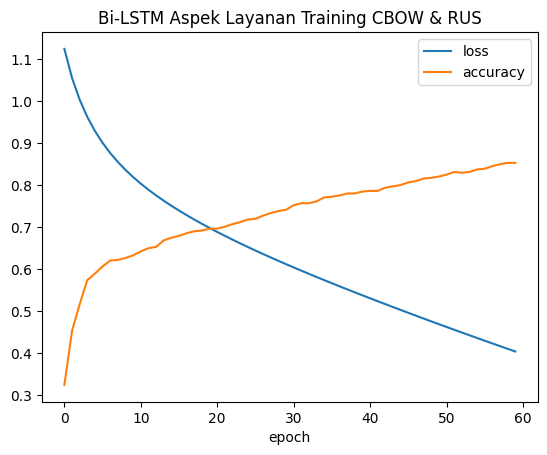

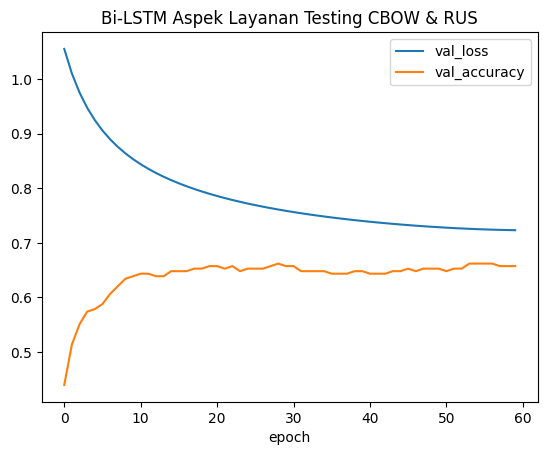

In [217]:
# Plot Training
plt.plot(history_layanan_rus.history['loss'])
plt.plot(history_layanan_rus.history['accuracy'])
plt.title('Bi-LSTM Aspek Layanan Training CBOW & RUS')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.show()

# Plot Testing
plt.plot(history_layanan_rus.history['val_loss'])
plt.plot(history_layanan_rus.history['val_accuracy'])
plt.title('Bi-LSTM Aspek Layanan Testing CBOW & RUS')
plt.xlabel('epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='upper right')
plt.show()

In [218]:
test_pred_layanan_rus = bilstm_layanan_rus.predict(X_test_layanan_rus)
test_val_layanan_rus = bilstm_layanan_rus.predict(X_train_layanan_rus)

print('evaluation')
evaluation_layanan_rus = bilstm_layanan_rus.evaluate(X_test_layanan_rus, y_test_layanan_rus, batch_size=minibatch)
y_aktual_train_layanan_rus = np.argmax(y_train_layanan_rus.to_numpy(), axis=1)
y_aktual_test_layanan_rus = np.argmax(y_test_layanan_rus.to_numpy(), axis=1)
y_pred_train_layanan_rus = np.argmax(test_val_layanan_rus, axis=1)
y_pred_test_layanan_rus = np.argmax(test_pred_layanan_rus, axis=1)

print("\n")
print("Confusion Matrix Test\n", pd.DataFrame(confusion_matrix(y_aktual_test_layanan_rus,
                       y_pred_test_layanan_rus,
                       labels=[0,1,2]), index = ["Non (Aktual)", "Pos (Aktual)", "Neg (Aktual)"],
                       columns = ["Non (Prediksi)", "Pos (Prediksi)", "Neg (Prediksi)"])
                       )

# print(test_prediksi[40])
# for i in test_prediksi_layanan_rus:
#   print(i)
# for i in test_prediksi_layanan_rus:
#   if np.argmax(i) == 0:
#     print("PREDIKSI : BUKAN SENTIMEN")
#   elif np.argmax(i) == 1:
#     print("PREDIKSI : POSITIF")
#   elif np.argmax(i) == 2:
#     print("PREDIKSI : NEGATIF")
# np.argmax(test_prediksi_layanan_rus[98])

print(f"\nLaporan Klasifikasi Testing:\n{classification_report(y_aktual_test_layanan_rus, y_pred_test_layanan_rus)}")

21/21 [==============================] - 0s 4ms/step
evaluation
1/1 [==============================] - 0s 38ms/step - loss: 0.7232 - accuracy: 0.6574


Confusion Matrix Test
               Non (Prediksi)  Pos (Prediksi)  Neg (Prediksi)
Non (Aktual)              38              16              18
Pos (Aktual)              18              48               6
Neg (Aktual)               6              10              56

Laporan Klasifikasi Testing:
              precision    recall  f1-score   support

           0       0.61      0.53      0.57        72
           1       0.65      0.67      0.66        72
           2       0.70      0.78      0.74        72

    accuracy                           0.66       216
   macro avg       0.65      0.66      0.65       216
weighted avg       0.65      0.66      0.65       216



#### **Fitur**

In [219]:
bilstm_fitur_rus = Sequential()
bilstm_fitur_rus.add(Embedding(jumlah_kata, #jumlah vocabulary
                             dimensi_embedding, # Dimensi dari dense embedding / output dim
                             input_length=batas_panjang_kalimat, # panjang input
                             weights=[embedding_matrix],
                             trainable=False))
bilstm_fitur_rus.add(Bidirectional(LSTM(hidden)))
bilstm_fitur_rus.add(Dense(3, activation='softmax'))
bilstm_fitur_rus.compile(loss='categorical_crossentropy',
                     optimizer=SGD(learning_rate=learning_rate),
                     metrics=['accuracy']
                     )

history_fitur_rus = bilstm_fitur_rus.fit(X_train_fitur_rus, y_train_fitur_rus, batch_size=minibatch,
           epochs=epoch,
           validation_data=(X_test_fitur_rus, y_test_fitur_rus))

print(bilstm_fitur_rus.summary())

Epoch 1/60
1/1 [==============================] - 6s 6s/step - loss: 1.0948 - accuracy: 0.3903 - val_loss: 1.0729 - val_accuracy: 0.4130
Epoch 2/60
1/1 [==============================] - 0s 151ms/step - loss: 1.0521 - accuracy: 0.4861 - val_loss: 1.0428 - val_accuracy: 0.4746
Epoch 3/60
1/1 [==============================] - 0s 141ms/step - loss: 1.0191 - accuracy: 0.5248 - val_loss: 1.0187 - val_accuracy: 0.5072
Epoch 4/60
1/1 [==============================] - 0s 134ms/step - loss: 0.9922 - accuracy: 0.5467 - val_loss: 0.9988 - val_accuracy: 0.5181
Epoch 5/60
1/1 [==============================] - 0s 136ms/step - loss: 0.9696 - accuracy: 0.5588 - val_loss: 0.9820 - val_accuracy: 0.5254
Epoch 6/60
1/1 [==============================] - 0s 116ms/step - loss: 0.9503 - accuracy: 0.5709 - val_loss: 0.9676 - val_accuracy: 0.5254
Epoch 7/60
1/1 [==============================] - 0s 110ms/step - loss: 0.9333 - accuracy: 0.5879 - val_loss: 0.9551 - val_accuracy: 0.5217
Epoch 8/60
1/1 [=======

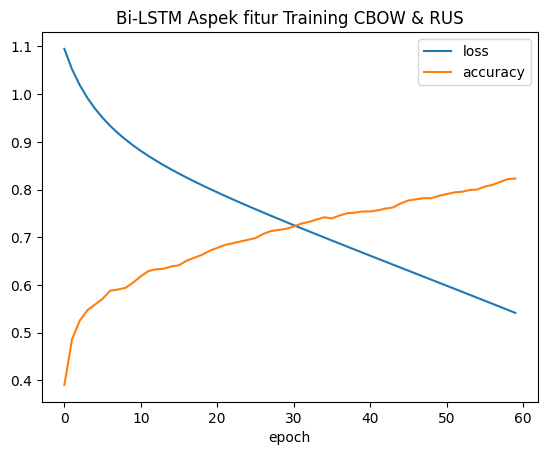

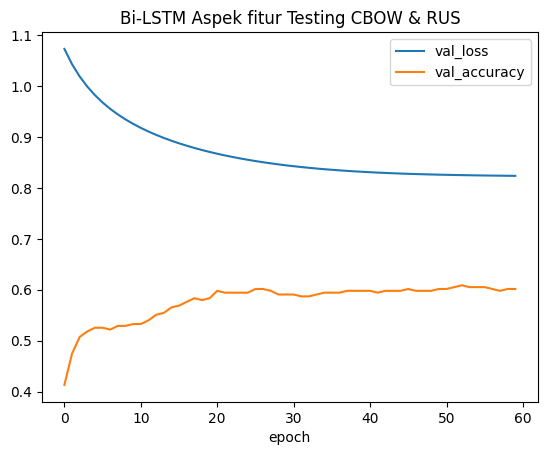

In [220]:
# Plot Training
plt.plot(history_fitur_rus.history['loss'])
plt.plot(history_fitur_rus.history['accuracy'])
plt.title('Bi-LSTM Aspek fitur Training CBOW & RUS')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.show()

# Plot Testing
plt.plot(history_fitur_rus.history['val_loss'])
plt.plot(history_fitur_rus.history['val_accuracy'])
plt.title('Bi-LSTM Aspek fitur Testing CBOW & RUS')
plt.xlabel('epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='upper right')
plt.show()

In [221]:
test_pred_fitur_rus = bilstm_fitur_rus.predict(X_test_fitur_rus)
test_val_fitur_rus = bilstm_fitur_rus.predict(X_train_fitur_rus)

print('evaluation')
evaluation_fitur_rus = bilstm_fitur_rus.evaluate(X_test_fitur_rus, y_test_fitur_rus, batch_size=minibatch)

y_aktual_train_fitur_rus = np.argmax(y_train_fitur_rus.to_numpy(), axis=1)
y_aktual_test_fitur_rus = np.argmax(y_test_fitur_rus.to_numpy(), axis=1)
y_pred_train_fitur_rus = np.argmax(test_val_fitur_rus, axis=1)
y_pred_test_fitur_rus = np.argmax(test_pred_fitur_rus, axis=1)

print("\n")
print("Confusion Matrix Test\n", pd.DataFrame(confusion_matrix(y_aktual_test_fitur_rus,
                       y_pred_test_fitur_rus,
                       labels=[0,1,2]), index = ["Non (Aktual)", "Pos (Aktual)", "Neg (Aktual)"],
                       columns = ["Non (Prediksi)", "Pos (Prediksi)", "Neg (Prediksi)"])
                       )

# print(test_prediksi[40])
# for i in test_prediksi_fitur_rus:
#   print(i)
# for i in test_prediksi_fitur_rus:
#   if np.argmax(i) == 0:
#     print("PREDIKSI : BUKAN SENTIMEN")
#   elif np.argmax(i) == 1:
#     print("PREDIKSI : POSITIF")
#   elif np.argmax(i) == 2:
#     print("PREDIKSI : NEGATIF")
# np.argmax(test_prediksi_fitur_rus[98])

print(f"\nLaporan Klasifikasi Testing:\n{classification_report(y_aktual_test_fitur_rus, y_pred_test_fitur_rus)}")

26/26 [==============================] - 0s 5ms/step
evaluation
1/1 [==============================] - 0s 38ms/step - loss: 0.8236 - accuracy: 0.6014


Confusion Matrix Test
               Non (Prediksi)  Pos (Prediksi)  Neg (Prediksi)
Non (Aktual)              42              20              30
Pos (Aktual)              14              56              22
Neg (Aktual)              19               5              68

Laporan Klasifikasi Testing:
              precision    recall  f1-score   support

           0       0.56      0.46      0.50        92
           1       0.69      0.61      0.65        92
           2       0.57      0.74      0.64        92

    accuracy                           0.60       276
   macro avg       0.61      0.60      0.60       276
weighted avg       0.61      0.60      0.60       276



#### **Kebermanfaatan**

In [222]:
bilstm_manfaat_rus = Sequential()
bilstm_manfaat_rus.add(Embedding(jumlah_kata, #jumlah vocabulary
                             dimensi_embedding, # Dimensi dari dense embedding / output dim
                             input_length=batas_panjang_kalimat, # panjang input
                             weights=[embedding_matrix],
                             trainable=False))
bilstm_manfaat_rus.add(Bidirectional(LSTM(hidden)))
bilstm_manfaat_rus.add(Dense(3, activation='softmax'))
bilstm_manfaat_rus.compile(loss='categorical_crossentropy',
                     optimizer=SGD(learning_rate=learning_rate),
                     metrics=['accuracy']
                     )

history_manfaat_rus = bilstm_manfaat_rus.fit(X_train_manfaat_rus, y_train_manfaat_rus, batch_size=minibatch,
           epochs=epoch,
           validation_data=(X_test_manfaat_rus, y_test_manfaat_rus))

print(bilstm_manfaat_rus.summary())

Epoch 1/60
1/1 [==============================] - 5s 5s/step - loss: 1.1058 - accuracy: 0.3614 - val_loss: 1.0312 - val_accuracy: 0.3929
Epoch 2/60
1/1 [==============================] - 0s 89ms/step - loss: 0.9600 - accuracy: 0.6386 - val_loss: 0.9837 - val_accuracy: 0.4643
Epoch 3/60
1/1 [==============================] - 0s 79ms/step - loss: 0.8547 - accuracy: 0.7229 - val_loss: 0.9493 - val_accuracy: 0.5000
Epoch 4/60
1/1 [==============================] - 0s 84ms/step - loss: 0.7720 - accuracy: 0.7952 - val_loss: 0.9228 - val_accuracy: 0.5357
Epoch 5/60
1/1 [==============================] - 0s 84ms/step - loss: 0.7034 - accuracy: 0.8434 - val_loss: 0.9017 - val_accuracy: 0.5714
Epoch 6/60
1/1 [==============================] - 0s 81ms/step - loss: 0.6445 - accuracy: 0.8675 - val_loss: 0.8843 - val_accuracy: 0.5714
Epoch 7/60
1/1 [==============================] - 0s 78ms/step - loss: 0.5927 - accuracy: 0.8795 - val_loss: 0.8694 - val_accuracy: 0.5714
Epoch 8/60
1/1 [=============

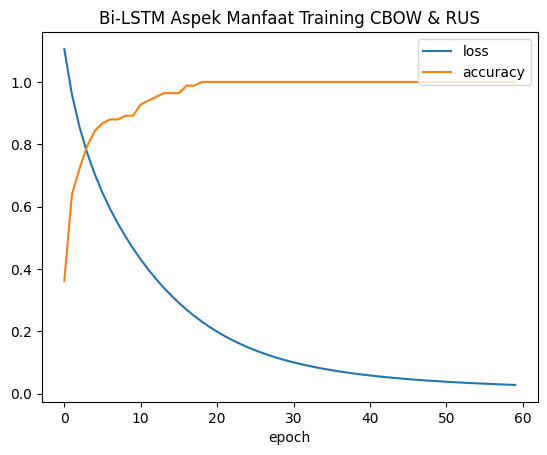

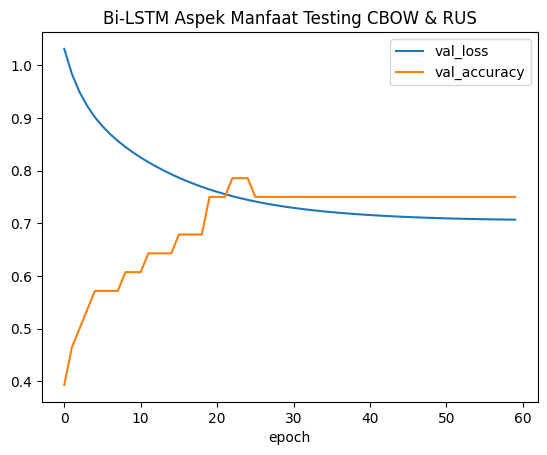

In [223]:
# Plot Training
plt.plot(history_manfaat_rus.history['loss'])
plt.plot(history_manfaat_rus.history['accuracy'])
plt.title('Bi-LSTM Aspek Manfaat Training CBOW & RUS')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.show()

# Plot Testing
plt.plot(history_manfaat_rus.history['val_loss'])
plt.plot(history_manfaat_rus.history['val_accuracy'])
plt.title('Bi-LSTM Aspek Manfaat Testing CBOW & RUS')
plt.xlabel('epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='upper right')
plt.show()

In [224]:
test_pred_manfaat_rus = bilstm_manfaat_rus.predict(X_test_manfaat_rus)
test_val_manfaat_rus = bilstm_manfaat_rus.predict(X_train_manfaat_rus)

print('evaluation')
evaluation_manfaat_cbow = bilstm_manfaat_rus.evaluate(X_test_manfaat_rus, y_test_manfaat_rus, batch_size=minibatch)
y_aktual_train_manfaat_rus = np.argmax(y_train_manfaat_rus.to_numpy(), axis=1)
y_aktual_test_manfaat_rus = np.argmax(y_test_manfaat_rus.to_numpy(), axis=1)
y_pred_train_manfaat_rus = np.argmax(test_val_manfaat_rus, axis=1)
y_pred_test_manfaat_rus = np.argmax(test_pred_manfaat_rus, axis=1)

print("\n")
print("Confusion Matrix Test\n", pd.DataFrame(confusion_matrix(y_aktual_test_manfaat_rus,
                       y_pred_test_manfaat_rus,
                       labels=[0,1,2]), index = ["Non (Aktual)", "Pos (Aktual)", "Neg (Aktual)"],
                       columns = ["Non (Prediksi)", "Pos (Prediksi)", "Neg (Prediksi)"])
                       )

# print(test_prediksi[40])
# for i in test_pred_manfaat_rus:
#   print(i)
# for i in test_pred_manfaat_rus:
#   if np.argmax(i) == 0:
#     print("PREDIKSI : BUKAN SENTIMEN")
#   elif np.argmax(i) == 1:
#     print("PREDIKSI : POSITIF")
#   elif np.argmax(i) == 2:
#     print("PREDIKSI : NEGATIF")
# np.argmax(test_pred_manfaat_rus[98])

print(f"\nLaporan Klasifikasi Testing:\n{classification_report(y_aktual_test_manfaat_rus, y_pred_test_manfaat_rus)}")

3/3 [==============================] - 0s 6ms/step
evaluation
1/1 [==============================] - 0s 30ms/step - loss: 0.7068 - accuracy: 0.7500


Confusion Matrix Test
               Non (Prediksi)  Pos (Prediksi)  Neg (Prediksi)
Non (Aktual)               7               2               1
Pos (Aktual)               3               6               0
Neg (Aktual)               0               1               8

Laporan Klasifikasi Testing:
              precision    recall  f1-score   support

           0       0.70      0.70      0.70        10
           1       0.67      0.67      0.67         9
           2       0.89      0.89      0.89         9

    accuracy                           0.75        28
   macro avg       0.75      0.75      0.75        28
weighted avg       0.75      0.75      0.75        28



#### **Bisnis**

In [225]:
bilstm_bisnis_rus = Sequential()
bilstm_bisnis_rus.add(Embedding(jumlah_kata, #jumlah vocabulary
                             dimensi_embedding, # Dimensi dari dense embedding / output dim
                             input_length=batas_panjang_kalimat, # panjang input
                             weights=[embedding_matrix],
                             trainable=False))
bilstm_bisnis_rus.add(Bidirectional(LSTM(hidden)))
bilstm_bisnis_rus.add(Dense(3, activation='softmax'))
bilstm_bisnis_rus.compile(loss='categorical_crossentropy',
                     optimizer=SGD(learning_rate=learning_rate),
                     metrics=['accuracy']
                     )

history_bisnis_rus = bilstm_bisnis_rus.fit(X_train_bisnis_rus, y_train_bisnis_rus, batch_size=minibatch,
           epochs=epoch,
           validation_data=(X_test_bisnis_rus, y_test_bisnis_rus))

print(bilstm_bisnis_rus.summary())

Epoch 1/60
2/2 [==============================] - 4s 864ms/step - loss: 1.0918 - accuracy: 0.3842 - val_loss: 0.9855 - val_accuracy: 0.5271
Epoch 2/60
2/2 [==============================] - 0s 72ms/step - loss: 0.9913 - accuracy: 0.5469 - val_loss: 0.9287 - val_accuracy: 0.5995
Epoch 3/60
2/2 [==============================] - 0s 59ms/step - loss: 0.9290 - accuracy: 0.5917 - val_loss: 0.8936 - val_accuracy: 0.6150
Epoch 4/60
2/2 [==============================] - 0s 147ms/step - loss: 0.8874 - accuracy: 0.6090 - val_loss: 0.8635 - val_accuracy: 0.6227
Epoch 5/60
2/2 [==============================] - 0s 77ms/step - loss: 0.8536 - accuracy: 0.6219 - val_loss: 0.8462 - val_accuracy: 0.6382
Epoch 6/60
2/2 [==============================] - 0s 102ms/step - loss: 0.8278 - accuracy: 0.6365 - val_loss: 0.8292 - val_accuracy: 0.6408
Epoch 7/60
2/2 [==============================] - 0s 131ms/step - loss: 0.8038 - accuracy: 0.6520 - val_loss: 0.8147 - val_accuracy: 0.6486
Epoch 8/60
2/2 [=======

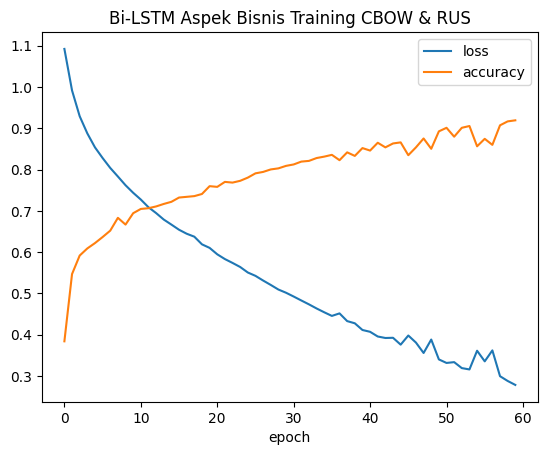

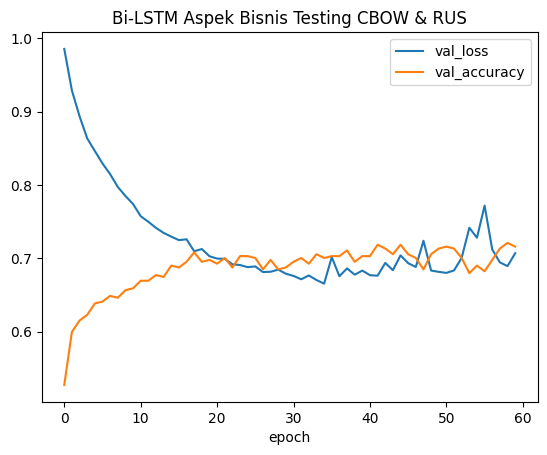

In [226]:
# Plot Training
plt.plot(history_bisnis_rus.history['loss'])
plt.plot(history_bisnis_rus.history['accuracy'])
plt.title('Bi-LSTM Aspek Bisnis Training CBOW & RUS')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.show()

# Plot Testing
plt.plot(history_bisnis_rus.history['val_loss'])
plt.plot(history_bisnis_rus.history['val_accuracy'])
plt.title('Bi-LSTM Aspek Bisnis Testing CBOW & RUS')
plt.xlabel('epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='upper right')
plt.show()

In [227]:
test_pred_bisnis_rus = bilstm_bisnis_rus.predict(X_test_bisnis_rus)
test_val_bisnis_rus = bilstm_bisnis_rus.predict(X_train_bisnis_rus)

print('evaluation')
evaluation_bisnis_rus = bilstm_bisnis_rus.evaluate(X_test_bisnis_rus, y_test_bisnis_rus, batch_size=minibatch)
y_aktual_train_bisnis_rus = np.argmax(y_train_bisnis_rus.to_numpy(), axis=1)
y_aktual_test_bisnis_rus = np.argmax(y_test_bisnis_rus.to_numpy(), axis=1)
y_pred_train_bisnis_rus = np.argmax(test_val_bisnis_rus, axis=1)
y_pred_test_bisnis_rus = np.argmax(test_pred_bisnis_rus, axis=1)

print("\n")
print("Confusion Matrix Test\n", pd.DataFrame(confusion_matrix(y_aktual_test_bisnis_rus,
                       y_pred_test_bisnis_rus,
                       labels=[0,1,2]), index = ["Non (Aktual)", "Pos (Aktual)", "Neg (Aktual)"],
                       columns = ["Non (Prediksi)", "Pos (Prediksi)", "Neg (Prediksi)"])
                       )

# print(test_prediksi[40])
# for i in test_prediksi_bisnis_rus:
#   print(i)
# for i in test_prediksi_bisnis_rus:
#   if np.argmax(i) == 0:
#     print("PREDIKSI : BUKAN SENTIMEN")
#   elif np.argmax(i) == 1:
#     print("PREDIKSI : POSITIF")
#   elif np.argmax(i) == 2:
#     print("PREDIKSI : NEGATIF")
# np.argmax(test_prediksi_bisnis_rus[98])

print(f"Laporan Klasifikasi Testing:\n{classification_report(y_aktual_test_bisnis_rus, y_pred_test_bisnis_rus)}")

37/37 [==============================] - 0s 6ms/step
evaluation
1/1 [==============================] - 0s 59ms/step - loss: 0.7068 - accuracy: 0.7158


Confusion Matrix Test
               Non (Prediksi)  Pos (Prediksi)  Neg (Prediksi)
Non (Aktual)              67              20              42
Pos (Aktual)              23             102               4
Neg (Aktual)              13               8             108
Laporan Klasifikasi Testing:
              precision    recall  f1-score   support

           0       0.65      0.52      0.58       129
           1       0.78      0.79      0.79       129
           2       0.70      0.84      0.76       129

    accuracy                           0.72       387
   macro avg       0.71      0.72      0.71       387
weighted avg       0.71      0.72      0.71       387



#### **Non Aspek**

In [228]:
bilstm_non_aspek_rus = Sequential()
bilstm_non_aspek_rus.add(Embedding(jumlah_kata, #jumlah vocabulary
                             dimensi_embedding, # Dimensi dari dense embedding / output dim
                             input_length=batas_panjang_kalimat, # panjang input
                             weights=[embedding_matrix],
                             trainable=False))
bilstm_non_aspek_rus.add(Bidirectional(LSTM(hidden)))
bilstm_non_aspek_rus.add(Dense(3, activation='softmax'))
bilstm_non_aspek_rus.compile(loss='categorical_crossentropy',
                     optimizer=SGD(learning_rate=learning_rate),
                     metrics=['accuracy']
                     )

history_non_aspek_rus = bilstm_non_aspek_rus.fit(X_train_nonaspek_rus, y_train_nonaspek_rus, batch_size=minibatch,
           epochs=epoch,
           validation_data=(X_test_nonaspek_rus, y_test_nonaspek_rus))

print(bilstm_non_aspek_rus.summary())

Epoch 1/60
1/1 [==============================] - 4s 4s/step - loss: 1.1103 - accuracy: 0.3429 - val_loss: 1.0812 - val_accuracy: 0.3846
Epoch 2/60
1/1 [==============================] - 0s 150ms/step - loss: 1.0706 - accuracy: 0.4241 - val_loss: 1.0546 - val_accuracy: 0.4263
Epoch 3/60
1/1 [==============================] - 0s 153ms/step - loss: 1.0400 - accuracy: 0.4840 - val_loss: 1.0339 - val_accuracy: 0.4423
Epoch 4/60
1/1 [==============================] - 0s 127ms/step - loss: 1.0156 - accuracy: 0.5128 - val_loss: 1.0174 - val_accuracy: 0.4647
Epoch 5/60
1/1 [==============================] - 0s 113ms/step - loss: 0.9957 - accuracy: 0.5299 - val_loss: 1.0041 - val_accuracy: 0.4808
Epoch 6/60
1/1 [==============================] - 0s 150ms/step - loss: 0.9790 - accuracy: 0.5321 - val_loss: 0.9932 - val_accuracy: 0.4872
Epoch 7/60
1/1 [==============================] - 0s 113ms/step - loss: 0.9647 - accuracy: 0.5427 - val_loss: 0.9841 - val_accuracy: 0.5032
Epoch 8/60
1/1 [=======

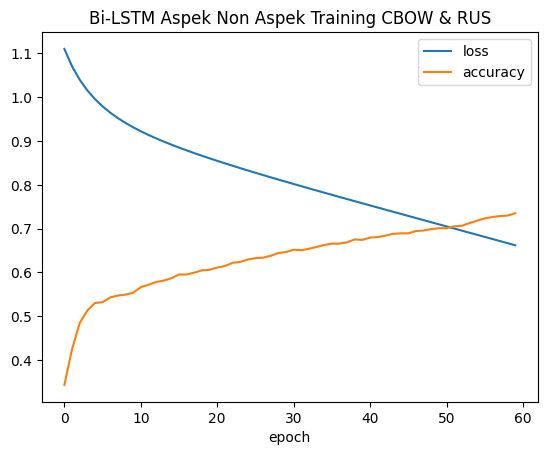

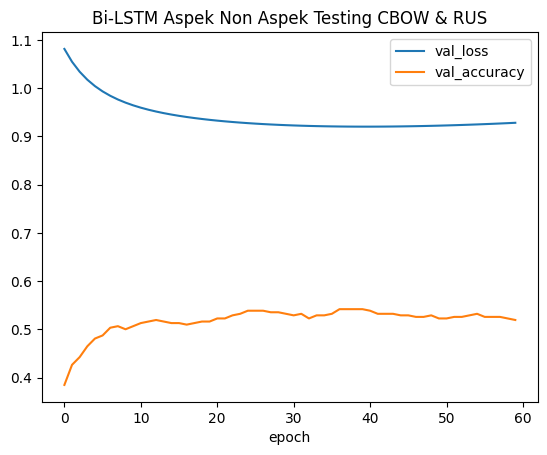

In [229]:
# Plot Training
plt.plot(history_non_aspek_rus.history['loss'])
plt.plot(history_non_aspek_rus.history['accuracy'])
plt.title('Bi-LSTM Aspek Non Aspek Training CBOW & RUS')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.show()

# Plot Testing
plt.plot(history_non_aspek_rus.history['val_loss'])
plt.plot(history_non_aspek_rus.history['val_accuracy'])
plt.title('Bi-LSTM Aspek Non Aspek Testing CBOW & RUS')
plt.xlabel('epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='upper right')
plt.show()

In [230]:
test_pred_nonaspek_rus = bilstm_non_aspek_rus.predict(X_test_nonaspek_rus)
test_val_nonaspek_rus = bilstm_non_aspek_rus.predict(X_train_nonaspek_rus)

print('evaluation')
evaluation_nonaspek_rus = bilstm_non_aspek_rus.evaluate(X_test_nonaspek_rus, y_test_nonaspek_rus, batch_size=minibatch)
y_aktual_train_nonaspek_rus = np.argmax(y_train_nonaspek_rus.to_numpy(), axis=1)
y_aktual_test_nonaspek_rus = np.argmax(y_test_nonaspek_rus.to_numpy(), axis=1)
y_pred_train_nonaspek_rus = np.argmax(test_val_nonaspek_rus, axis=1)
y_pred_test_nonaspek_rus = np.argmax(test_pred_nonaspek_rus, axis=1)

print("\n")
print("Confusion Matrix Test\n", pd.DataFrame(confusion_matrix(y_aktual_test_nonaspek_rus,
                       y_pred_test_nonaspek_rus,
                       labels=[0,1,2]), index = ["Non (Aktual)", "Pos (Aktual)", "Neg (Aktual)"],
                       columns = ["Non (Prediksi)", "Pos (Prediksi)", "Neg (Prediksi)"])
                       )

# print(test_prediksi[40])
# for i in test_prediksi_layanan_rus:
#   print(i)
# for i in test_prediksi_layanan_rus:
#   if np.argmax(i) == 0:
#     print("PREDIKSI : BUKAN SENTIMEN")
#   elif np.argmax(i) == 1:
#     print("PREDIKSI : POSITIF")
#   elif np.argmax(i) == 2:
#     print("PREDIKSI : NEGATIF")
# np.argmax(test_prediksi_layanan_rus[98])

print(f"\nLaporan Klasifikasi Testing:\n{classification_report(y_aktual_test_nonaspek_rus, y_pred_test_nonaspek_rus)}")

30/30 [==============================] - 0s 4ms/step
evaluation
1/1 [==============================] - 0s 37ms/step - loss: 0.9281 - accuracy: 0.5192


Confusion Matrix Test
               Non (Prediksi)  Pos (Prediksi)  Neg (Prediksi)
Non (Aktual)              40              31              33
Pos (Aktual)              35              51              18
Neg (Aktual)              24               9              71

Laporan Klasifikasi Testing:
              precision    recall  f1-score   support

           0       0.40      0.38      0.39       104
           1       0.56      0.49      0.52       104
           2       0.58      0.68      0.63       104

    accuracy                           0.52       312
   macro avg       0.52      0.52      0.52       312
weighted avg       0.52      0.52      0.52       312



### **BiLSTM & Word2Vec dengan Synthetic Minority Oversampling Technique (SMOTE)**

In [231]:
# Implementasi SMOTE
smote = SMOTE(random_state=random_state_num, sampling_strategy=oversampling_strategy)

# Resample X dan Y dengan Data Seimbang
X_layanan_smote, resample_y_layanan_smote = smote.fit_resample(X_balanced,Y_layanan_balanced)
X_fitur_smote, resample_y_fitur_smote = smote.fit_resample(X_balanced,Y_fitur_balanced)
X_manfaat_smote, resample_y_manfaat_smote = smote.fit_resample(X_balanced,Y_kebermanfaatan_balanced)
X_bisnis_smote, resample_y_bisnis_smote = smote.fit_resample(X_balanced,Y_bisnis_balanced)
X_non_aspek_smote, resample_y_non_aspek_smote = smote.fit_resample(X_balanced,Y_non_aspek_balanced)

Y_layanan_smote = pd.get_dummies(resample_y_layanan_smote)
Y_fitur_smote = pd.get_dummies(resample_y_fitur_smote)
Y_kebermanfaatan_smote = pd.get_dummies(resample_y_manfaat_smote)
Y_bisnis_smote = pd.get_dummies(resample_y_bisnis_smote)
Y_non_aspek_smote = pd.get_dummies(resample_y_non_aspek_smote)

# Split data test dan training
X_train_layanan_smote, X_test_layanan_smote, y_train_layanan_smote, y_test_layanan_smote = train_test_split(X_layanan_smote, Y_layanan_smote, test_size=rasio_pengujian, stratify=Y_layanan_smote, random_state=random_state_num)
X_train_fitur_smote, X_test_fitur_smote, y_train_fitur_smote, y_test_fitur_smote = train_test_split(X_fitur_smote, Y_fitur_smote, test_size=rasio_pengujian, stratify=Y_fitur_smote, random_state=random_state_num)
X_train_manfaat_smote, X_test_manfaat_smote, y_train_manfaat_smote, y_test_manfaat_smote = train_test_split(X_manfaat_smote, Y_kebermanfaatan_smote, test_size=rasio_pengujian, stratify=Y_kebermanfaatan_smote, random_state=random_state_num)
X_train_bisnis_smote, X_test_bisnis_smote, y_train_bisnis_smote, y_test_bisnis_smote = train_test_split(X_bisnis_smote, Y_bisnis_smote, test_size=rasio_pengujian, stratify=Y_bisnis_smote, random_state=random_state_num)
X_train_nonaspek_smote, X_test_nonaspek_smote, y_train_nonaspek_smote, y_test_nonaspek_smote = train_test_split(X_non_aspek_smote, Y_non_aspek_smote, test_size=rasio_pengujian, stratify=Y_non_aspek_smote, random_state=random_state_num)

#### **Layanan**

In [232]:
bilstm_layanan_smote = Sequential()
bilstm_layanan_smote.add(Embedding(jumlah_kata, #jumlah vocabulary
                             dimensi_embedding, # Dimensi dari dense embedding / output dim
                             input_length=batas_panjang_kalimat, # panjang input
                             weights=[embedding_matrix],
                             trainable=False))
bilstm_layanan_smote.add(Bidirectional(LSTM(hidden)))
bilstm_layanan_smote.add(Dense(3, activation='softmax'))
bilstm_layanan_smote.compile(loss='categorical_crossentropy',
                     optimizer=SGD(learning_rate=learning_rate),
                     metrics=['accuracy']
                     )

history_layanan_smote = bilstm_layanan_smote.fit(X_train_layanan_smote, y_train_layanan_smote, batch_size=minibatch,
           epochs=epoch,
           validation_data=(X_test_layanan_smote, y_test_layanan_smote))

print(bilstm_layanan_smote.summary())

Epoch 1/60
5/5 [==============================] - 4s 299ms/step - loss: 1.0864 - accuracy: 0.3837 - val_loss: 1.0680 - val_accuracy: 0.4213
Epoch 2/60
5/5 [==============================] - 0s 89ms/step - loss: 1.0482 - accuracy: 0.4541 - val_loss: 1.0455 - val_accuracy: 0.4677
Epoch 3/60
5/5 [==============================] - 0s 89ms/step - loss: 1.0236 - accuracy: 0.4876 - val_loss: 1.0295 - val_accuracy: 0.5006
Epoch 4/60
5/5 [==============================] - 0s 87ms/step - loss: 1.0043 - accuracy: 0.5113 - val_loss: 1.0168 - val_accuracy: 0.5176
Epoch 5/60
5/5 [==============================] - 0s 84ms/step - loss: 0.9883 - accuracy: 0.5287 - val_loss: 1.0055 - val_accuracy: 0.5300
Epoch 6/60
5/5 [==============================] - 0s 90ms/step - loss: 0.9741 - accuracy: 0.5457 - val_loss: 0.9952 - val_accuracy: 0.5441
Epoch 7/60
5/5 [==============================] - 0s 89ms/step - loss: 0.9605 - accuracy: 0.5610 - val_loss: 0.9854 - val_accuracy: 0.5458
Epoch 8/60
5/5 [==========

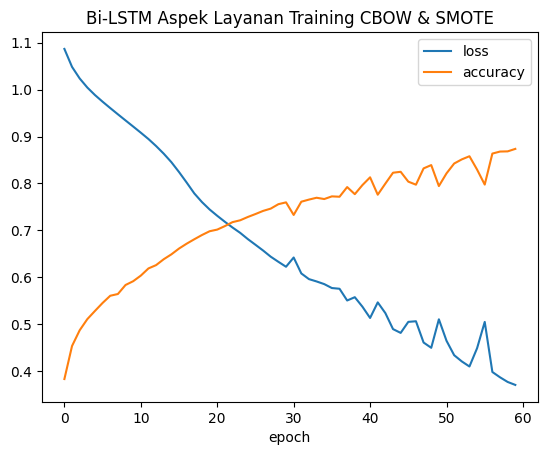

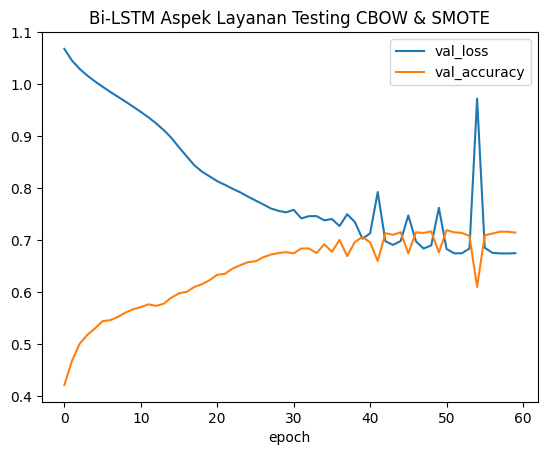

In [233]:
# Plot Training
plt.plot(history_layanan_smote.history['loss'])
plt.plot(history_layanan_smote.history['accuracy'])
plt.title('Bi-LSTM Aspek Layanan Training CBOW & SMOTE')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.show()

# Plot Testing
plt.plot(history_layanan_smote.history['val_loss'])
plt.plot(history_layanan_smote.history['val_accuracy'])
plt.title('Bi-LSTM Aspek Layanan Testing CBOW & SMOTE')
plt.xlabel('epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='upper right')
plt.show()

In [234]:
test_pred_layanan_smote = bilstm_layanan_smote.predict(X_test_layanan_smote)
test_val_layanan_smote = bilstm_layanan_smote.predict(X_train_layanan_smote)

print('evaluation')
evaluation_layanan_smote = bilstm_layanan_smote.evaluate(X_test_layanan_smote, y_test_layanan_smote, batch_size=minibatch)
y_aktual_train_layanan_smote = np.argmax(y_train_layanan_smote.to_numpy(), axis=1)
y_aktual_test_layanan_smote = np.argmax(y_test_layanan_smote.to_numpy(), axis=1)
y_pred_train_layanan_smote = np.argmax(test_val_layanan_smote, axis=1)
y_pred_test_layanan_smote = np.argmax(test_pred_layanan_smote, axis=1)

print("\n")
print("Confusion Matrix Test\n", pd.DataFrame(confusion_matrix(y_aktual_test_layanan_smote,
                       y_pred_test_layanan_smote,
                       labels=[0,1,2]), index = ["Non (Aktual)", "Pos (Aktual)", "Neg (Aktual)"],
                       columns = ["Non (Prediksi)", "Pos (Prediksi)", "Neg (Prediksi)"])
                       )

# print(test_prediksi[40])
# for i in test_prediksi_layanan_smote:
#   print(i)
# for i in test_prediksi_layanan_smote:
#   if np.argmax(i) == 0:
#     print("PREDIKSI : BUKAN SENTIMEN")
#   elif np.argmax(i) == 1:
#     print("PREDIKSI : POSITIF")
#   elif np.argmax(i) == 2:
#     print("PREDIKSI : NEGATIF")
# np.argmax(test_prediksi_layanan_smote[98])

print(f"\nLaporan Klasifikasi Testing:\n{classification_report(y_aktual_test_layanan_smote, y_pred_test_layanan_smote)}")

160/160 [==============================] - 1s 5ms/step
evaluation
2/2 [==============================] - 0s 23ms/step - loss: 0.6749 - accuracy: 0.7145


Confusion Matrix Test
               Non (Prediksi)  Pos (Prediksi)  Neg (Prediksi)
Non (Aktual)             445              64              59
Pos (Aktual)              72             361             134
Neg (Aktual)              36             121             410

Laporan Klasifikasi Testing:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       568
           1       0.66      0.64      0.65       567
           2       0.68      0.72      0.70       567

    accuracy                           0.71      1702
   macro avg       0.72      0.71      0.71      1702
weighted avg       0.72      0.71      0.71      1702



#### **Fitur**

In [236]:
bilstm_fitur_smote = Sequential()
bilstm_fitur_smote.add(Embedding(jumlah_kata, #jumlah vocabulary
                             dimensi_embedding, # Dimensi dari dense embedding / output dim
                             input_length=batas_panjang_kalimat, # panjang input
                             weights=[embedding_matrix],
                             trainable=False))
bilstm_fitur_smote.add(Bidirectional(LSTM(hidden)))
bilstm_fitur_smote.add(Dense(3, activation='softmax'))
bilstm_fitur_smote.compile(loss='categorical_crossentropy',
                     optimizer=SGD(learning_rate=learning_rate),
                     metrics=['accuracy']
                     )

history_fitur_smote = bilstm_fitur_smote.fit(X_train_fitur_smote, y_train_fitur_smote, batch_size=minibatch,
           epochs=epoch,
           validation_data=(X_test_fitur_smote, y_test_fitur_smote))

print(bilstm_fitur_smote.summary())

Epoch 1/60
5/5 [==============================] - 5s 264ms/step - loss: 1.0938 - accuracy: 0.3879 - val_loss: 1.0700 - val_accuracy: 0.4237
Epoch 2/60
5/5 [==============================] - 0s 80ms/step - loss: 1.0606 - accuracy: 0.4428 - val_loss: 1.0515 - val_accuracy: 0.4557
Epoch 3/60
5/5 [==============================] - 0s 74ms/step - loss: 1.0399 - accuracy: 0.4752 - val_loss: 1.0391 - val_accuracy: 0.4714
Epoch 4/60
5/5 [==============================] - 0s 73ms/step - loss: 1.0239 - accuracy: 0.4892 - val_loss: 1.0296 - val_accuracy: 0.4758
Epoch 5/60
5/5 [==============================] - 0s 72ms/step - loss: 1.0106 - accuracy: 0.5016 - val_loss: 1.0219 - val_accuracy: 0.4840
Epoch 6/60
5/5 [==============================] - 0s 80ms/step - loss: 0.9983 - accuracy: 0.5154 - val_loss: 1.0149 - val_accuracy: 0.4909
Epoch 7/60
5/5 [==============================] - 0s 79ms/step - loss: 0.9874 - accuracy: 0.5227 - val_loss: 1.0086 - val_accuracy: 0.4947
Epoch 8/60
5/5 [==========

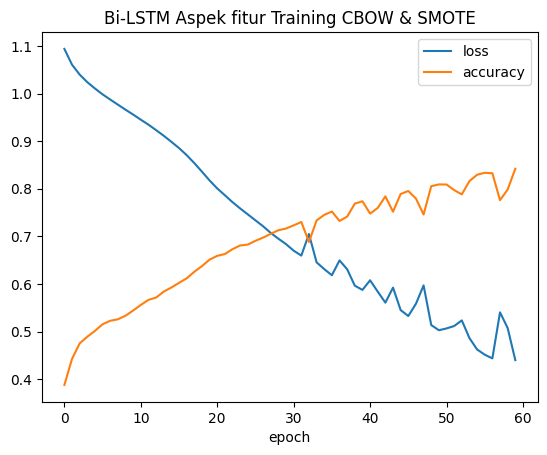

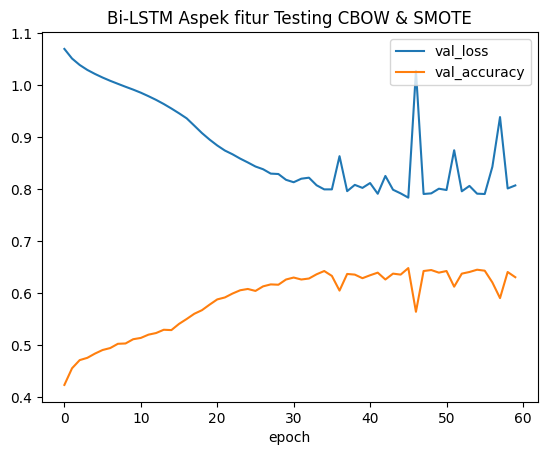

In [237]:
# Plot Training
plt.plot(history_fitur_smote.history['loss'])
plt.plot(history_fitur_smote.history['accuracy'])
plt.title('Bi-LSTM Aspek fitur Training CBOW & SMOTE')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.show()

# Plot Testing
plt.plot(history_fitur_smote.history['val_loss'])
plt.plot(history_fitur_smote.history['val_accuracy'])
plt.title('Bi-LSTM Aspek fitur Testing CBOW & SMOTE')
plt.xlabel('epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='upper right')
plt.show()

In [238]:
test_pred_fitur_smote = bilstm_fitur_smote.predict(X_test_fitur_smote)
test_val_fitur_smote = bilstm_fitur_smote.predict(X_train_fitur_smote)

print('evaluation')
evaluation_fitur_smote = bilstm_fitur_smote.evaluate(X_test_fitur_smote, y_test_fitur_smote, batch_size=minibatch)

y_aktual_train_fitur_smote = np.argmax(y_train_fitur_smote.to_numpy(), axis=1)
y_aktual_test_fitur_smote = np.argmax(y_test_fitur_smote.to_numpy(), axis=1)
y_pred_train_fitur_smote = np.argmax(test_val_fitur_smote, axis=1)
y_pred_test_fitur_smote = np.argmax(test_pred_fitur_smote, axis=1)

print("\n")
print("Confusion Matrix Test\n", pd.DataFrame(confusion_matrix(y_aktual_test_fitur_smote,
                       y_pred_test_fitur_smote,
                       labels=[0,1,2]), index = ["Non (Aktual)", "Pos (Aktual)", "Neg (Aktual)"],
                       columns = ["Non (Prediksi)", "Pos (Prediksi)", "Neg (Prediksi)"])
                       )

# print(test_prediksi[40])
# for i in test_prediksi_fitur_smote:
#   print(i)
# for i in test_prediksi_fitur_smote:
#   if np.argmax(i) == 0:
#     print("PREDIKSI : BUKAN SENTIMEN")
#   elif np.argmax(i) == 1:
#     print("PREDIKSI : POSITIF")
#   elif np.argmax(i) == 2:
#     print("PREDIKSI : NEGATIF")
# np.argmax(test_prediksi_fitur_smote[98])

print(f"\nLaporan Klasifikasi Testing:\n{classification_report(y_aktual_test_fitur_smote, y_pred_test_fitur_smote)}")

150/150 [==============================] - 1s 5ms/step
evaluation
2/2 [==============================] - 0s 20ms/step - loss: 0.8074 - accuracy: 0.6309


Confusion Matrix Test
               Non (Prediksi)  Pos (Prediksi)  Neg (Prediksi)
Non (Aktual)             364              95              72
Pos (Aktual)              55             355             121
Neg (Aktual)              54             191             286

Laporan Klasifikasi Testing:
              precision    recall  f1-score   support

           0       0.77      0.69      0.73       531
           1       0.55      0.67      0.61       531
           2       0.60      0.54      0.57       531

    accuracy                           0.63      1593
   macro avg       0.64      0.63      0.63      1593
weighted avg       0.64      0.63      0.63      1593



#### **Kebermanfaatan**

In [240]:
bilstm_manfaat_smote = Sequential()
bilstm_manfaat_smote.add(Embedding(jumlah_kata, #jumlah vocabulary
                             dimensi_embedding, # Dimensi dari dense embedding / output dim
                             input_length=batas_panjang_kalimat, # panjang input
                             weights=[embedding_matrix],
                             trainable=False))
bilstm_manfaat_smote.add(Bidirectional(LSTM(hidden)))
bilstm_manfaat_smote.add(Dense(3, activation='softmax'))
bilstm_manfaat_smote.compile(loss='categorical_crossentropy',
                     optimizer=SGD(learning_rate=learning_rate),
                     metrics=['accuracy']
                     )

history_manfaat_smote = bilstm_manfaat_smote.fit(X_train_manfaat_smote, y_train_manfaat_smote, batch_size=minibatch,
           epochs=epoch,
           validation_data=(X_test_manfaat_smote, y_test_manfaat_smote))

print(bilstm_manfaat_smote.summary())

Epoch 1/60
6/6 [==============================] - 6s 227ms/step - loss: 1.0847 - accuracy: 0.3867 - val_loss: 1.0355 - val_accuracy: 0.4494
Epoch 2/60
6/6 [==============================] - 0s 73ms/step - loss: 1.0141 - accuracy: 0.4864 - val_loss: 0.9907 - val_accuracy: 0.5139
Epoch 3/60
6/6 [==============================] - 1s 95ms/step - loss: 0.9703 - accuracy: 0.5338 - val_loss: 0.9579 - val_accuracy: 0.5394
Epoch 4/60
6/6 [==============================] - 0s 79ms/step - loss: 0.9361 - accuracy: 0.5670 - val_loss: 0.9297 - val_accuracy: 0.5622
Epoch 5/60
6/6 [==============================] - 0s 84ms/step - loss: 0.9055 - accuracy: 0.5877 - val_loss: 0.9046 - val_accuracy: 0.5844
Epoch 6/60
6/6 [==============================] - 1s 111ms/step - loss: 0.8766 - accuracy: 0.6059 - val_loss: 0.8808 - val_accuracy: 0.5906
Epoch 7/60
6/6 [==============================] - 0s 82ms/step - loss: 0.8469 - accuracy: 0.6300 - val_loss: 0.8549 - val_accuracy: 0.6100
Epoch 8/60
6/6 [=========

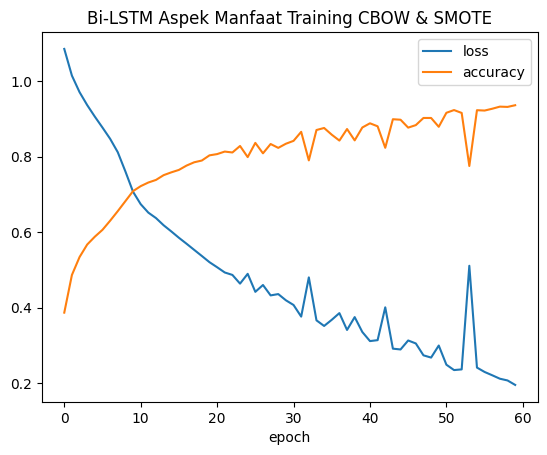

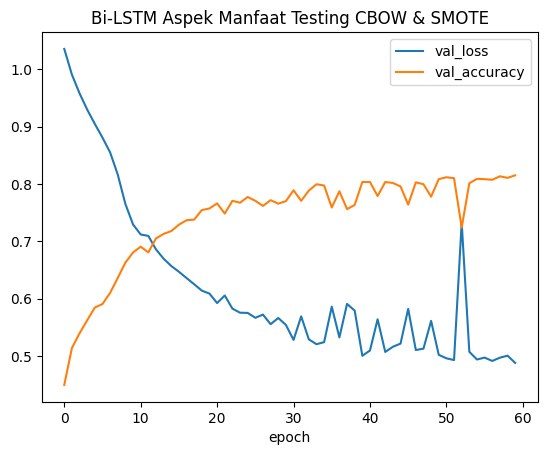

In [241]:
# Plot Training
plt.plot(history_manfaat_smote.history['loss'])
plt.plot(history_manfaat_smote.history['accuracy'])
plt.title('Bi-LSTM Aspek Manfaat Training CBOW & SMOTE')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.show()

# Plot Testing
plt.plot(history_manfaat_smote.history['val_loss'])
plt.plot(history_manfaat_smote.history['val_accuracy'])
plt.title('Bi-LSTM Aspek Manfaat Testing CBOW & SMOTE')
plt.xlabel('epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='upper right')
plt.show()

In [242]:
test_pred_manfaat_smote = bilstm_manfaat_smote.predict(X_test_manfaat_smote)
test_val_manfaat_smote = bilstm_manfaat_smote.predict(X_train_manfaat_smote)

print('evaluation')
evaluation_manfaat_cbow = bilstm_manfaat_smote.evaluate(X_test_manfaat_smote, y_test_manfaat_smote, batch_size=minibatch)
y_aktual_train_manfaat_smote = np.argmax(y_train_manfaat_smote.to_numpy(), axis=1)
y_aktual_test_manfaat_smote = np.argmax(y_test_manfaat_smote.to_numpy(), axis=1)
y_pred_train_manfaat_smote = np.argmax(test_val_manfaat_smote, axis=1)
y_pred_test_manfaat_smote = np.argmax(test_pred_manfaat_smote, axis=1)

print("\n")
print("Confusion Matrix Test\n", pd.DataFrame(confusion_matrix(y_aktual_test_manfaat_smote,
                       y_pred_test_manfaat_smote,
                       labels=[0,1,2]), index = ["Non (Aktual)", "Pos (Aktual)", "Neg (Aktual)"],
                       columns = ["Non (Prediksi)", "Pos (Prediksi)", "Neg (Prediksi)"])
                       )

# print(test_prediksi[40])
# for i in test_pred_manfaat_smote:
#   print(i)
# for i in test_pred_manfaat_smote:
#   if np.argmax(i) == 0:
#     print("PREDIKSI : BUKAN SENTIMEN")
#   elif np.argmax(i) == 1:
#     print("PREDIKSI : POSITIF")
#   elif np.argmax(i) == 2:
#     print("PREDIKSI : NEGATIF")
# np.argmax(test_pred_manfaat_smote[98])

print(f"\nLaporan Klasifikasi Testing:\n{classification_report(y_aktual_test_manfaat_smote, y_pred_test_manfaat_smote)}")

169/169 [==============================] - 1s 4ms/step
evaluation
2/2 [==============================] - 0s 24ms/step - loss: 0.4879 - accuracy: 0.8150


Confusion Matrix Test
               Non (Prediksi)  Pos (Prediksi)  Neg (Prediksi)
Non (Aktual)             485              98              17
Pos (Aktual)              68             453              79
Neg (Aktual)              23              48             529

Laporan Klasifikasi Testing:
              precision    recall  f1-score   support

           0       0.84      0.81      0.82       600
           1       0.76      0.76      0.76       600
           2       0.85      0.88      0.86       600

    accuracy                           0.81      1800
   macro avg       0.81      0.82      0.81      1800
weighted avg       0.81      0.81      0.81      1800



#### **Bisnis**

In [243]:
bilstm_bisnis_smote = Sequential()
bilstm_bisnis_smote.add(Embedding(jumlah_kata, #jumlah vocabulary
                             dimensi_embedding, # Dimensi dari dense embedding / output dim
                             input_length=batas_panjang_kalimat, # panjang input
                             weights=[embedding_matrix],
                             trainable=False))
bilstm_bisnis_smote.add(Bidirectional(LSTM(hidden)))
bilstm_bisnis_smote.add(Dense(3, activation='softmax'))
bilstm_bisnis_smote.compile(loss='categorical_crossentropy',
                     optimizer=SGD(learning_rate=learning_rate),
                     metrics=['accuracy']
                     )

history_bisnis_smote = bilstm_bisnis_smote.fit(X_train_bisnis_smote, y_train_bisnis_smote, batch_size=minibatch,
           epochs=epoch,
           validation_data=(X_test_bisnis_smote, y_test_bisnis_smote))

print(bilstm_bisnis_smote.summary())

Epoch 1/60
5/5 [==============================] - 5s 286ms/step - loss: 1.0908 - accuracy: 0.3871 - val_loss: 1.0496 - val_accuracy: 0.4621
Epoch 2/60
5/5 [==============================] - 0s 77ms/step - loss: 1.0370 - accuracy: 0.4687 - val_loss: 1.0152 - val_accuracy: 0.4980
Epoch 3/60
5/5 [==============================] - 0s 72ms/step - loss: 1.0031 - accuracy: 0.5150 - val_loss: 0.9913 - val_accuracy: 0.5149
Epoch 4/60
5/5 [==============================] - 0s 71ms/step - loss: 0.9777 - accuracy: 0.5324 - val_loss: 0.9736 - val_accuracy: 0.5217
Epoch 5/60
5/5 [==============================] - 0s 73ms/step - loss: 0.9569 - accuracy: 0.5544 - val_loss: 0.9598 - val_accuracy: 0.5393
Epoch 6/60
5/5 [==============================] - 0s 77ms/step - loss: 0.9387 - accuracy: 0.5638 - val_loss: 0.9469 - val_accuracy: 0.5501
Epoch 7/60
5/5 [==============================] - 0s 77ms/step - loss: 0.9215 - accuracy: 0.5774 - val_loss: 0.9370 - val_accuracy: 0.5630
Epoch 8/60
5/5 [==========

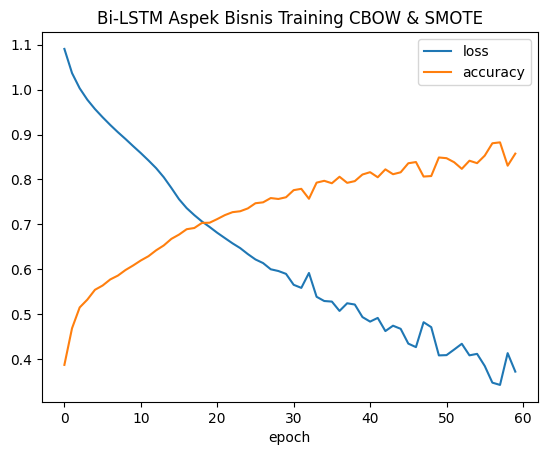

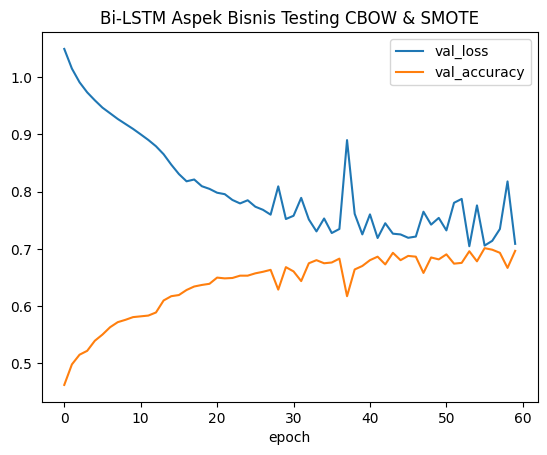

In [244]:
# Plot Training
plt.plot(history_bisnis_smote.history['loss'])
plt.plot(history_bisnis_smote.history['accuracy'])
plt.title('Bi-LSTM Aspek Bisnis Training CBOW & SMOTE')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.show()

# Plot Testing
plt.plot(history_bisnis_smote.history['val_loss'])
plt.plot(history_bisnis_smote.history['val_accuracy'])
plt.title('Bi-LSTM Aspek Bisnis Testing CBOW & SMOTE')
plt.xlabel('epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='upper right')
plt.show()

In [245]:
test_pred_bisnis_smote = bilstm_bisnis_smote.predict(X_test_bisnis_smote)
test_val_bisnis_smote = bilstm_bisnis_smote.predict(X_train_bisnis_smote)

print('evaluation')
evaluation_bisnis_smote = bilstm_bisnis_smote.evaluate(X_test_bisnis_smote, y_test_bisnis_smote, batch_size=minibatch)
y_aktual_train_bisnis_smote = np.argmax(y_train_bisnis_smote.to_numpy(), axis=1)
y_aktual_test_bisnis_smote = np.argmax(y_test_bisnis_smote.to_numpy(), axis=1)
y_pred_train_bisnis_smote = np.argmax(test_val_bisnis_smote, axis=1)
y_pred_test_bisnis_smote = np.argmax(test_pred_bisnis_smote, axis=1)

print("\n")
print("Confusion Matrix Test\n", pd.DataFrame(confusion_matrix(y_aktual_test_bisnis_smote,
                       y_pred_test_bisnis_smote,
                       labels=[0,1,2]), index = ["Non (Aktual)", "Pos (Aktual)", "Neg (Aktual)"],
                       columns = ["Non (Prediksi)", "Pos (Prediksi)", "Neg (Prediksi)"])
                       )

# print(test_prediksi[40])
# for i in test_prediksi_bisnis_smote:
#   print(i)
# for i in test_prediksi_bisnis_smote:
#   if np.argmax(i) == 0:
#     print("PREDIKSI : BUKAN SENTIMEN")
#   elif np.argmax(i) == 1:
#     print("PREDIKSI : POSITIF")
#   elif np.argmax(i) == 2:
#     print("PREDIKSI : NEGATIF")
# np.argmax(test_prediksi_bisnis_smote[98])

print(f"Laporan Klasifikasi Testing:\n{classification_report(y_aktual_test_bisnis_smote, y_pred_test_bisnis_smote)}")

139/139 [==============================] - 1s 5ms/step
evaluation
2/2 [==============================] - 0s 24ms/step - loss: 0.7087 - accuracy: 0.6965


Confusion Matrix Test
               Non (Prediksi)  Pos (Prediksi)  Neg (Prediksi)
Non (Aktual)             368              76              48
Pos (Aktual)              88             294             110
Neg (Aktual)              49              77             366
Laporan Klasifikasi Testing:
              precision    recall  f1-score   support

           0       0.73      0.75      0.74       492
           1       0.66      0.60      0.63       492
           2       0.70      0.74      0.72       492

    accuracy                           0.70      1476
   macro avg       0.69      0.70      0.69      1476
weighted avg       0.69      0.70      0.69      1476



#### **Non Aspek**

In [246]:
bilstm_non_aspek_smote = Sequential()
bilstm_non_aspek_smote.add(Embedding(jumlah_kata, #jumlah vocabulary
                             dimensi_embedding, # Dimensi dari dense embedding / output dim
                             input_length=batas_panjang_kalimat, # panjang input
                             weights=[embedding_matrix],
                             trainable=False))
bilstm_non_aspek_smote.add(Bidirectional(LSTM(hidden)))
bilstm_non_aspek_smote.add(Dense(3, activation='softmax'))
bilstm_non_aspek_smote.compile(loss='categorical_crossentropy',
                     optimizer=SGD(learning_rate=learning_rate),
                     metrics=['accuracy']
                     )

history_non_aspek_smote = bilstm_non_aspek_smote.fit(X_train_nonaspek_smote, y_train_nonaspek_smote, batch_size=minibatch,
           epochs=epoch,
           validation_data=(X_test_nonaspek_smote, y_test_nonaspek_smote))

print(bilstm_non_aspek_smote.summary())

Epoch 1/60
5/5 [==============================] - 4s 290ms/step - loss: 1.0935 - accuracy: 0.3762 - val_loss: 1.0643 - val_accuracy: 0.4359
Epoch 2/60
5/5 [==============================] - 0s 79ms/step - loss: 1.0505 - accuracy: 0.4482 - val_loss: 1.0429 - val_accuracy: 0.4614
Epoch 3/60
5/5 [==============================] - 0s 75ms/step - loss: 1.0280 - accuracy: 0.4791 - val_loss: 1.0302 - val_accuracy: 0.4571
Epoch 4/60
5/5 [==============================] - 0s 76ms/step - loss: 1.0123 - accuracy: 0.4946 - val_loss: 1.0201 - val_accuracy: 0.4795
Epoch 5/60
5/5 [==============================] - 0s 76ms/step - loss: 1.0000 - accuracy: 0.5172 - val_loss: 1.0120 - val_accuracy: 0.4751
Epoch 6/60
5/5 [==============================] - 0s 83ms/step - loss: 0.9884 - accuracy: 0.5240 - val_loss: 1.0042 - val_accuracy: 0.4863
Epoch 7/60
5/5 [==============================] - 0s 75ms/step - loss: 0.9782 - accuracy: 0.5348 - val_loss: 0.9972 - val_accuracy: 0.4938
Epoch 8/60
5/5 [==========

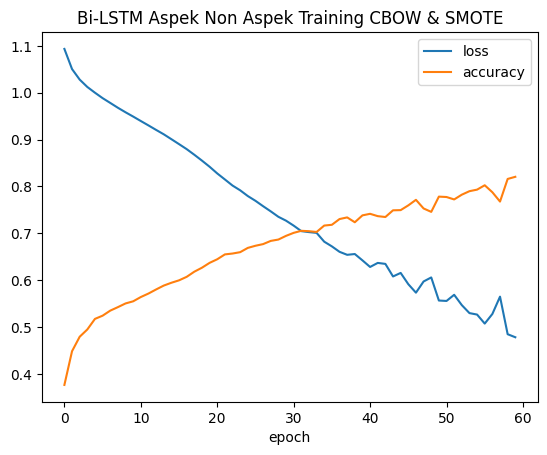

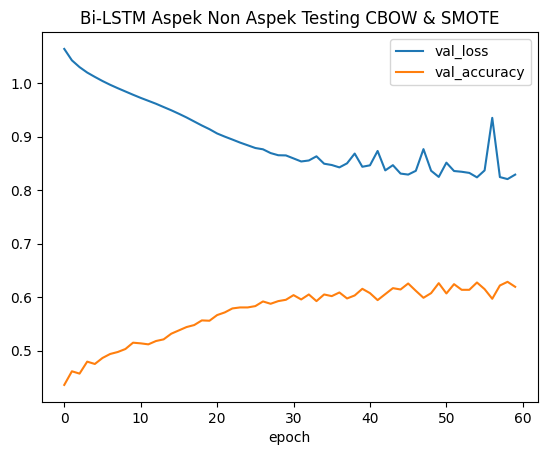

In [247]:
# Plot Training
plt.plot(history_non_aspek_smote.history['loss'])
plt.plot(history_non_aspek_smote.history['accuracy'])
plt.title('Bi-LSTM Aspek Non Aspek Training CBOW & SMOTE')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.show()

# Plot Testing
plt.plot(history_non_aspek_smote.history['val_loss'])
plt.plot(history_non_aspek_smote.history['val_accuracy'])
plt.title('Bi-LSTM Aspek Non Aspek Testing CBOW & SMOTE')
plt.xlabel('epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='upper right')
plt.show()

In [248]:
test_pred_nonaspek_smote = bilstm_non_aspek_smote.predict(X_test_nonaspek_smote)
test_val_nonaspek_smote = bilstm_non_aspek_smote.predict(X_train_nonaspek_smote)

print('evaluation')
evaluation_nonaspek_smote = bilstm_non_aspek_smote.evaluate(X_test_nonaspek_smote, y_test_nonaspek_smote, batch_size=minibatch)
y_aktual_train_nonaspek_smote = np.argmax(y_train_nonaspek_smote.to_numpy(), axis=1)
y_aktual_test_nonaspek_smote = np.argmax(y_test_nonaspek_smote.to_numpy(), axis=1)
y_pred_train_nonaspek_smote = np.argmax(test_val_nonaspek_smote, axis=1)
y_pred_test_nonaspek_smote = np.argmax(test_pred_nonaspek_smote, axis=1)

print("\n")
print("Confusion Matrix Test\n", pd.DataFrame(confusion_matrix(y_aktual_test_nonaspek_smote,
                       y_pred_test_nonaspek_smote,
                       labels=[0,1,2]), index = ["Non (Aktual)", "Pos (Aktual)", "Neg (Aktual)"],
                       columns = ["Non (Prediksi)", "Pos (Prediksi)", "Neg (Prediksi)"])
                       )

# print(test_prediksi[40])
# for i in test_prediksi_layanan_smote:
#   print(i)
# for i in test_prediksi_layanan_smote:
#   if np.argmax(i) == 0:
#     print("PREDIKSI : BUKAN SENTIMEN")
#   elif np.argmax(i) == 1:
#     print("PREDIKSI : POSITIF")
#   elif np.argmax(i) == 2:
#     print("PREDIKSI : NEGATIF")
# np.argmax(test_prediksi_layanan_smote[98])

print(f"\nLaporan Klasifikasi Testing:\n{classification_report(y_aktual_test_nonaspek_smote, y_pred_test_nonaspek_smote)}")

151/151 [==============================] - 1s 6ms/step
evaluation
2/2 [==============================] - 0s 22ms/step - loss: 0.8292 - accuracy: 0.6194


Confusion Matrix Test
               Non (Prediksi)  Pos (Prediksi)  Neg (Prediksi)
Non (Aktual)             340              89             107
Pos (Aktual)              94             258             184
Neg (Aktual)              32             106             398

Laporan Klasifikasi Testing:
              precision    recall  f1-score   support

           0       0.73      0.63      0.68       536
           1       0.57      0.48      0.52       536
           2       0.58      0.74      0.65       536

    accuracy                           0.62      1608
   macro avg       0.63      0.62      0.62      1608
weighted avg       0.63      0.62      0.62      1608



### **Save All Model**

In [250]:
# Save model format -> (aspek_CBOW_dimensihidden_batchsize_epoch_learning_rate)
# model_bilstm_kebermanfaatan_cbow.save("/content/drive/My Drive/Skripsi/Model/kebermanfaatan_CBOW_60epochs")
bilstm_layanan_smote.save('/content/drive/My Drive/Skripsi/Model/layanan_smote_60epochs')

## **Metode Lainnya**

In [ ]:
def sent_vector(sentence, w2v_model):
    vecs = [w2v_model[word] for word in sentence]
    sent_vec = np.mean(vecs, axis=0)
    return sent_vec

vecs = [sent_vector(sentence, w2v_cbow) for sentence in df_analisis_sentimen.Ulasan]
vecs = np.array(vecs)
vecs.shape

(3000, 300)

In [ ]:
X_cbow_mean = vecs
y_layanan = df_analisis_sentimen["Layanan"].loc[df_analisis_sentimen.index]
y_fitur = df_analisis_sentimen["Fitur"].loc[df_analisis_sentimen.index]
y_kebermanfaatan = df_analisis_sentimen["Kebermanfaatan"].loc[df_analisis_sentimen.index]
y_bisnis = df_analisis_sentimen["Bisnis"].loc[df_analisis_sentimen.index]
y_non_aspek = df_analisis_sentimen["Non Aspek"].loc[df_analisis_sentimen.index]

X_train_layanan, X_test_layanan, y_train_layanan, y_test_layanan = train_test_split(X_cbow_mean,y_layanan, test_size=0.25, stratify=y_layanan, random_state=42)
X_train_fitur, X_test_fitur, y_train_fitur, y_test_fitur = train_test_split(X_cbow_mean,y_fitur, test_size=0.25, stratify=y_fitur, random_state=42)
X_train_kebermanfaatan, X_test_kebermanfaatan, y_train_kebermanfaatan, y_test_kebermanfaatan = train_test_split(X_cbow_mean,y_kebermanfaatan, test_size=0.25, stratify=y_kebermanfaatan, random_state=42)
X_train_bisnis, X_test_bisnis, y_train_bisnis, y_test_bisnis = train_test_split(X_cbow_mean,y_bisnis, test_size=0.25, stratify=y_bisnis, random_state=42)
X_train_nonaspek, X_test_nonaspek, y_train_nonaspek, y_test_nonaspek = train_test_split(X_cbow_mean,y_non_aspek, test_size=0.25, stratify=y_non_aspek, random_state=42)


### **Naive Bayes**

In [ ]:
naive_bayes_classifier = GaussianNB()

#### **Layanan**

In [ ]:
nb_layanan_train = naive_bayes_classifier.fit(X_train_layanan, y_train_layanan)
nb_layanan_predict = nb_layanan_train.predict(X_test_layanan)

In [ ]:
print(classification_report(y_test_layanan, nb_layanan_predict))
print("Confusion Matrix\n",pd.DataFrame(confusion_matrix(y_test_layanan,
                       nb_layanan_predict,
                       labels=[0,1,2]), index = ["Non (Aktual)", "Pos (Aktual)", "Neg (Aktual)"],
                       columns = ["Non (Prediksi)", "Pos (Prediksi)", "Neg (Prediksi)"])
                       )

# Skore Akurasi, Presisi, Recall, dan F1-Score
nb_layanan_precision = precision_score(y_test_layanan, nb_layanan_predict, average=None)
nb_layanan_recall = recall_score(y_test_layanan, nb_layanan_predict, average=None)
nb_layanan_f1 = f1_score(y_test_layanan, nb_layanan_predict, average=None)

print(f"""\n===== Naive Bayes Score Aspek Layanan ======
Akurasi                 = {np.round(accuracy_score(y_test_layanan, nb_layanan_predict) * 100, 2)} %
Precision Non Sentimen  = {np.round(nb_layanan_precision[0]*100, 2)} %
Precision Positif       = {np.round(nb_layanan_precision[1]*100, 2)} %
Precision Negatif       = {np.round(nb_layanan_precision[2]*100, 2)} %
Recall Non Sentimen     = {np.round(nb_layanan_recall[0]*100, 2)} %
Recall Positif          = {np.round(nb_layanan_recall[1]*100, 2)} %
Recall Negatif          = {np.round(nb_layanan_recall[2]*100, 2)} %
F1-Score Non Sentimrn   = {np.round(nb_layanan_f1[0]*100, 2)} %
F1-Score Positif        = {np.round(nb_layanan_f1[1]*100, 2)} %
F1-Score Negatif        = {np.round(nb_layanan_f1[2]*100, 2)} %
""")

# Bentuk Heatmap
# f, ax = plt.subplots(figsize=(7,5))
# sns.heatmap(confusion_matrix(y_test_layanan,
#                        nb_layanan_predict), annot=True, fmt=".0f", ax=ax)
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.show

              precision    recall  f1-score   support

           0       0.92      0.50      0.65       567
           1       0.29      0.74      0.42        72
           2       0.37      0.86      0.52       111

    accuracy                           0.58       750
   macro avg       0.53      0.70      0.53       750
weighted avg       0.78      0.58      0.61       750

Confusion Matrix
               Non (Prediksi)  Pos (Prediksi)  Neg (Prediksi)
Non (Aktual)             284             123             160
Pos (Aktual)              15              53               4
Neg (Aktual)               9               6              96

===== Naive Bayes Score Aspek Layanan ======
Akurasi                 = 57.73 %
Precision Non Sentimen  = 92.21 %
Precision Positif       = 29.12 %
Precision Negatif       = 36.92 %
Recall Non Sentimen     = 50.09 %
Recall Positif          = 73.61 %
Recall Negatif          = 86.49 %
F1-Score Non Sentimrn   = 64.91 %
F1-Score Positif        = 41.73 %
F1-Sc

#### **Fitur**

In [ ]:
nb_fitur_train = naive_bayes_classifier.fit(X_train_fitur, y_train_fitur)
nb_fitur_predict = nb_fitur_train.predict(X_test_fitur)

In [ ]:
print(classification_report(y_test_fitur, nb_fitur_predict))
print("Confusion Matrix\n",pd.DataFrame(confusion_matrix(y_test_fitur,
                       nb_fitur_predict,
                       labels=[0,1,2]), index = ["Non (Aktual)", "Pos (Aktual)", "Neg (Aktual)"],
                       columns = ["Non (Prediksi)", "Pos (Prediksi)", "Neg (Prediksi)"])
                       )

# Skore Akurasi, Presisi, Recall, dan F1-Score
nb_fitur_precision = precision_score(y_test_fitur, nb_fitur_predict, average=None)
nb_fitur_recall = recall_score(y_test_fitur, nb_fitur_predict, average=None)
nb_fitur_f1 = f1_score(y_test_fitur, nb_fitur_predict, average=None)

print(f"""\n===== Naive Bayes Score Aspek Fitur ======
Akurasi                 = {np.round(accuracy_score(y_test_fitur, nb_fitur_predict) * 100, 2)} %
Precision Non Sentimen  = {np.round(nb_fitur_precision[0]*100, 2)} %
Precision Positif       = {np.round(nb_fitur_precision[1]*100, 2)} %
Precision Negatif       = {np.round(nb_fitur_precision[2]*100, 2)} %
Recall Non Sentimen     = {np.round(nb_fitur_recall[0]*100, 2)} %
Recall Positif          = {np.round(nb_fitur_recall[1]*100, 2)} %
Recall Negatif          = {np.round(nb_fitur_recall[2]*100, 2)} %
F1-Score Non Sentimrn   = {np.round(nb_fitur_f1[0]*100, 2)} %
F1-Score Positif        = {np.round(nb_fitur_f1[1]*100, 2)} %
F1-Score Negatif        = {np.round(nb_fitur_f1[2]*100, 2)} %
""")

              precision    recall  f1-score   support

           0       0.84      0.34      0.48       531
           1       0.28      0.72      0.40        92
           2       0.32      0.77      0.46       127

    accuracy                           0.46       750
   macro avg       0.48      0.61      0.45       750
weighted avg       0.69      0.46      0.47       750

Confusion Matrix
               Non (Prediksi)  Pos (Prediksi)  Neg (Prediksi)
Non (Aktual)             178             161             192
Pos (Aktual)              14              66              12
Neg (Aktual)              19              10              98

===== Naive Bayes Score Aspek Fitur ======
Akurasi                 = 45.6 %
Precision Non Sentimen  = 84.36 %
Precision Positif       = 27.85 %
Precision Negatif       = 32.45 %
Recall Non Sentimen     = 33.52 %
Recall Positif          = 71.74 %
Recall Negatif          = 77.17 %
F1-Score Non Sentimrn   = 47.98 %
F1-Score Positif        = 40.12 %
F1-Score

#### **Kebermanfaatan**

In [ ]:
nb_kebermanfaatan_train = naive_bayes_classifier.fit(X_train_kebermanfaatan, y_train_kebermanfaatan)
nb_kebermanfaatan_predict = nb_kebermanfaatan_train.predict(X_test_kebermanfaatan)

In [ ]:
print(classification_report(y_test_kebermanfaatan, nb_kebermanfaatan_predict))
print("Confusion Matrix\n",pd.DataFrame(confusion_matrix(y_test_kebermanfaatan,
                       nb_kebermanfaatan_predict,
                       labels=[0,1,2]), index = ["Non (Aktual)", "Pos (Aktual)", "Neg (Aktual)"],
                       columns = ["Non (Prediksi)", "Pos (Prediksi)", "Neg (Prediksi)"])
                       )

# Skore Akurasi, Presisi, Recall, dan F1-Score
nb_kebermanfaatan_precision = precision_score(y_test_kebermanfaatan, nb_kebermanfaatan_predict, average=None)
nb_kebermanfaatan_recall = recall_score(y_test_kebermanfaatan, nb_kebermanfaatan_predict, average=None)
nb_kebermanfaatan_f1 = f1_score(y_test_kebermanfaatan, nb_kebermanfaatan_predict, average=None)

print(f"""\n===== Naive Bayes Score Aspek Kebermanfaatan ======
Akurasi                 = {np.round(accuracy_score(y_test_kebermanfaatan, nb_kebermanfaatan_predict) * 100, 2)} %
Precision Non Sentimen  = {np.round(nb_kebermanfaatan_precision[0]*100, 2)} %
Precision Positif       = {np.round(nb_kebermanfaatan_precision[1]*100, 2)} %
Precision Negatif       = {np.round(nb_kebermanfaatan_precision[2]*100, 2)} %
Recall Non Sentimen     = {np.round(nb_kebermanfaatan_recall[0]*100, 2)} %
Recall Positif          = {np.round(nb_kebermanfaatan_recall[1]*100, 2)} %
Recall Negatif          = {np.round(nb_kebermanfaatan_recall[2]*100, 2)} %
F1-Score Non Sentimrn   = {np.round(nb_kebermanfaatan_f1[0]*100, 2)} %
F1-Score Positif        = {np.round(nb_kebermanfaatan_f1[1]*100, 2)} %
F1-Score Negatif        = {np.round(nb_kebermanfaatan_f1[2]*100, 2)} %
""")

              precision    recall  f1-score   support

           0       0.93      0.69      0.79       600
           1       0.59      0.77      0.67       141
           2       0.07      0.89      0.12         9

    accuracy                           0.71       750
   macro avg       0.53      0.78      0.53       750
weighted avg       0.85      0.71      0.76       750

Confusion Matrix
               Non (Prediksi)  Pos (Prediksi)  Neg (Prediksi)
Non (Aktual)             412              77             111
Pos (Aktual)              30             109               2
Neg (Aktual)               1               0               8

===== Naive Bayes Score Aspek Kebermanfaatan ======
Akurasi                 = 70.53 %
Precision Non Sentimen  = 93.0 %
Precision Positif       = 58.6 %
Precision Negatif       = 6.61 %
Recall Non Sentimen     = 68.67 %
Recall Positif          = 77.3 %
Recall Negatif          = 88.89 %
F1-Score Non Sentimrn   = 79.0 %
F1-Score Positif        = 66.67 %
F1-

#### **Bisnis**

In [ ]:
nb_bisnis_train = naive_bayes_classifier.fit(X_train_bisnis, y_train_bisnis)
nb_bisnis_predict = nb_bisnis_train.predict(X_test_bisnis)

In [ ]:
print(classification_report(y_test_bisnis, nb_bisnis_predict))
print("Confusion Matrix\n",pd.DataFrame(confusion_matrix(y_test_bisnis,
                       nb_bisnis_predict,
                       labels=[0,1,2]), index = ["Non (Aktual)", "Pos (Aktual)", "Neg (Aktual)"],
                       columns = ["Non (Prediksi)", "Pos (Prediksi)", "Neg (Prediksi)"])
                       )

# Skore Akurasi, Presisi, Recall, dan F1-Score
nb_bisnis_precision = precision_score(y_test_bisnis, nb_bisnis_predict, average=None)
nb_bisnis_recall = recall_score(y_test_bisnis, nb_bisnis_predict, average=None)
nb_bisnis_f1 = f1_score(y_test_bisnis, nb_bisnis_predict, average=None)

print(f"""\n===== Naive Bayes Score Aspek Bisnis ======
Akurasi                 = {np.round(accuracy_score(y_test_bisnis, nb_bisnis_predict) * 100, 2)} %
Precision Non Sentimen  = {np.round(nb_bisnis_precision[0]*100, 2)} %
Precision Positif       = {np.round(nb_bisnis_precision[1]*100, 2)} %
Precision Negatif       = {np.round(nb_bisnis_precision[2]*100, 2)} %
Recall Non Sentimen     = {np.round(nb_bisnis_recall[0]*100, 2)} %
Recall Positif          = {np.round(nb_bisnis_recall[1]*100, 2)} %
Recall Negatif          = {np.round(nb_bisnis_recall[2]*100, 2)} %
F1-Score Non Sentimrn   = {np.round(nb_bisnis_f1[0]*100, 2)} %
F1-Score Positif        = {np.round(nb_bisnis_f1[1]*100, 2)} %
F1-Score Negatif        = {np.round(nb_bisnis_f1[2]*100, 2)} %
""")

              precision    recall  f1-score   support

           0       0.88      0.48      0.62       492
           1       0.44      0.79      0.57       129
           2       0.42      0.83      0.56       129

    accuracy                           0.59       750
   macro avg       0.58      0.70      0.58       750
weighted avg       0.73      0.59      0.60       750

Confusion Matrix
               Non (Prediksi)  Pos (Prediksi)  Neg (Prediksi)
Non (Aktual)             234             118             140
Pos (Aktual)              20             102               7
Neg (Aktual)              12              10             107

===== Naive Bayes Score Aspek Bisnis ======
Akurasi                 = 59.07 %
Precision Non Sentimen  = 87.97 %
Precision Positif       = 44.35 %
Precision Negatif       = 42.13 %
Recall Non Sentimen     = 47.56 %
Recall Positif          = 79.07 %
Recall Negatif          = 82.95 %
F1-Score Non Sentimrn   = 61.74 %
F1-Score Positif        = 56.82 %
F1-Sco

#### **Non Aspek**

In [ ]:
nb_non_aspek_train = naive_bayes_classifier.fit(X_train_nonaspek, y_train_nonaspek)
nb_non_aspek_pred = nb_non_aspek_train.predict(X_test_nonaspek)

In [ ]:
print(classification_report(y_test_nonaspek, nb_non_aspek_pred))
print("Confusion Matrix\n",pd.DataFrame(confusion_matrix(y_test_nonaspek,
                       nb_non_aspek_pred,
                       labels=[0,1,2]), index = ["Non (Aktual)", "Pos (Aktual)", "Neg (Aktual)"],
                       columns = ["Non (Prediksi)", "Pos (Prediksi)", "Neg (Prediksi)"])
                       )

# Skore Akurasi, Presisi, Recall, dan F1-Score
nb_nonaspek_precision = precision_score(y_test_nonaspek, nb_non_aspek_pred, average=None)
nb_nonaspek_recall = recall_score(y_test_nonaspek, nb_non_aspek_pred, average=None)
nb_nonaspek_f1 = f1_score(y_test_nonaspek, nb_non_aspek_pred, average=None)

print(f"""\n===== Naive Bayes Score Aspek Non Aspek ======
Akurasi                 = {np.round(accuracy_score(y_test_nonaspek, nb_non_aspek_pred) * 100, 2)} %
Precision Non Sentimen  = {np.round(nb_nonaspek_precision[0]*100, 2)} %
Precision Positif       = {np.round(nb_nonaspek_precision[1]*100, 2)} %
Precision Negatif       = {np.round(nb_nonaspek_precision[2]*100, 2)} %
Recall Non Sentimen     = {np.round(nb_nonaspek_recall[0]*100, 2)} %
Recall Positif          = {np.round(nb_nonaspek_recall[1]*100, 2)} %
Recall Negatif          = {np.round(nb_nonaspek_recall[2]*100, 2)} %
F1-Score Non Sentimrn   = {np.round(nb_nonaspek_f1[0]*100, 2)} %
F1-Score Positif        = {np.round(nb_nonaspek_f1[1]*100, 2)} %
F1-Score Negatif        = {np.round(nb_nonaspek_f1[2]*100, 2)} %
""")

              precision    recall  f1-score   support

           0       0.81      0.33      0.47       536
           1       0.22      0.47      0.30       104
           2       0.30      0.84      0.44       110

    accuracy                           0.43       750
   macro avg       0.44      0.55      0.40       750
weighted avg       0.66      0.43      0.44       750

Confusion Matrix
               Non (Prediksi)  Pos (Prediksi)  Neg (Prediksi)
Non (Aktual)             179             167             190
Pos (Aktual)              26              49              29
Neg (Aktual)              15               3              92

===== Naive Bayes Score Aspek Non Aspek ======
Akurasi                 = 42.67 %
Precision Non Sentimen  = 81.36 %
Precision Positif       = 22.37 %
Precision Negatif       = 29.58 %
Recall Non Sentimen     = 33.4 %
Recall Positif          = 47.12 %
Recall Negatif          = 83.64 %
F1-Score Non Sentimrn   = 47.35 %
F1-Score Positif        = 30.34 %
F1-S

### **Support Vector Machine**

In [ ]:
svm_classifier = SVC(decision_function_shape='ovr')

#### **Layanan**

In [ ]:
svm_layanan_train = svm_classifier.fit(X_train_layanan,y_train_layanan)
svm_layanan_predict = svm_layanan_train.predict(X_test_layanan)

In [ ]:
print(classification_report(y_test_layanan, svm_layanan_predict))
print("Confusion Matrix\n",pd.DataFrame(confusion_matrix(y_test_layanan,
                       svm_layanan_predict,
                       labels=[0,1,2]), index = ["Non (Aktual)", "Pos (Aktual)", "Neg (Aktual)"],
                       columns = ["Non (Prediksi)", "Pos (Prediksi)", "Neg (Prediksi)"])
                       )

# Skore Akurasi, Presisi, Recall, dan F1-Score
svm_layanan_precision = precision_score(y_test_layanan, svm_layanan_predict, average=None)
svm_layanan_recall = recall_score(y_test_layanan, svm_layanan_predict, average=None)
svm_layanan_f1 = f1_score(y_test_layanan, svm_layanan_predict, average=None)

print(f"""\n===== SVM Score Aspek Layanan ======
Akurasi                 = {np.round(accuracy_score(y_test_layanan, svm_layanan_predict) * 100, 2)} %
Precision Non Sentimen  = {np.round(svm_layanan_precision[0]*100, 2)} %
Precision Positif       = {np.round(svm_layanan_precision[1]*100, 2)} %
Precision Negatif       = {np.round(svm_layanan_precision[2]*100, 2)} %
Recall Non Sentimen     = {np.round(svm_layanan_recall[0]*100, 2)} %
Recall Positif          = {np.round(svm_layanan_recall[1]*100, 2)} %
Recall Negatif          = {np.round(svm_layanan_recall[2]*100, 2)} %
F1-Score Non Sentimrn   = {np.round(svm_layanan_f1[0]*100, 2)} %
F1-Score Positif        = {np.round(svm_layanan_f1[1]*100, 2)} %
F1-Score Negatif        = {np.round(svm_layanan_f1[2]*100, 2)} %
""")

              precision    recall  f1-score   support

           0       0.84      0.98      0.90       567
           1       0.85      0.39      0.53        72
           2       0.85      0.41      0.56       111

    accuracy                           0.84       750
   macro avg       0.85      0.59      0.66       750
weighted avg       0.84      0.84      0.82       750

Confusion Matrix
               Non (Prediksi)  Pos (Prediksi)  Neg (Prediksi)
Non (Aktual)             555               5               7
Pos (Aktual)              43              28               1
Neg (Aktual)              65               0              46

===== SVM Score Aspek Layanan ======
Akurasi                 = 83.87 %
Precision Non Sentimen  = 83.71 %
Precision Positif       = 84.85 %
Precision Negatif       = 85.19 %
Recall Non Sentimen     = 97.88 %
Recall Positif          = 38.89 %
Recall Negatif          = 41.44 %
F1-Score Non Sentimrn   = 90.24 %
F1-Score Positif        = 53.33 %
F1-Score Nega

#### **Fitur**

In [ ]:
svm_fitur_train = svm_classifier.fit(X_train_fitur,y_train_fitur)
svm_fitur_predict = svm_fitur_train.predict(X_test_fitur)

In [ ]:
print(classification_report(y_test_fitur, svm_fitur_predict))
print("Confusion Matrix\n",pd.DataFrame(confusion_matrix(y_test_fitur,
                       svm_fitur_predict,
                       labels=[0,1,2]), index = ["Non (Aktual)", "Pos (Aktual)", "Neg (Aktual)"],
                       columns = ["Non (Prediksi)", "Pos (Prediksi)", "Neg (Prediksi)"])
                       )

# Skore Akurasi, Presisi, Recall, dan F1-Score
svm_fitur_precision = precision_score(y_test_fitur, svm_fitur_predict, average=None)
svm_fitur_recall = recall_score(y_test_fitur, svm_fitur_predict, average=None)
svm_fitur_f1 = f1_score(y_test_fitur, svm_fitur_predict, average=None)

print(f"""\n===== SVM Score Aspek Fitur ======
Akurasi                 = {np.round(accuracy_score(y_test_fitur, svm_fitur_predict) * 100, 2)} %
Precision Non Sentimen  = {np.round(svm_fitur_precision[0]*100, 2)} %
Precision Positif       = {np.round(svm_fitur_precision[1]*100, 2)} %
Precision Negatif       = {np.round(svm_fitur_precision[2]*100, 2)} %
Recall Non Sentimen     = {np.round(svm_fitur_recall[0]*100, 2)} %
Recall Positif          = {np.round(svm_fitur_recall[1]*100, 2)} %
Recall Negatif          = {np.round(svm_fitur_recall[2]*100, 2)} %
F1-Score Non Sentimrn   = {np.round(svm_fitur_f1[0]*100, 2)} %
F1-Score Positif        = {np.round(svm_fitur_f1[1]*100, 2)} %
F1-Score Negatif        = {np.round(svm_fitur_f1[2]*100, 2)} %
""")

              precision    recall  f1-score   support

           0       0.78      0.94      0.85       531
           1       0.63      0.18      0.29        92
           2       0.65      0.43      0.51       127

    accuracy                           0.76       750
   macro avg       0.69      0.52      0.55       750
weighted avg       0.74      0.76      0.73       750

Confusion Matrix
               Non (Prediksi)  Pos (Prediksi)  Neg (Prediksi)
Non (Aktual)             499               9              23
Pos (Aktual)              69              17               6
Neg (Aktual)              72               1              54

===== SVM Score Aspek Fitur ======
Akurasi                 = 76.0 %
Precision Non Sentimen  = 77.97 %
Precision Positif       = 62.96 %
Precision Negatif       = 65.06 %
Recall Non Sentimen     = 93.97 %
Recall Positif          = 18.48 %
Recall Negatif          = 42.52 %
F1-Score Non Sentimrn   = 85.23 %
F1-Score Positif        = 28.57 %
F1-Score Negatif

#### **Kebermanfaatan**

In [ ]:
svm_manfaat_train = svm_classifier.fit(X_train_kebermanfaatan,y_train_kebermanfaatan)
svm_manfaat_predict = svm_manfaat_train.predict(X_test_kebermanfaatan)

In [ ]:
print(classification_report(y_test_kebermanfaatan, svm_manfaat_predict))
print("Confusion Matrix\n",pd.DataFrame(confusion_matrix(y_test_kebermanfaatan,
                       svm_manfaat_predict,
                       labels=[0,1,2]), index = ["Non (Aktual)", "Pos (Aktual)", "Neg (Aktual)"],
                       columns = ["Non (Prediksi)", "Pos (Prediksi)", "Neg (Prediksi)"])
                       )

# Skore Akurasi, Presisi, Recall, dan F1-Score
svm_kebermanfaatan_precision = precision_score(y_test_kebermanfaatan, svm_manfaat_predict, average=None)
svm_kebermanfaatan_recall = recall_score(y_test_kebermanfaatan, svm_manfaat_predict, average=None)
svm_kebermanfaatan_f1 = f1_score(y_test_kebermanfaatan, svm_manfaat_predict, average=None)

print(f"""\n===== SVM Score Aspek Kebermanfaatan ======
Akurasi                 = {np.round(accuracy_score(y_test_kebermanfaatan, svm_manfaat_predict) * 100, 2)} %
Precision Non Sentimen  = {np.round(svm_kebermanfaatan_precision[0]*100, 2)} %
Precision Positif       = {np.round(svm_kebermanfaatan_precision[1]*100, 2)} %
Precision Negatif       = {np.round(svm_kebermanfaatan_precision[2]*100, 2)} %
Recall Non Sentimen     = {np.round(svm_kebermanfaatan_recall[0]*100, 2)} %
Recall Positif          = {np.round(svm_kebermanfaatan_recall[1]*100, 2)} %
Recall Negatif          = {np.round(svm_kebermanfaatan_recall[2]*100, 2)} %
F1-Score Non Sentimrn   = {np.round(svm_kebermanfaatan_f1[0]*100, 2)} %
F1-Score Positif        = {np.round(svm_kebermanfaatan_f1[1]*100, 2)} %
F1-Score Negatif        = {np.round(svm_kebermanfaatan_f1[2]*100, 2)} %
""")

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       600
           1       0.87      0.68      0.76       141
           2       0.00      0.00      0.00         9

    accuracy                           0.91       750
   macro avg       0.60      0.55      0.57       750
weighted avg       0.90      0.91      0.90       750

Confusion Matrix
               Non (Prediksi)  Pos (Prediksi)  Neg (Prediksi)
Non (Aktual)             586              14               0
Pos (Aktual)              45              96               0
Neg (Aktual)               9               0               0

===== SVM Score Aspek Kebermanfaatan ======
Akurasi                 = 90.93 %
Precision Non Sentimen  = 91.56 %
Precision Positif       = 87.27 %
Precision Negatif       = 0.0 %
Recall Non Sentimen     = 97.67 %
Recall Positif          = 68.09 %
Recall Negatif          = 0.0 %
F1-Score Non Sentimrn   = 94.52 %
F1-Score Positif        = 76.49 %
F1-Score N

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classificat

#### **Bisnis**

In [ ]:
svm_bisnis_train = svm_classifier.fit(X_train_bisnis,y_train_bisnis)
svm_bisnis_predict = svm_bisnis_train.predict(X_test_bisnis)

In [ ]:
print(classification_report(y_test_bisnis, svm_bisnis_predict))
print("Confusion Matrix\n",pd.DataFrame(confusion_matrix(y_test_bisnis,
                       svm_bisnis_predict,
                       labels=[0,1,2]), index = ["Non (Aktual)", "Pos (Aktual)", "Neg (Aktual)"],
                       columns = ["Non (Prediksi)", "Pos (Prediksi)", "Neg (Prediksi)"])
                       )

# Skore Akurasi, Presisi, Recall, dan F1-Score
svm_bisnis_precision = precision_score(y_test_bisnis, svm_bisnis_predict, average=None)
svm_bisnis_recall = recall_score(y_test_bisnis, svm_bisnis_predict, average=None)
svm_bisnis_f1 = f1_score(y_test_bisnis, svm_bisnis_predict, average=None)

print(f"""\n===== SVM Score Aspek Bisnis ======
Akurasi                 = {np.round(accuracy_score(y_test_bisnis, svm_bisnis_predict) * 100, 2)} %
Precision Non Sentimen  = {np.round(svm_bisnis_precision[0]*100, 2)} %
Precision Positif       = {np.round(svm_bisnis_precision[1]*100, 2)} %
Precision Negatif       = {np.round(svm_bisnis_precision[2]*100, 2)} %
Recall Non Sentimen     = {np.round(svm_bisnis_recall[0]*100, 2)} %
Recall Positif          = {np.round(svm_bisnis_recall[1]*100, 2)} %
Recall Negatif          = {np.round(svm_bisnis_recall[2]*100, 2)} %
F1-Score Non Sentimrn   = {np.round(svm_bisnis_f1[0]*100, 2)} %
F1-Score Positif        = {np.round(svm_bisnis_f1[1]*100, 2)} %
F1-Score Negatif        = {np.round(svm_bisnis_f1[2]*100, 2)} %
""")

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       492
           1       0.81      0.49      0.61       129
           2       0.73      0.57      0.64       129

    accuracy                           0.79       750
   macro avg       0.78      0.66      0.70       750
weighted avg       0.79      0.79      0.78       750

Confusion Matrix
               Non (Prediksi)  Pos (Prediksi)  Neg (Prediksi)
Non (Aktual)             456              11              25
Pos (Aktual)              63              63               3
Neg (Aktual)              51               4              74

===== SVM Score Aspek Bisnis ======
Akurasi                 = 79.07 %
Precision Non Sentimen  = 80.0 %
Precision Positif       = 80.77 %
Precision Negatif       = 72.55 %
Recall Non Sentimen     = 92.68 %
Recall Positif          = 48.84 %
Recall Negatif          = 57.36 %
F1-Score Non Sentimrn   = 85.88 %
F1-Score Positif        = 60.87 %
F1-Score Negati

#### **Non Aspek**

In [ ]:
svm_non_aspek_train = svm_classifier.fit(X_train_nonaspek,y_train_nonaspek)
svm_non_aspek_predict = svm_non_aspek_train.predict(X_test_nonaspek)

In [ ]:
print(classification_report(y_test_nonaspek, svm_non_aspek_predict))
print("Confusion Matrix\n",pd.DataFrame(confusion_matrix(y_test_nonaspek,
                       svm_non_aspek_predict,
                       labels=[0,1,2]), index = ["Non (Aktual)", "Pos (Aktual)", "Neg (Aktual)"],
                       columns = ["Non (Prediksi)", "Pos (Prediksi)", "Neg (Prediksi)"])
                       )

# Skore Akurasi, Presisi, Recall, dan F1-Score
svm_nonaspek_precision = precision_score(y_test_nonaspek, svm_non_aspek_predict, average=None)
svm_nonaspek_recall = recall_score(y_test_nonaspek, svm_non_aspek_predict, average=None)
svm_nonaspek_f1 = f1_score(y_test_nonaspek, svm_non_aspek_predict, average=None)

print(f"""\n===== SVM Score Aspek Non aspek ======
Akurasi                 = {np.round(accuracy_score(y_test_nonaspek, svm_non_aspek_predict) * 100, 2)} %
Precision Non Sentimen  = {np.round(svm_nonaspek_precision[0]*100, 2)} %
Precision Positif       = {np.round(svm_nonaspek_precision[1]*100, 2)} %
Precision Negatif       = {np.round(svm_nonaspek_precision[2]*100, 2)} %
Recall Non Sentimen     = {np.round(svm_nonaspek_recall[0]*100, 2)} %
Recall Positif          = {np.round(svm_nonaspek_recall[1]*100, 2)} %
Recall Negatif          = {np.round(svm_nonaspek_recall[2]*100, 2)} %
F1-Score Non Sentimrn   = {np.round(svm_nonaspek_f1[0]*100, 2)} %
F1-Score Positif        = {np.round(svm_nonaspek_f1[1]*100, 2)} %
F1-Score Negatif        = {np.round(svm_nonaspek_f1[2]*100, 2)} %
""")

              precision    recall  f1-score   support

           0       0.74      0.99      0.85       536
           1       1.00      0.03      0.06       104
           2       0.75      0.16      0.27       110

    accuracy                           0.74       750
   macro avg       0.83      0.40      0.39       750
weighted avg       0.77      0.74      0.65       750

Confusion Matrix
               Non (Prediksi)  Pos (Prediksi)  Neg (Prediksi)
Non (Aktual)             532               0               4
Pos (Aktual)              99               3               2
Neg (Aktual)              92               0              18

===== SVM Score Aspek Non aspek ======
Akurasi                 = 73.73 %
Precision Non Sentimen  = 73.58 %
Precision Positif       = 100.0 %
Precision Negatif       = 75.0 %
Recall Non Sentimen     = 99.25 %
Recall Positif          = 2.88 %
Recall Negatif          = 16.36 %
F1-Score Non Sentimrn   = 84.51 %
F1-Score Positif        = 5.61 %
F1-Score Negat